In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Doing the shifts for the spectra in a separate notebook

In [5]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/'
x1ds = np.hstack((glob.glob('{}shifts/*x1d.fits'.format(path)), glob.glob('{}shifts/*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28040_sx1.fits'],
      dtype='<U75')

Gaussian
[100.9767486] km / s
Voigt
100.97661593838069 km / s 40.614702568613524


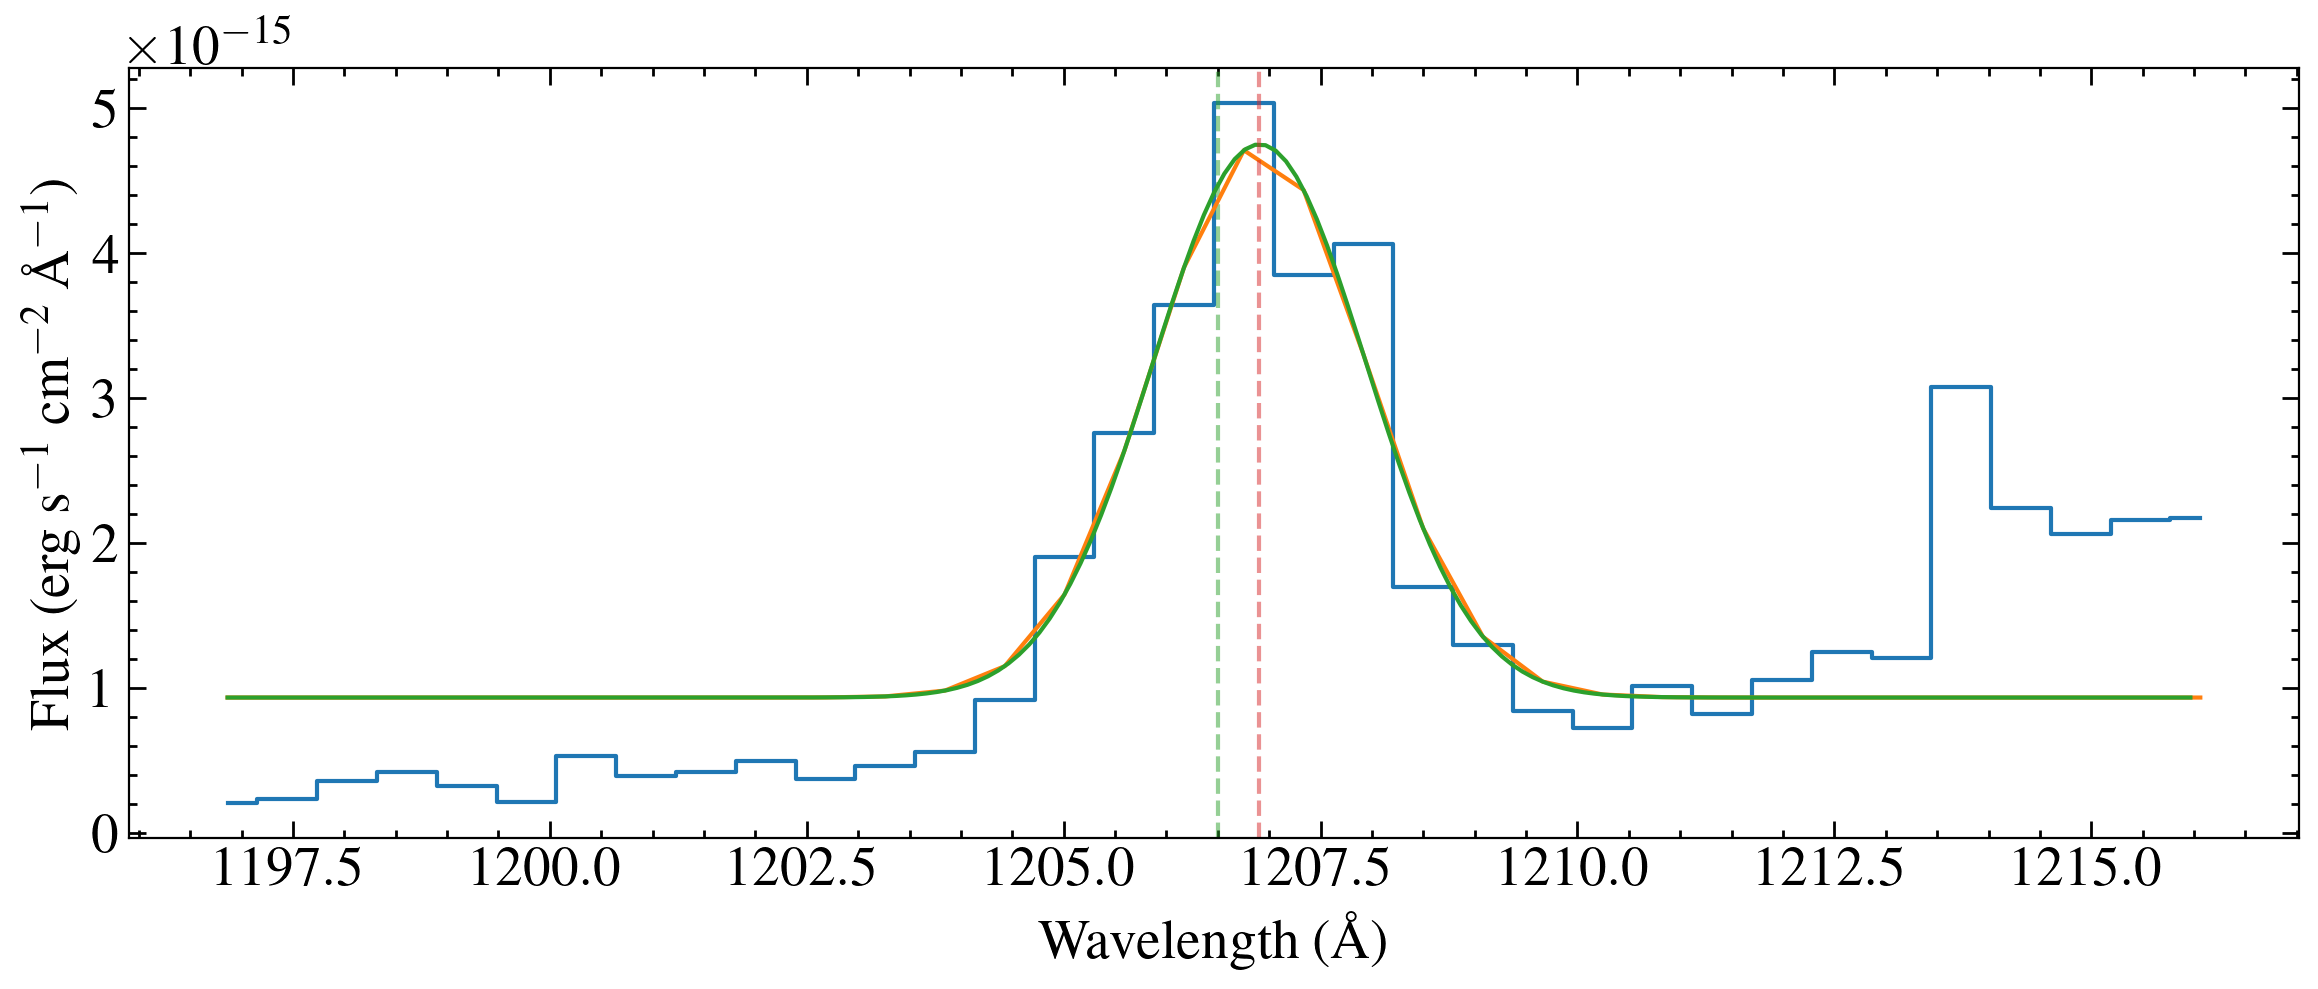

Gaussian
[  96.00524591 -865.09219915] km / s
Voigt
97.33460253091616 km / s 13.631452449979257


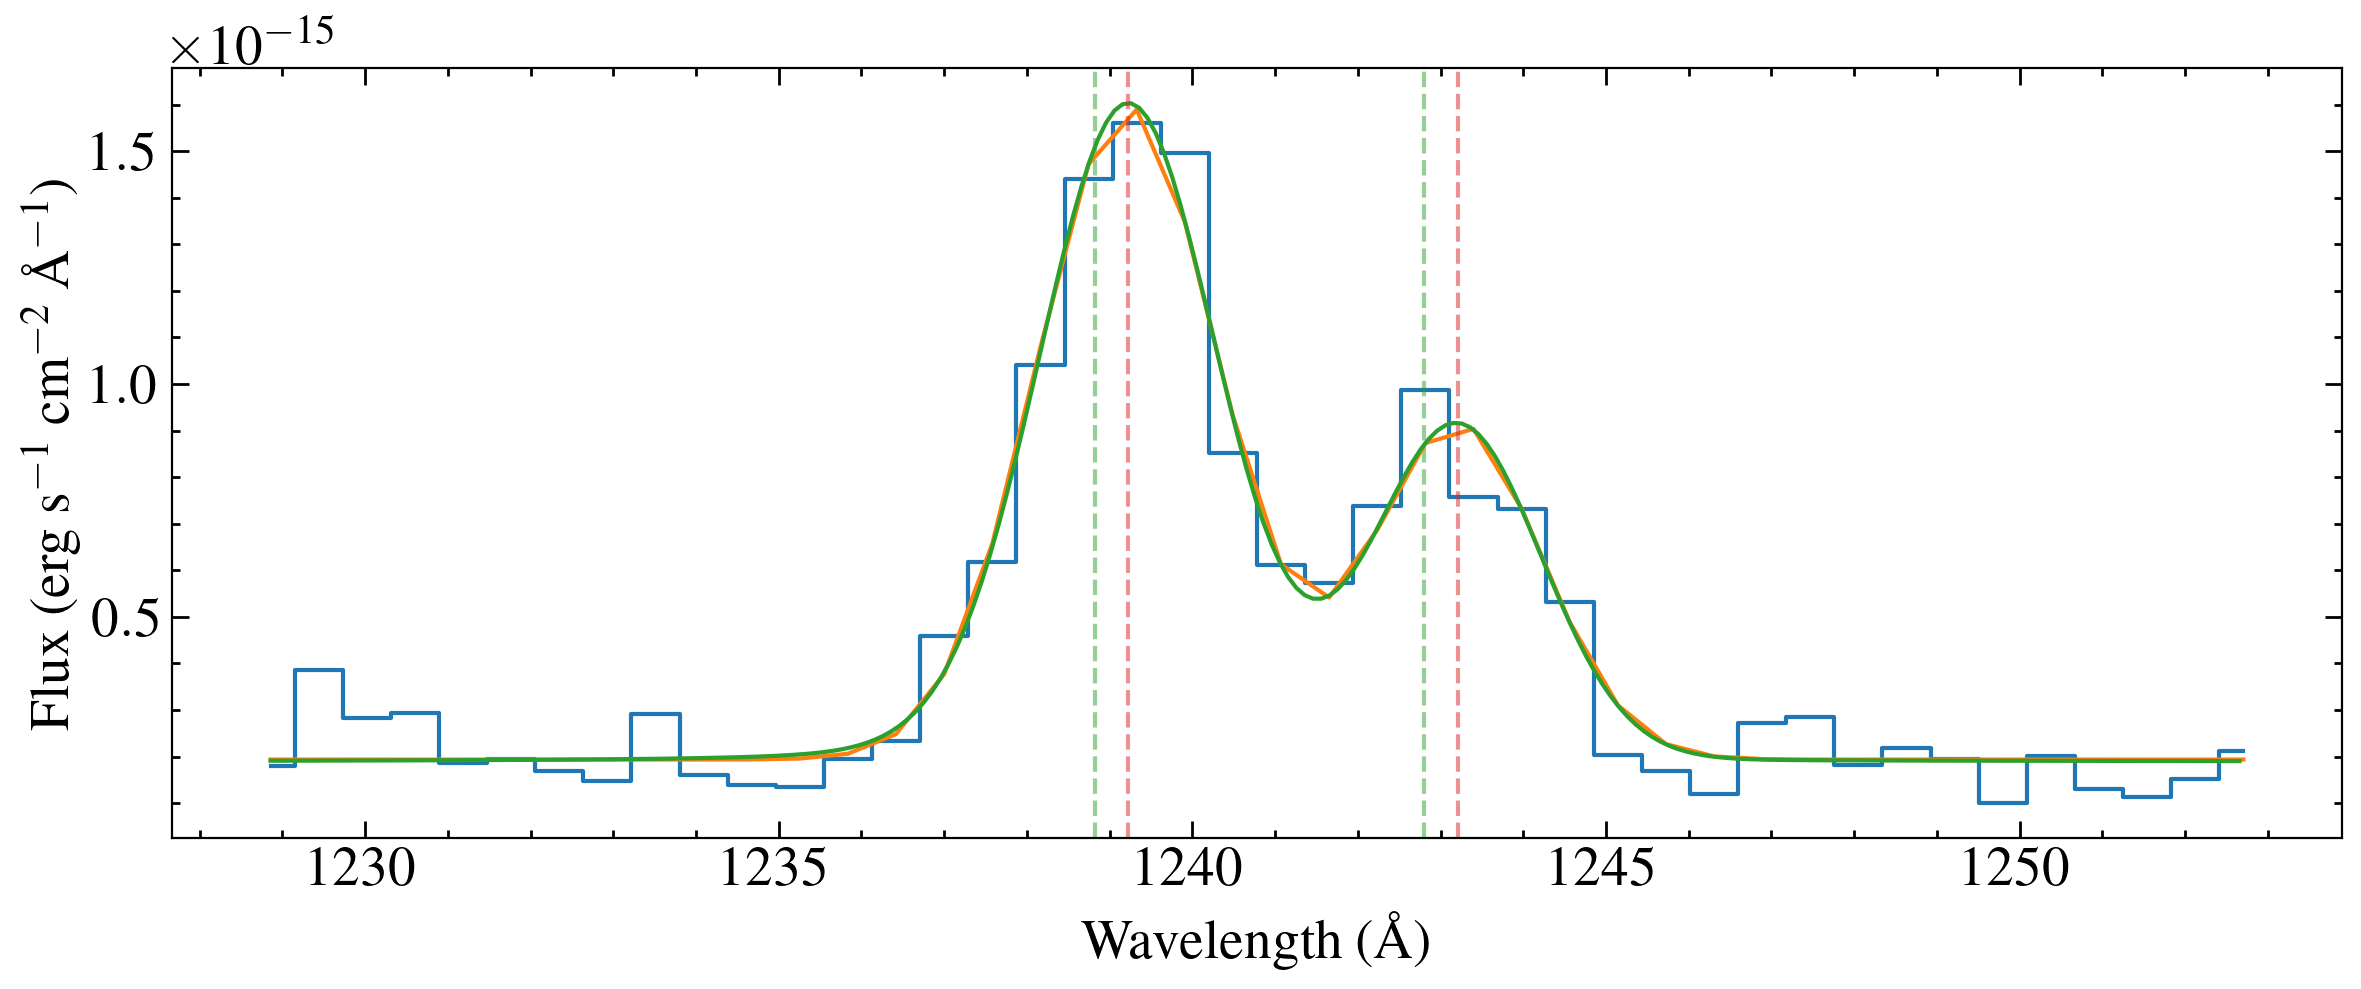

Gaussian
[   96.67660932 -1830.58199224] km / s
Voigt
102.02444293662298 km / s 9.002961892550687


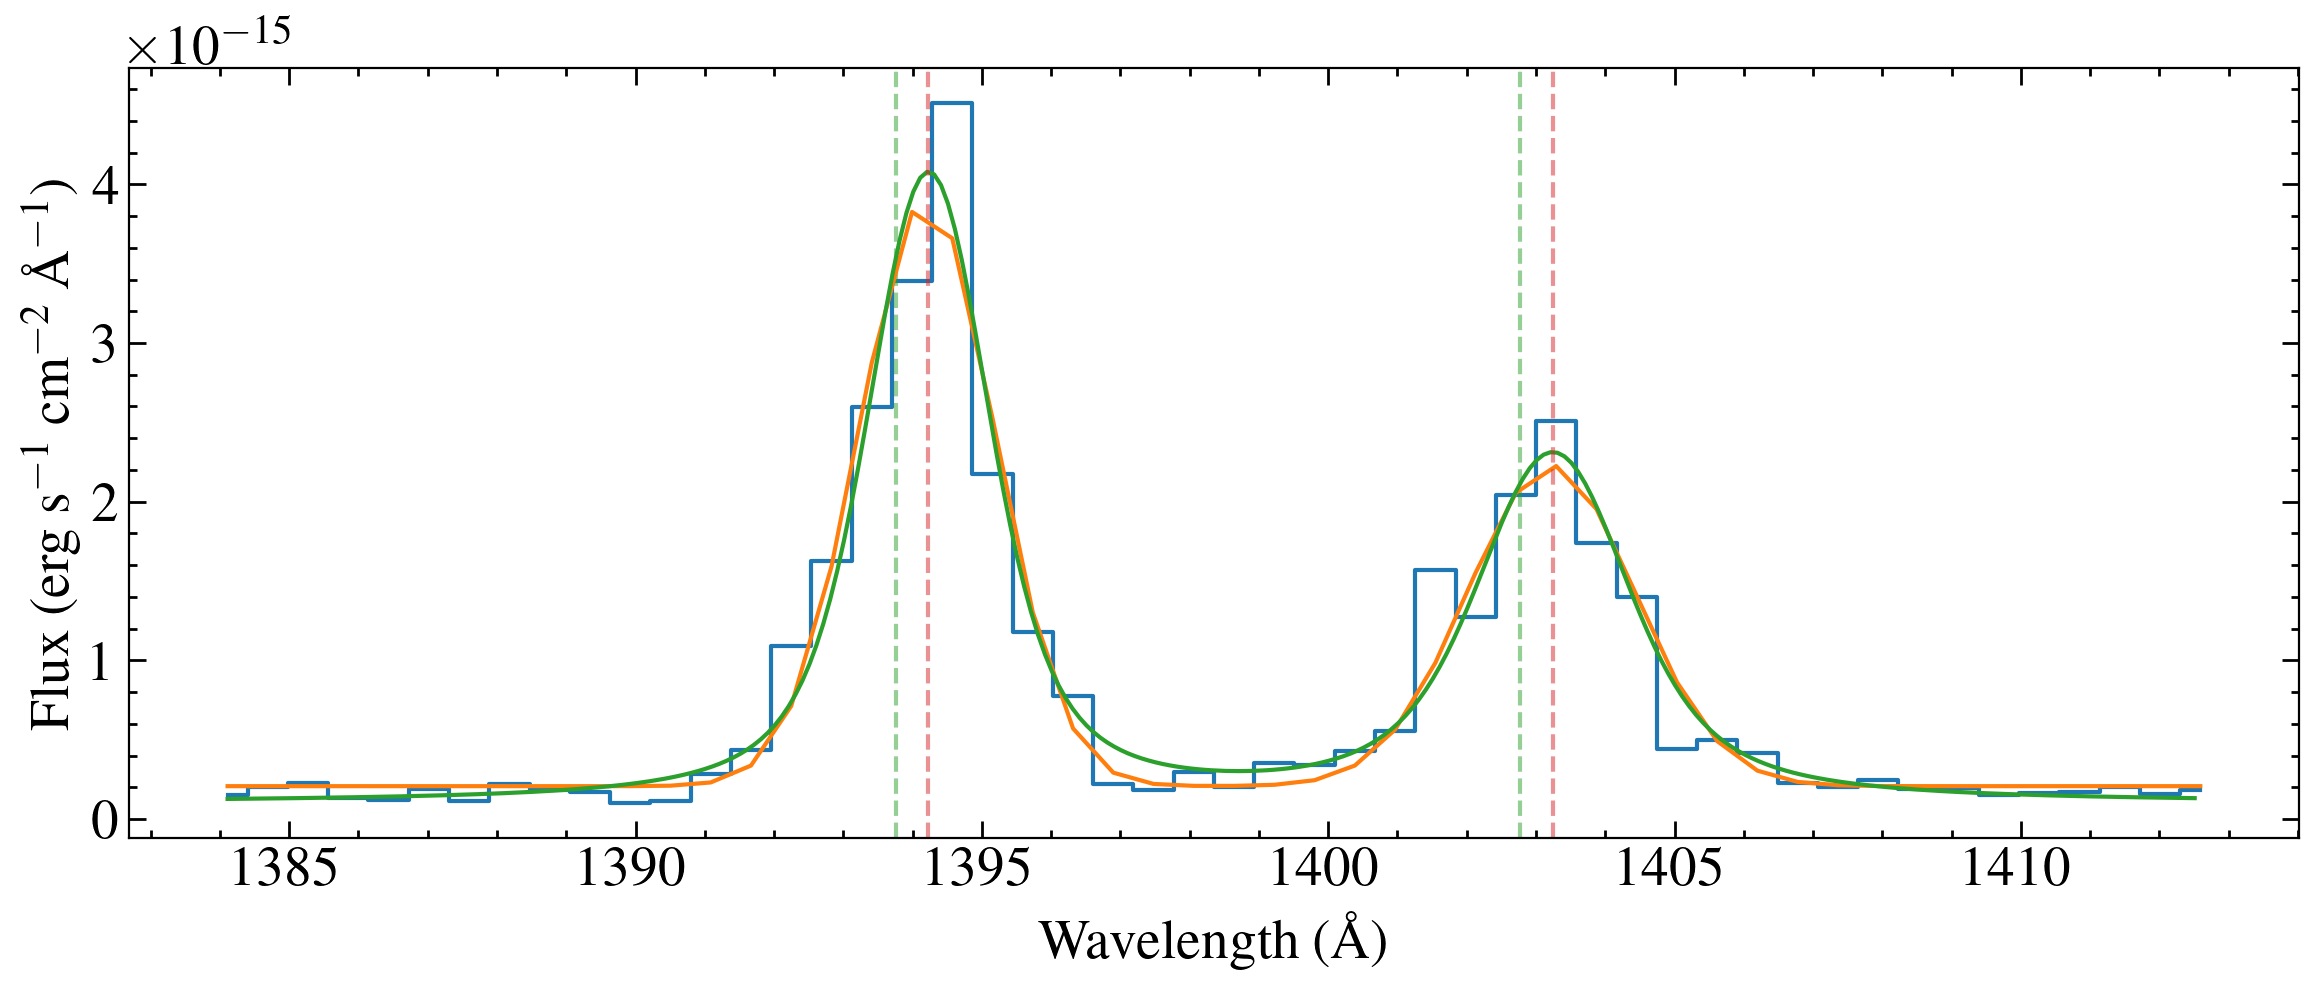

Gaussian
[  79.24072789 -417.91174677] km / s
Voigt
79.09809419128764 km / s 4.883120714191925


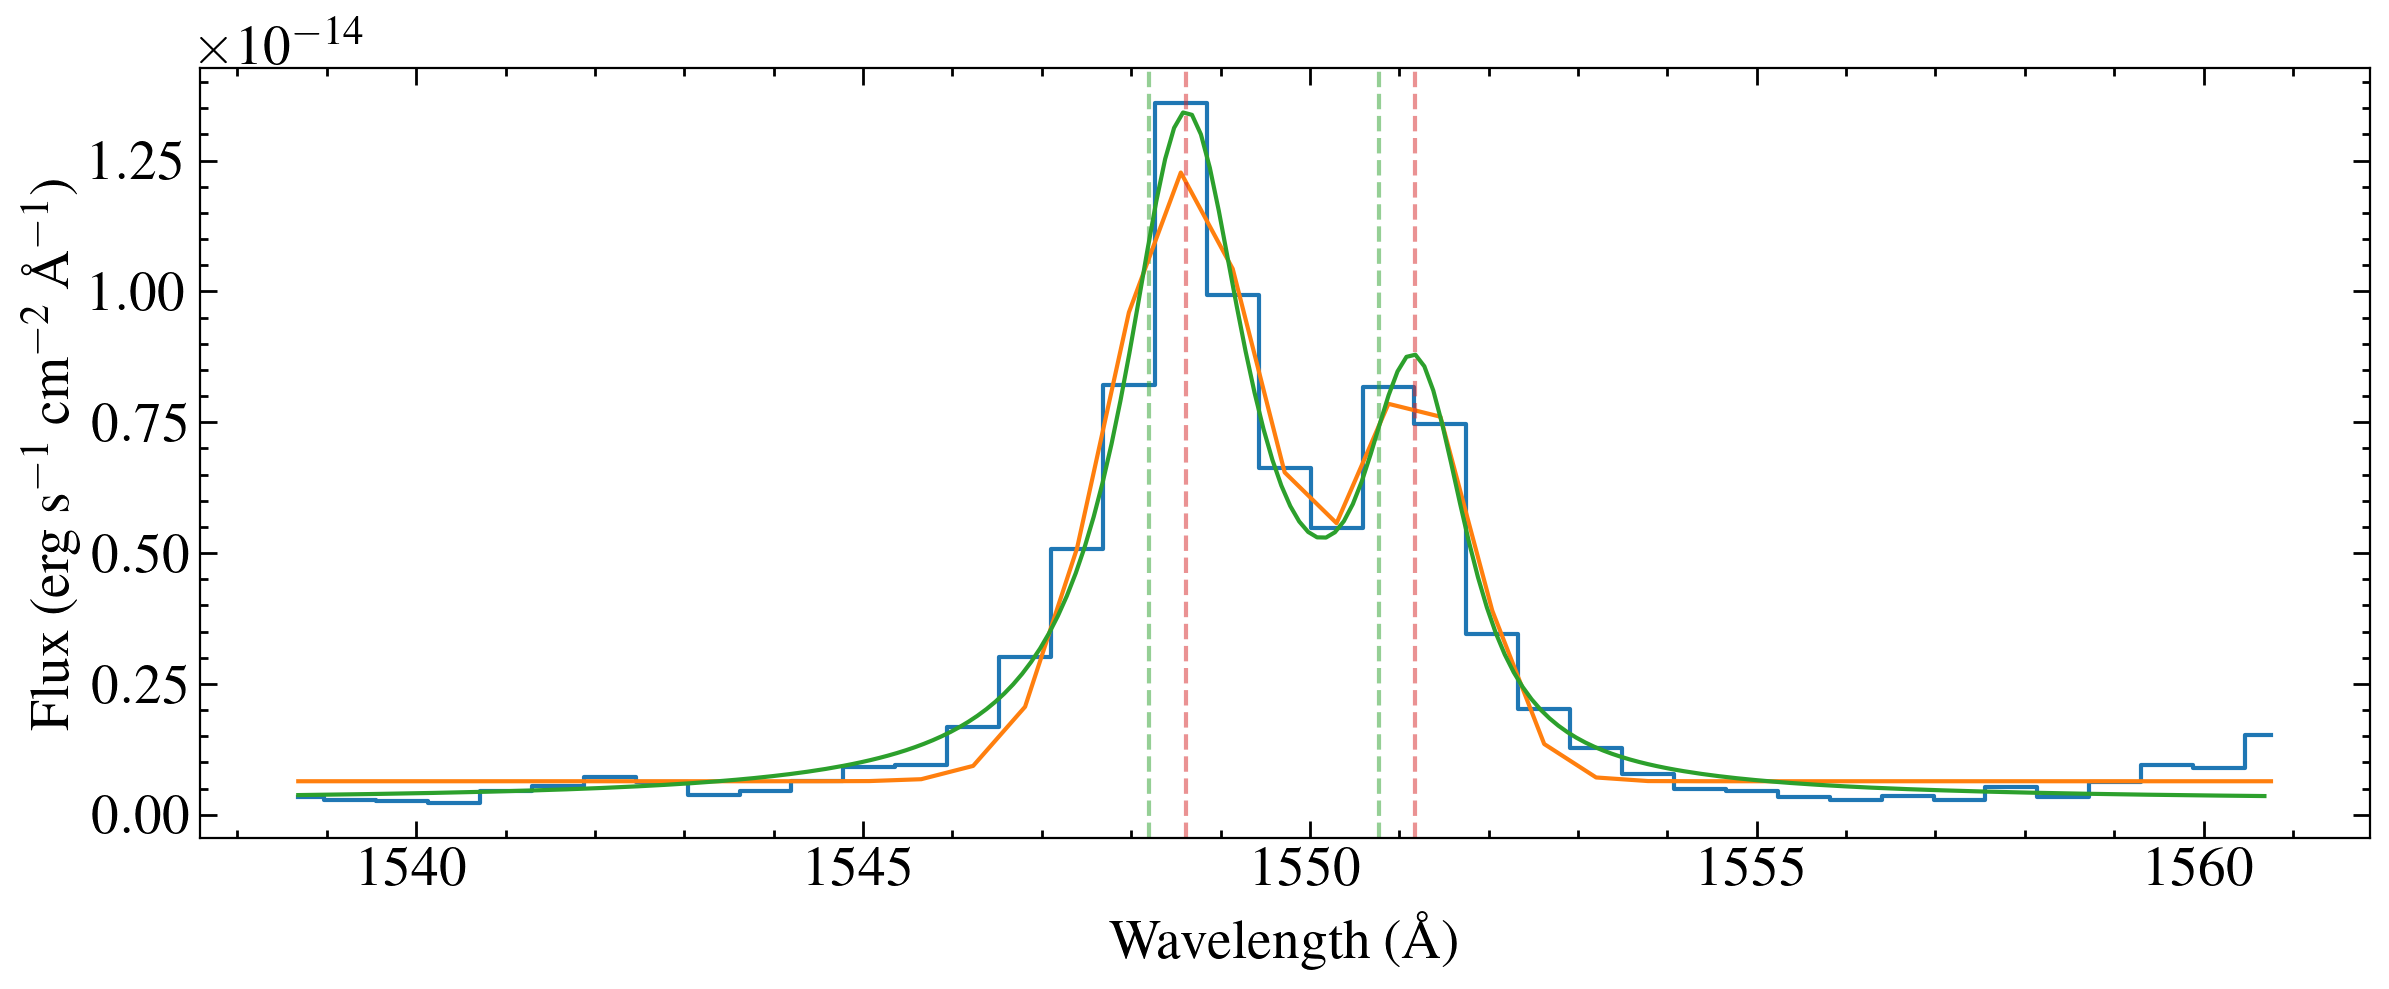

Gaussian
[64.12877872] km / s
Voigt
68.38551336491389 km / s 4.189587368342863


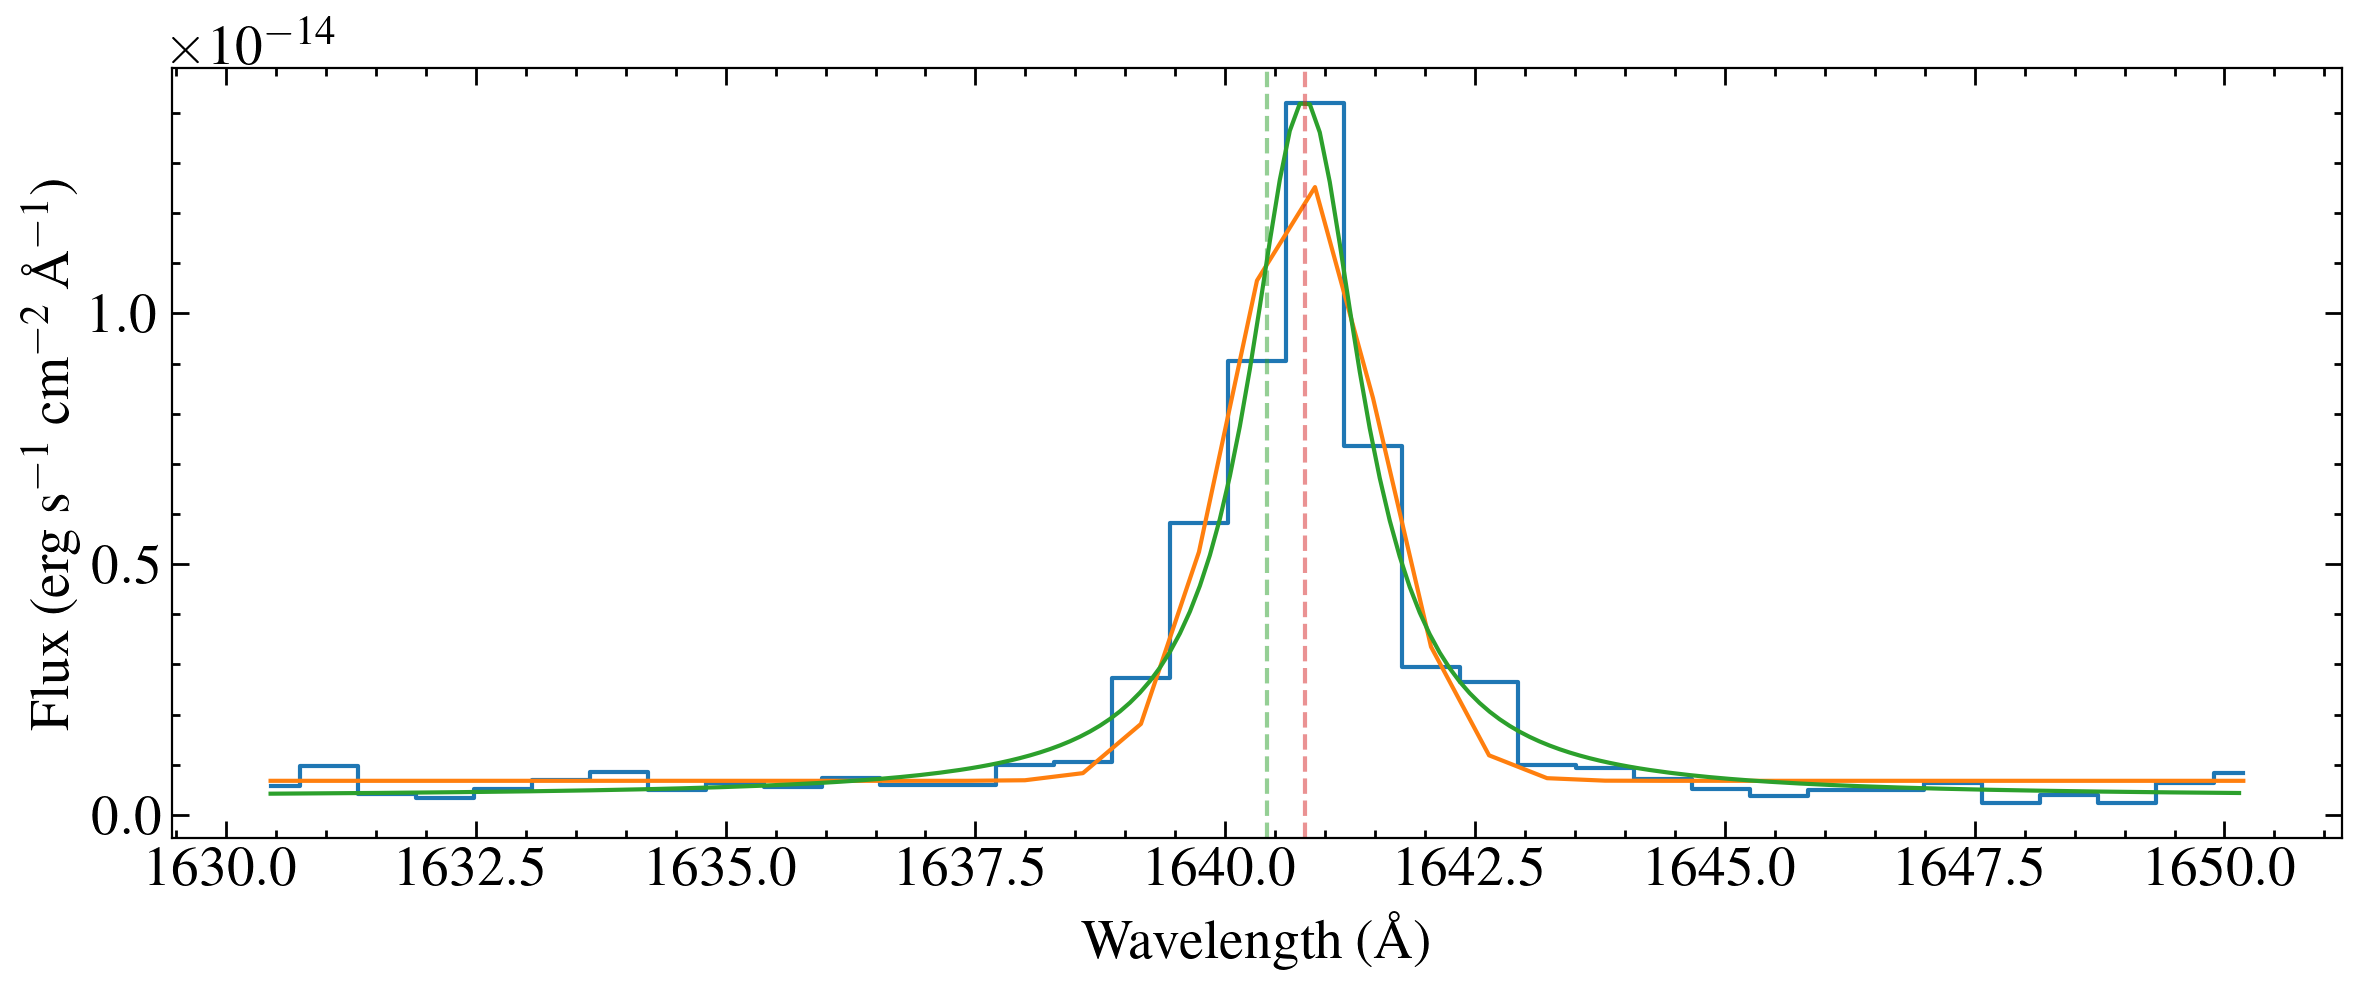

89.56385379242428 97.33460253091616 13.445863191850314


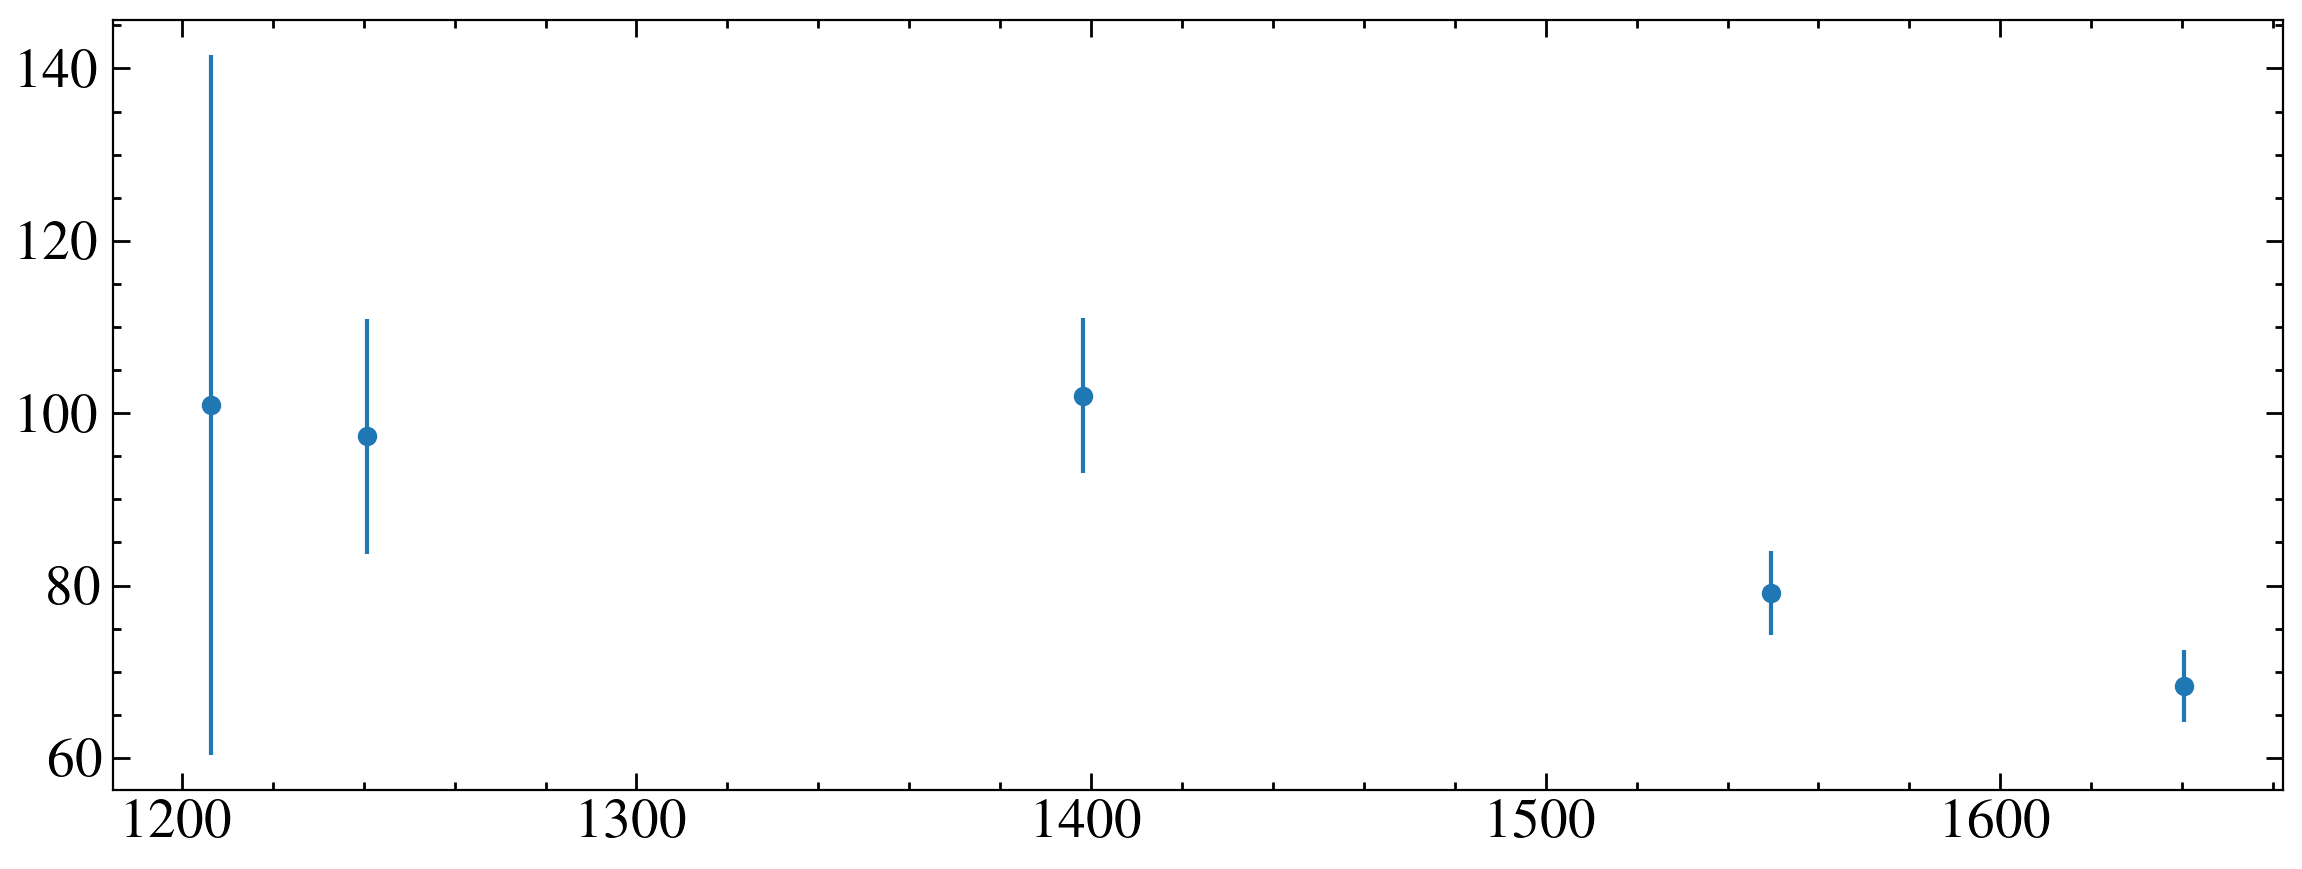

Gaussian
[76.34772542] km / s
Voigt
76.34800404978435 km / s 32.016025181282615


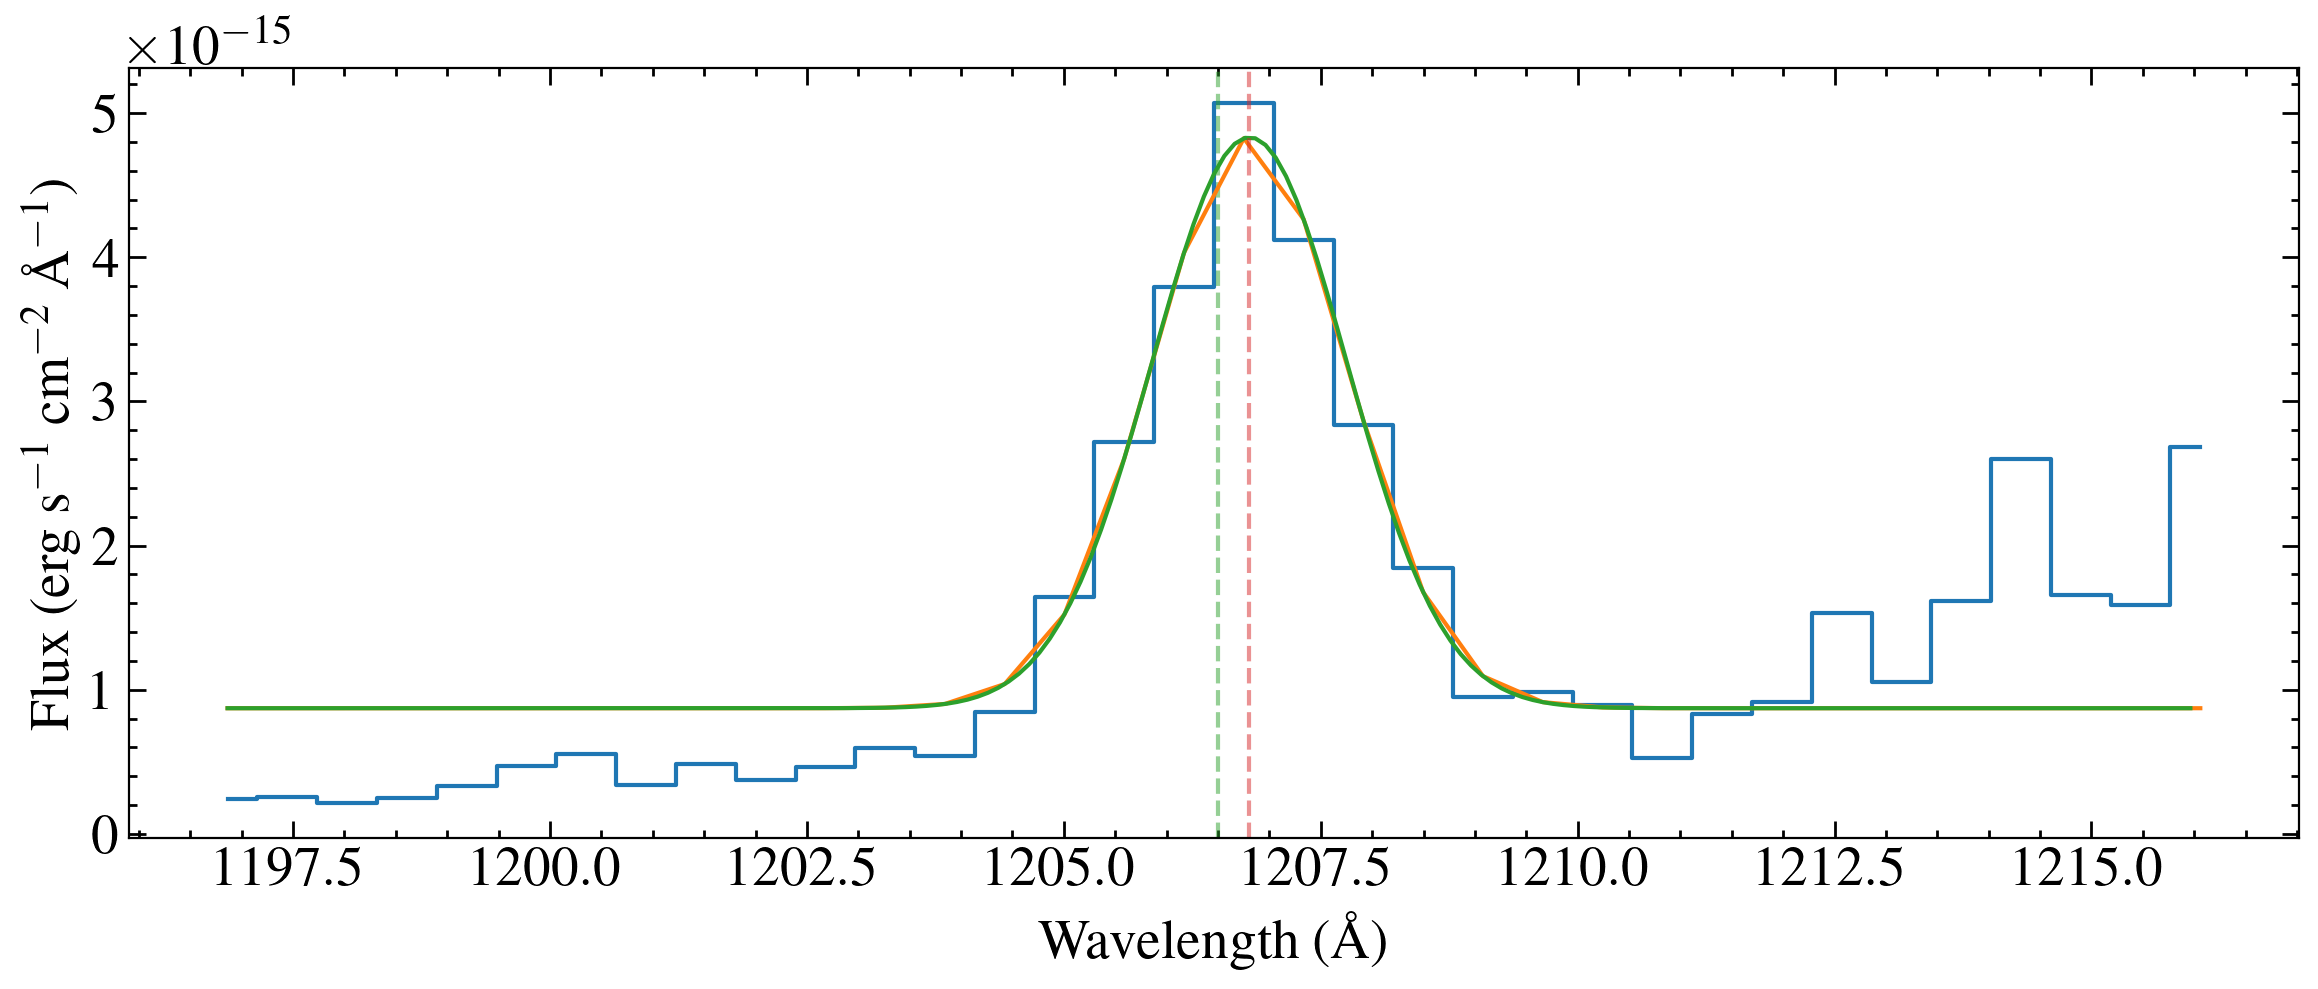

Gaussian
[  58.30886971 -902.66776413] km / s
Voigt
63.18591883681677 km / s 20.710524659672913


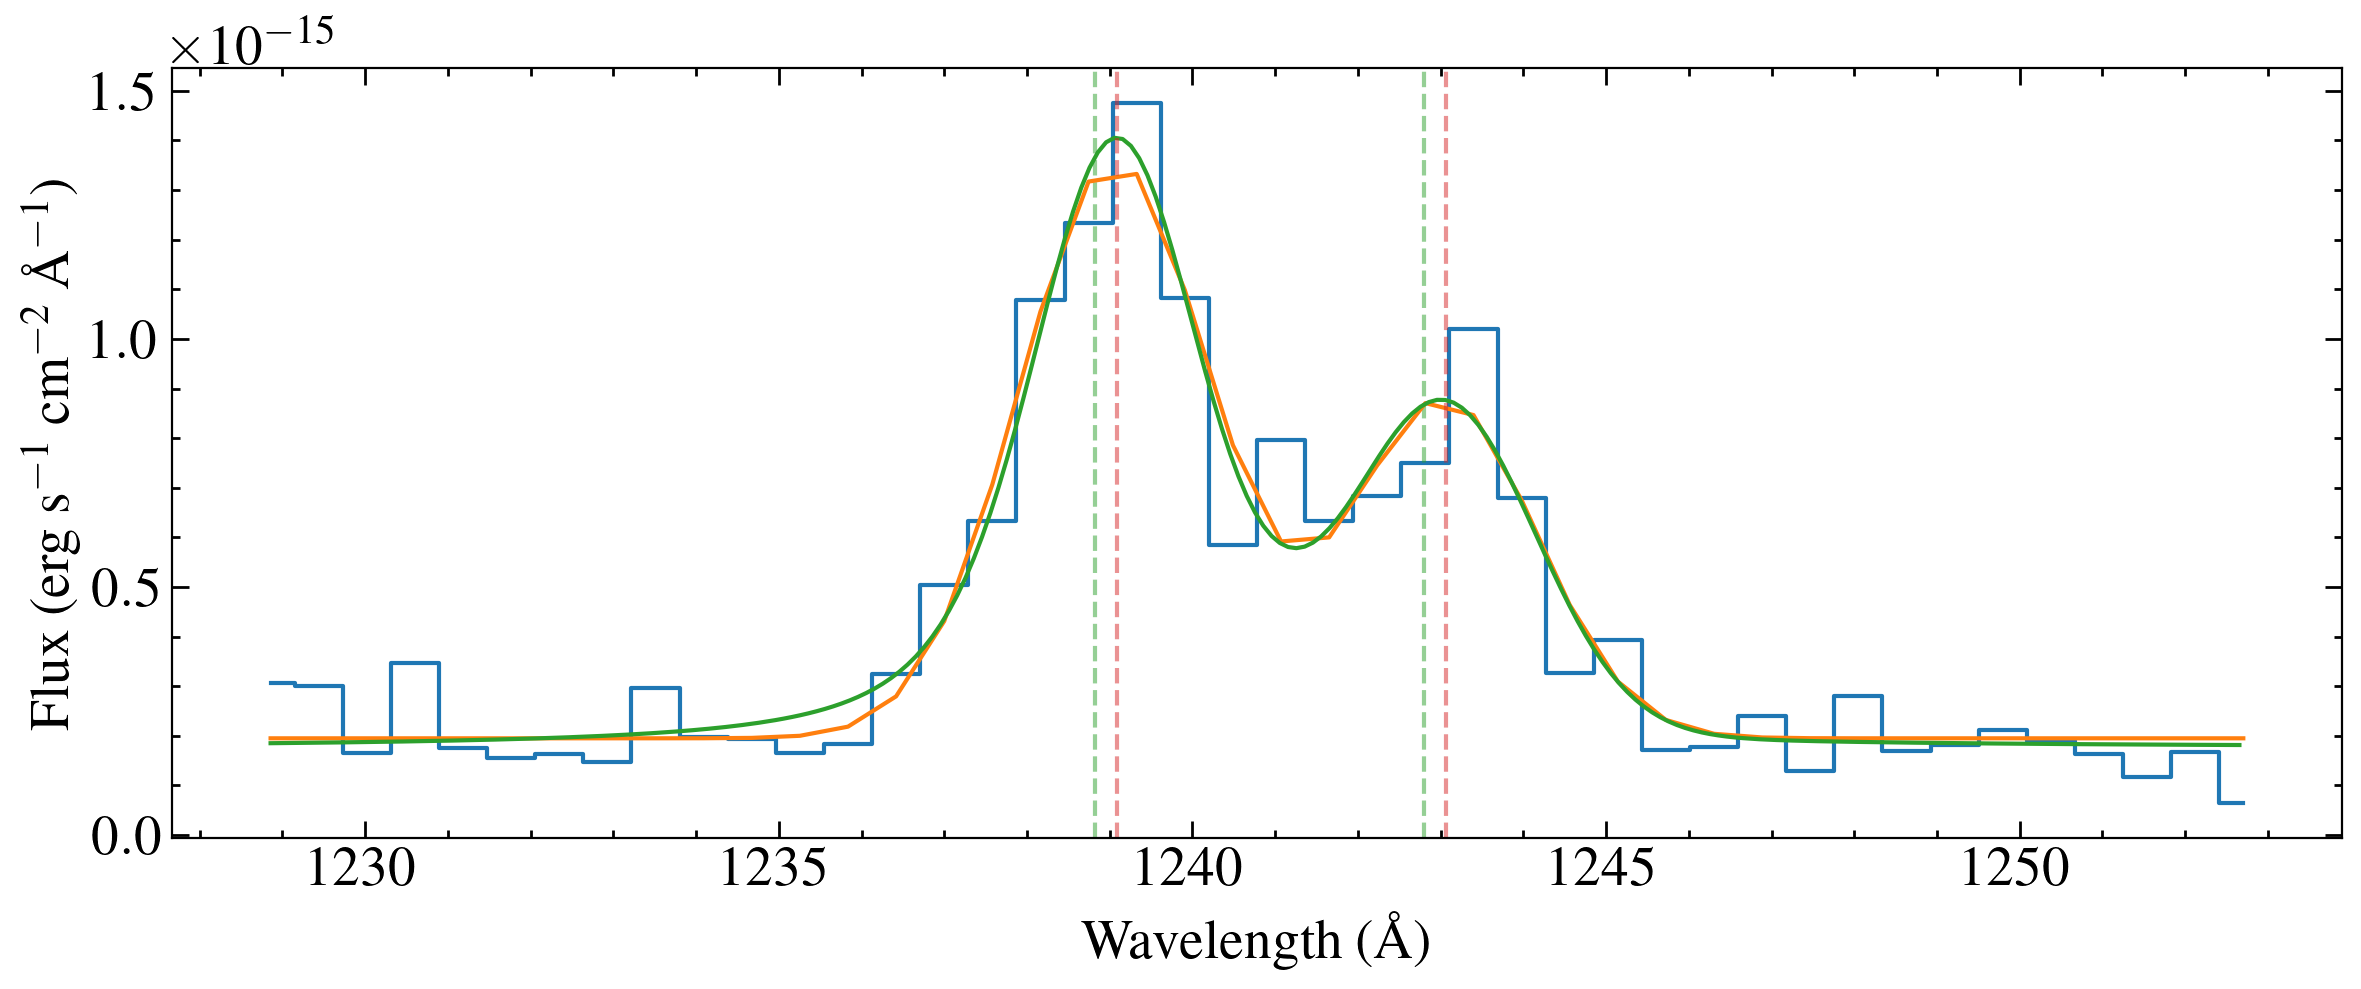

Gaussian
[   85.29445198 -1841.89100134] km / s
Voigt
86.5658977577987 km / s 4.464666672573877


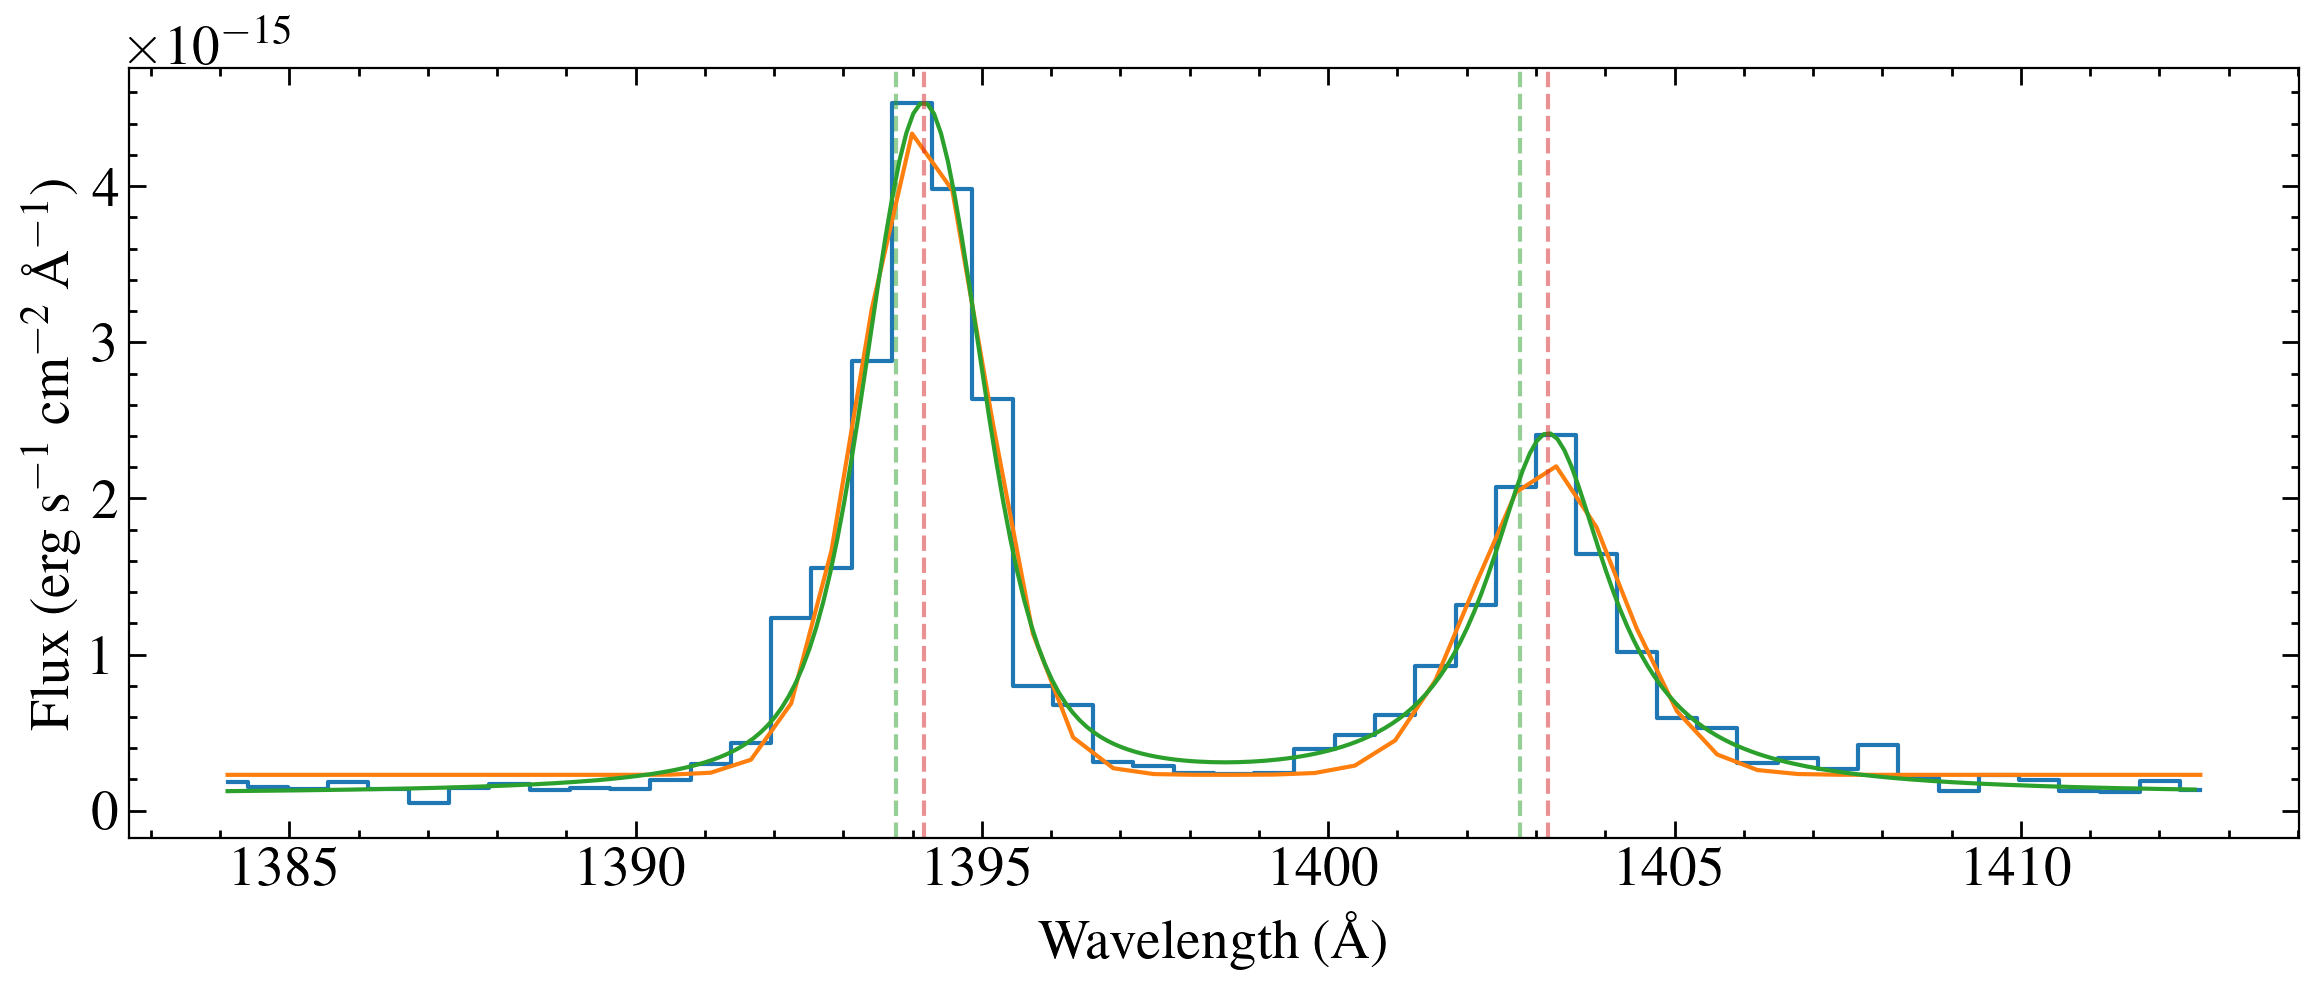

Gaussian
[  66.23667535 -430.8942401 ] km / s
Voigt
70.01565945071876 km / s 5.223761016413178


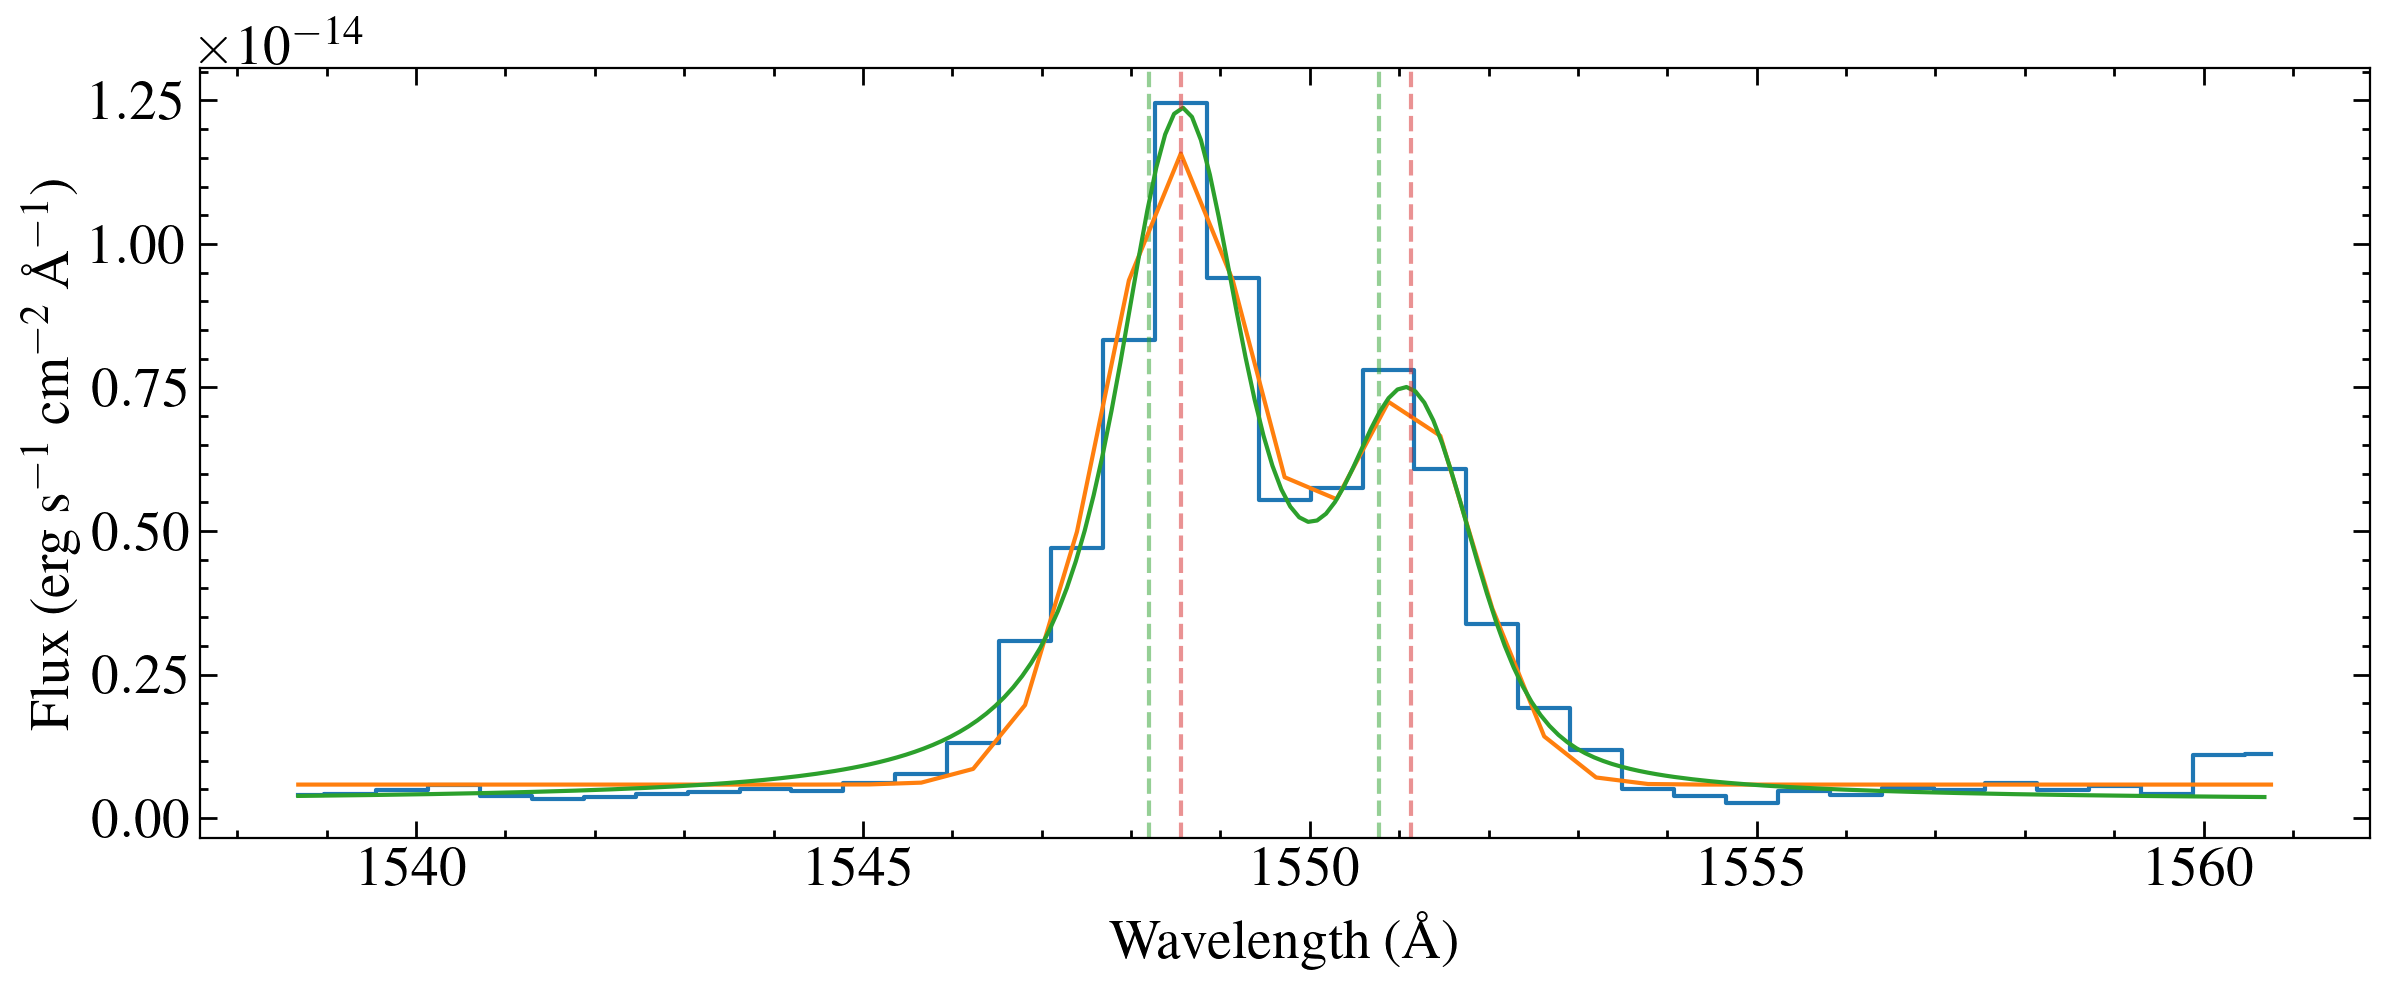

Gaussian
[75.8447989] km / s
Voigt
73.11796416514147 km / s 3.9770637281340697


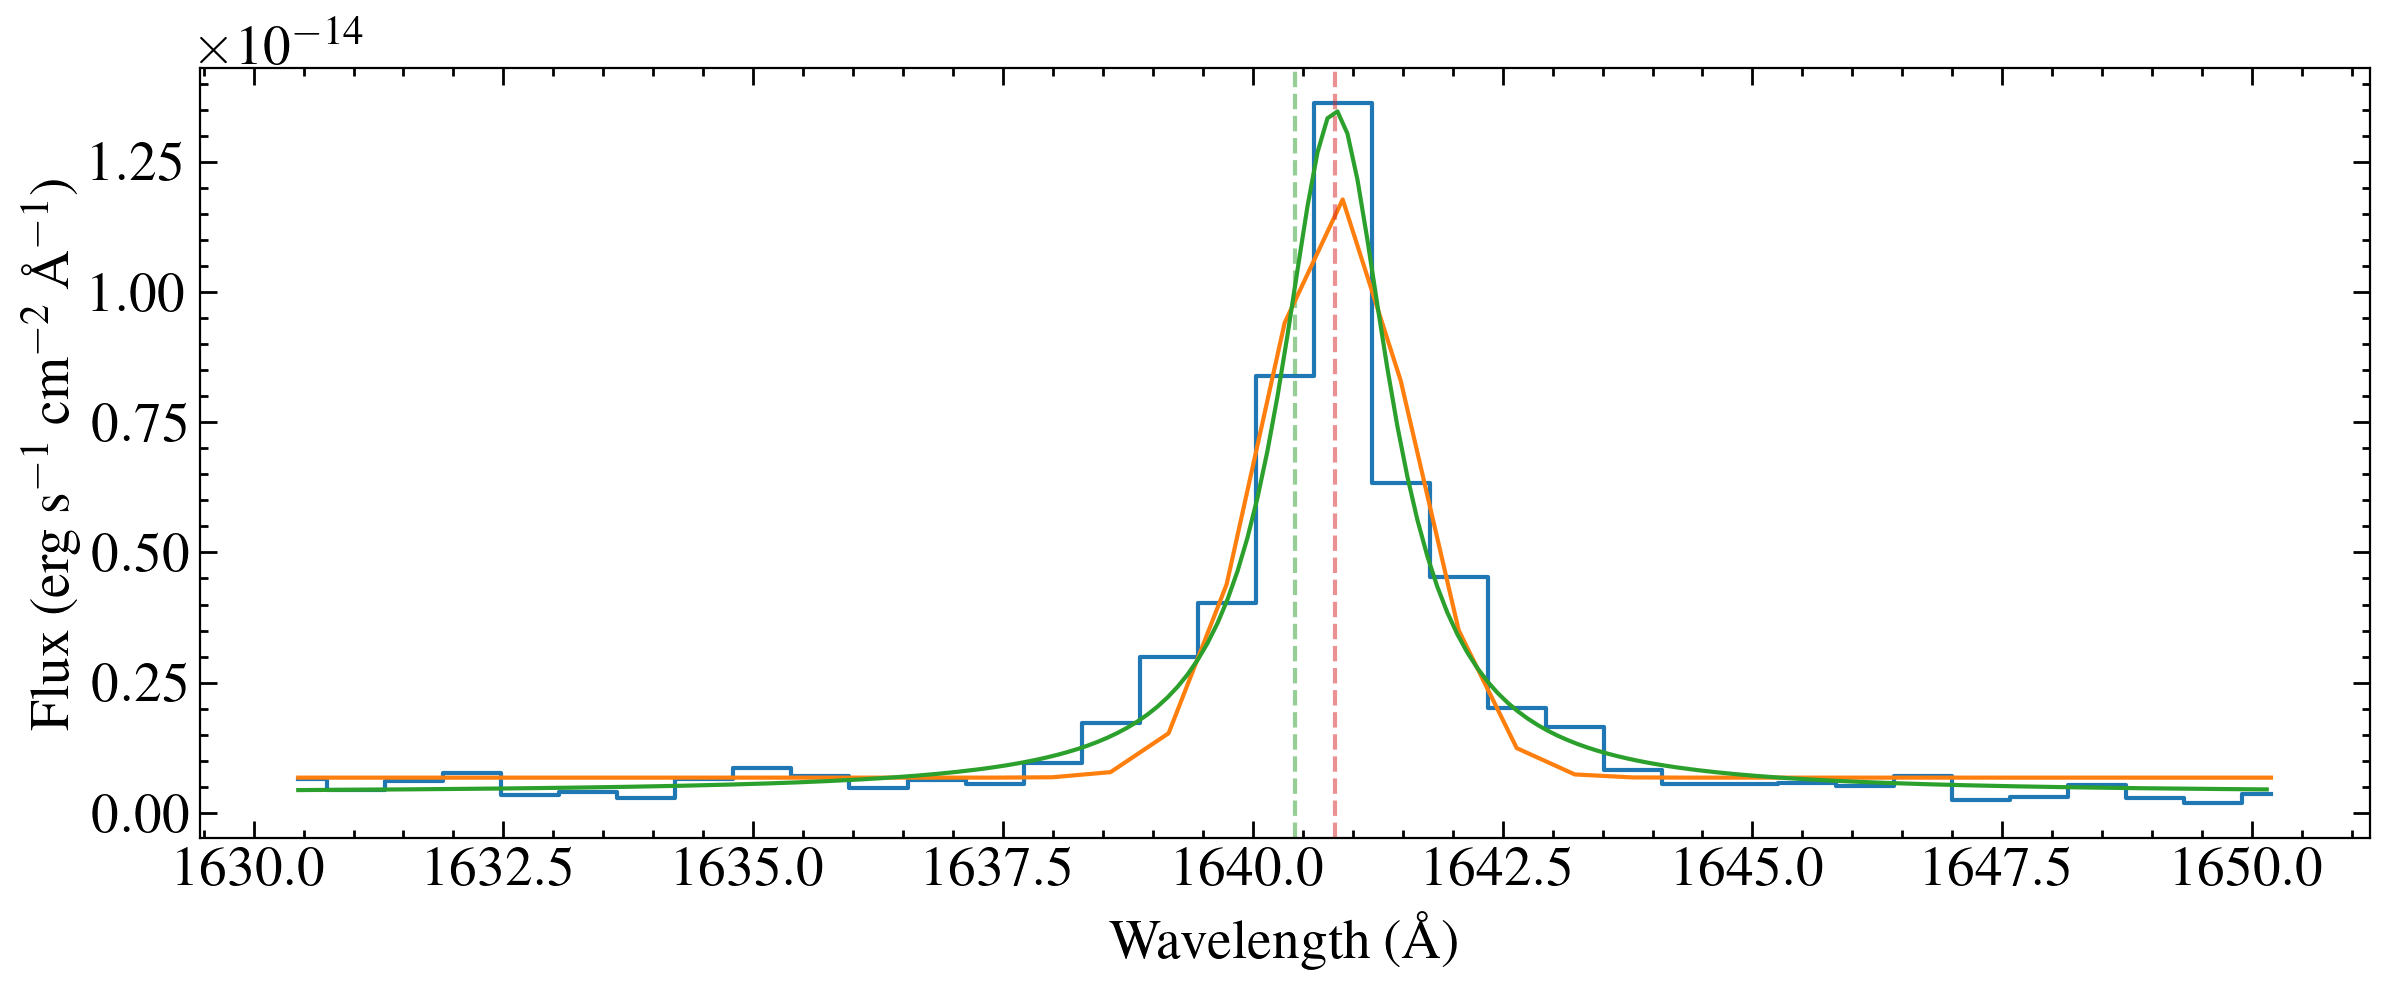

73.84668885205201 73.11796416514147 7.70577311069258


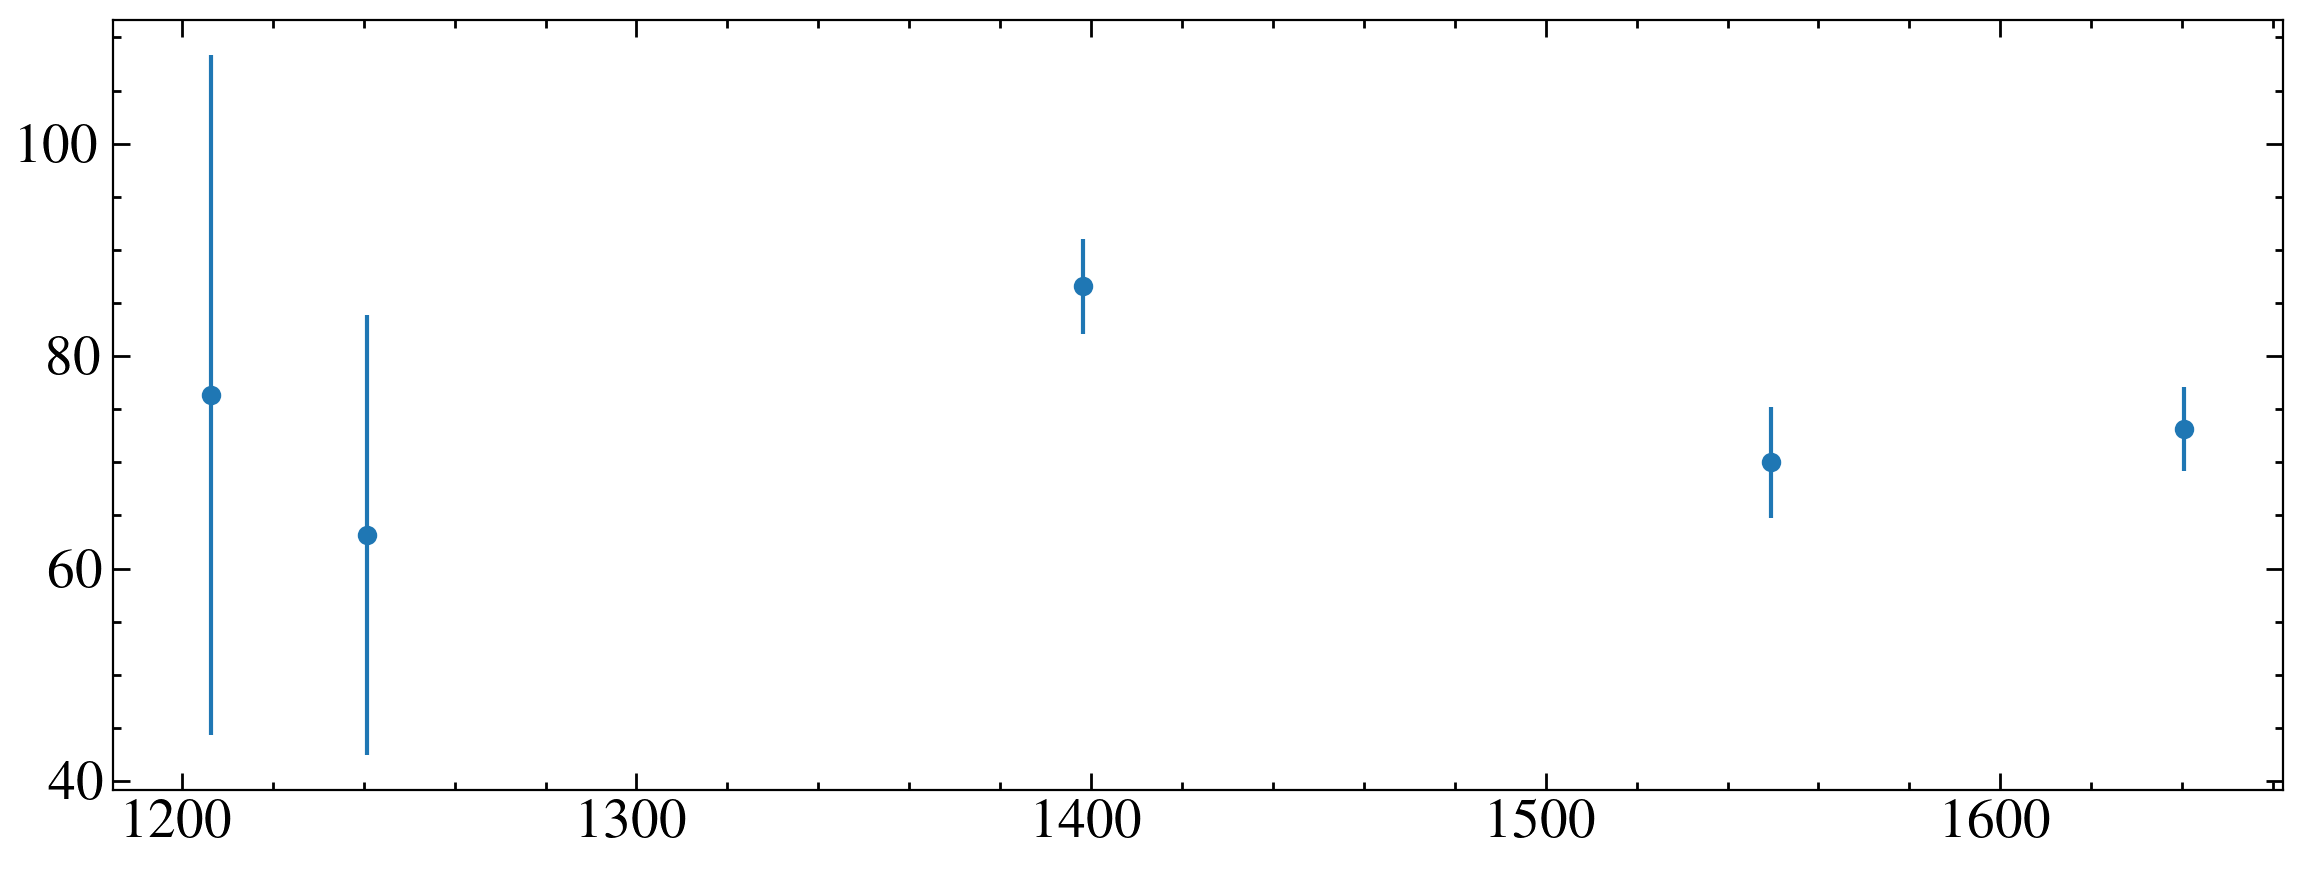

Gaussian
[80.31169331] km / s
Voigt
80.35637248138366 km / s 34.00172979186749


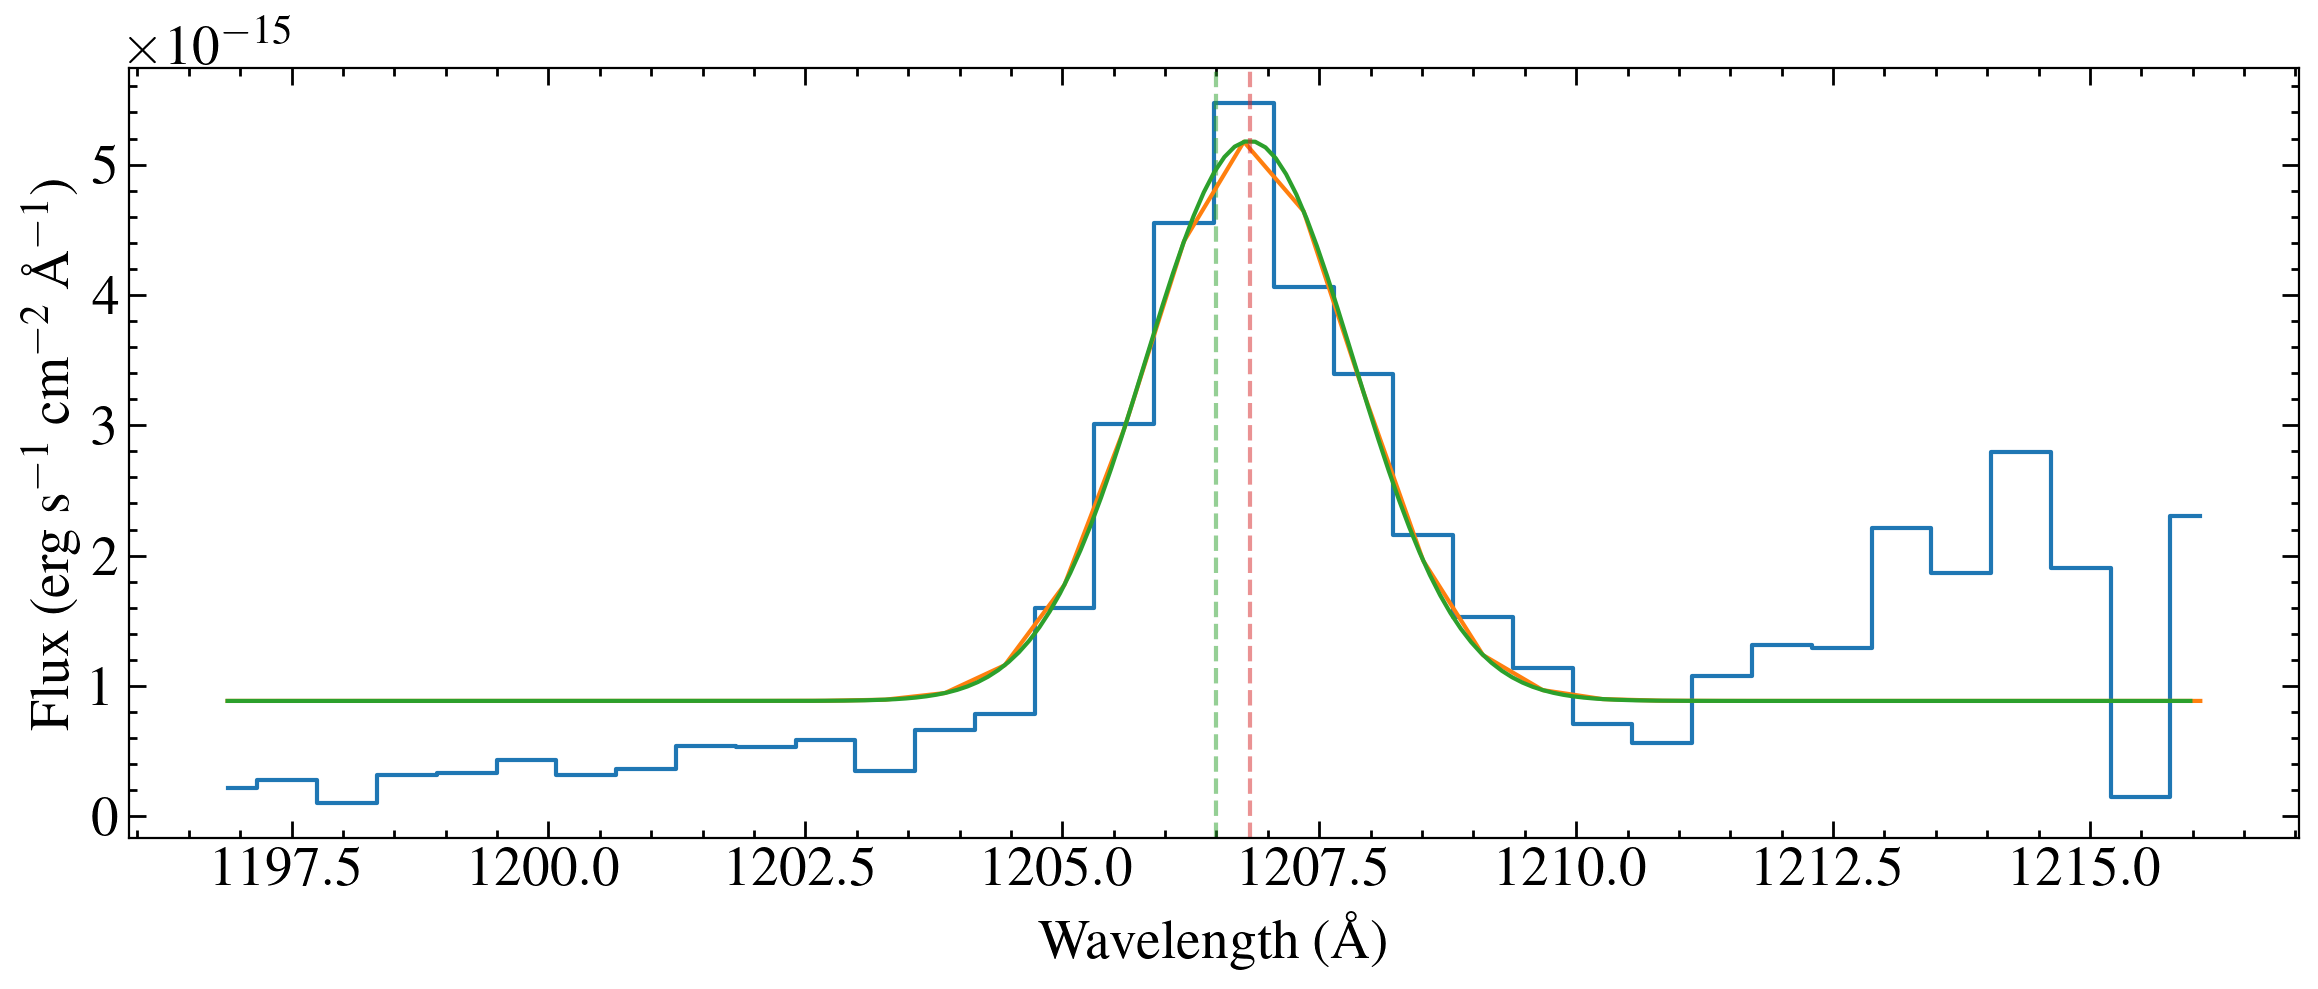

Gaussian
[  65.69079715 -895.30949465] km / s
Voigt
79.92923909461501 km / s 15.906726239706003


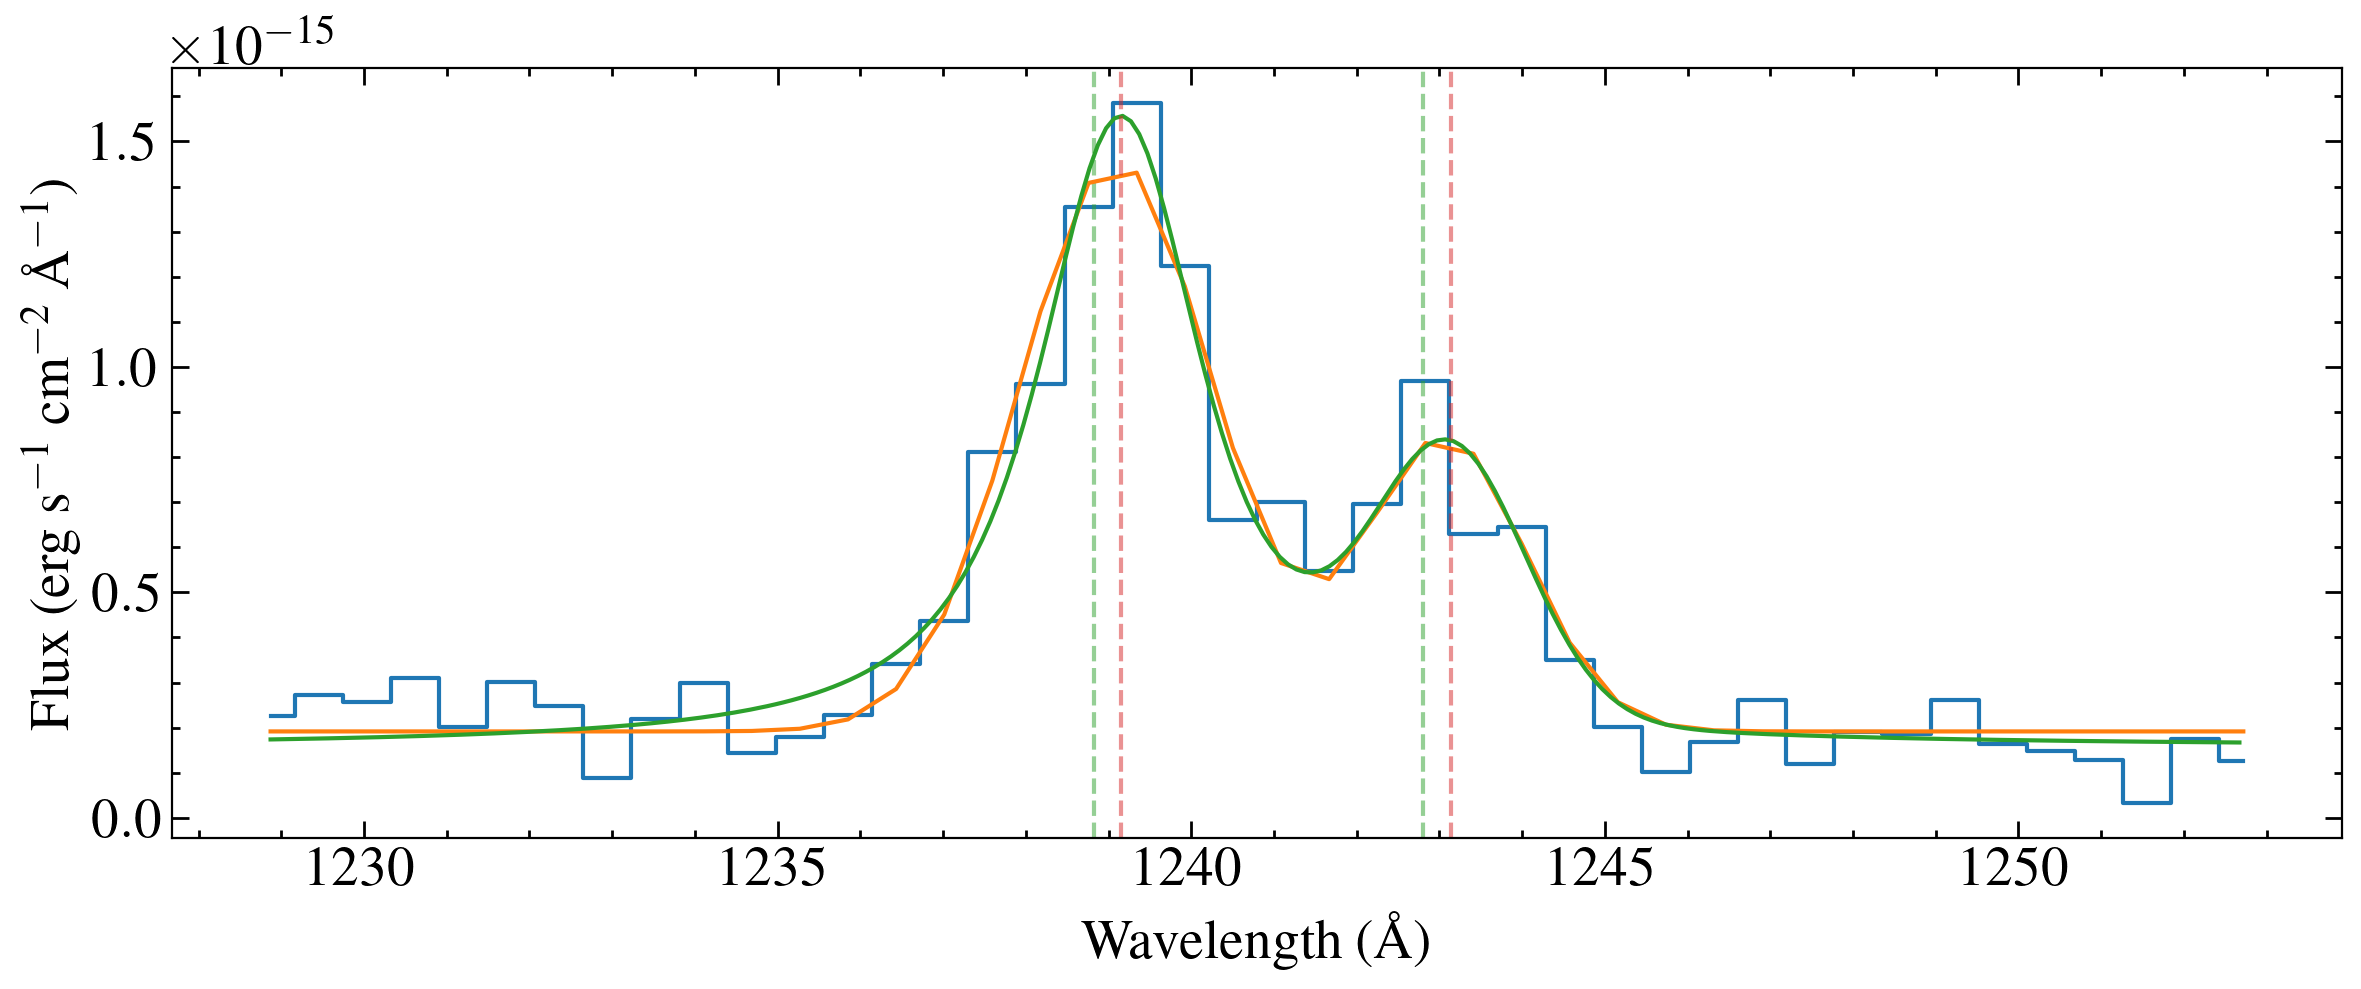

Gaussian
[   72.86827936 -1854.23731629] km / s
Voigt
70.9775148452364 km / s 4.687594320199025


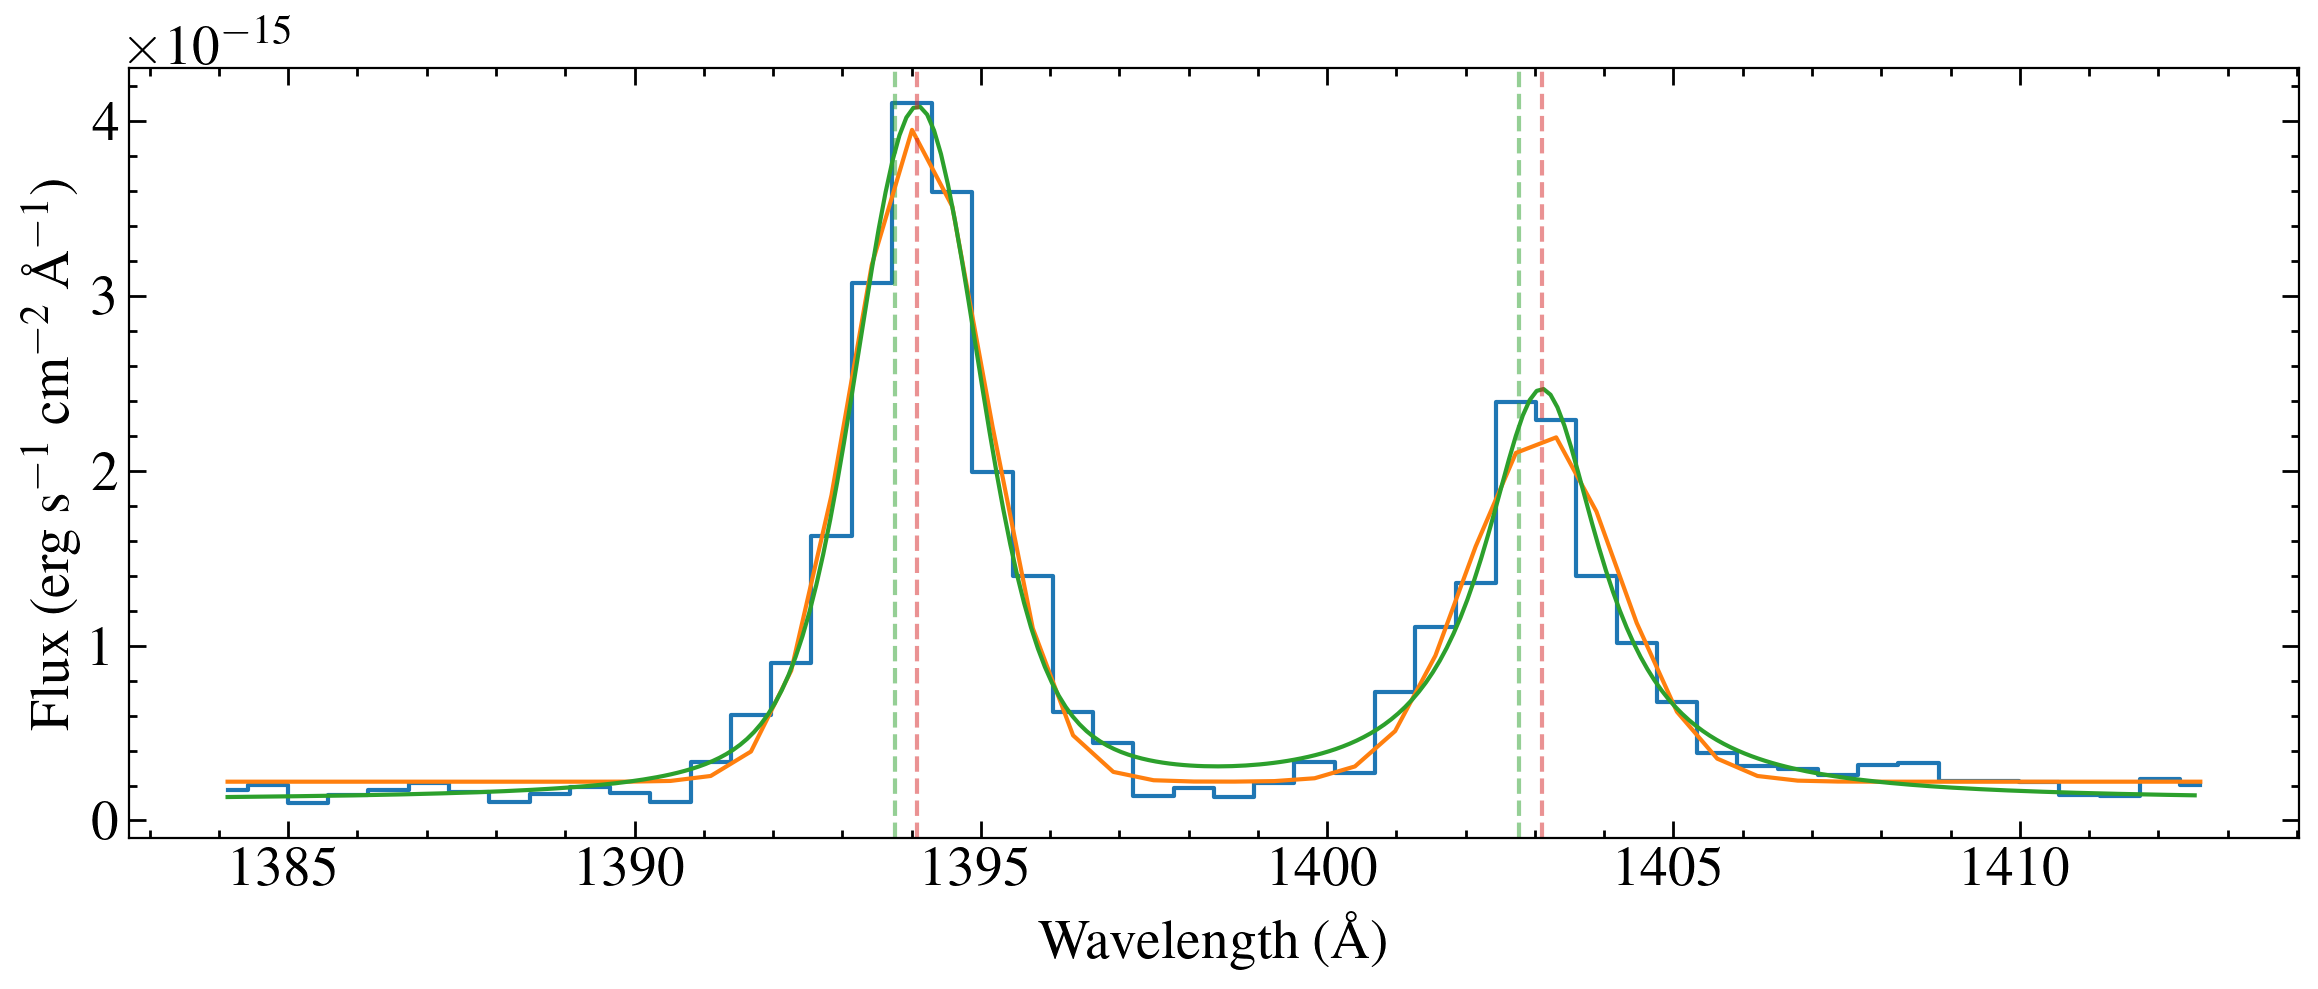

Gaussian
[  66.82481019 -430.30708032] km / s
Voigt
64.64100368509885 km / s 5.457762672173381


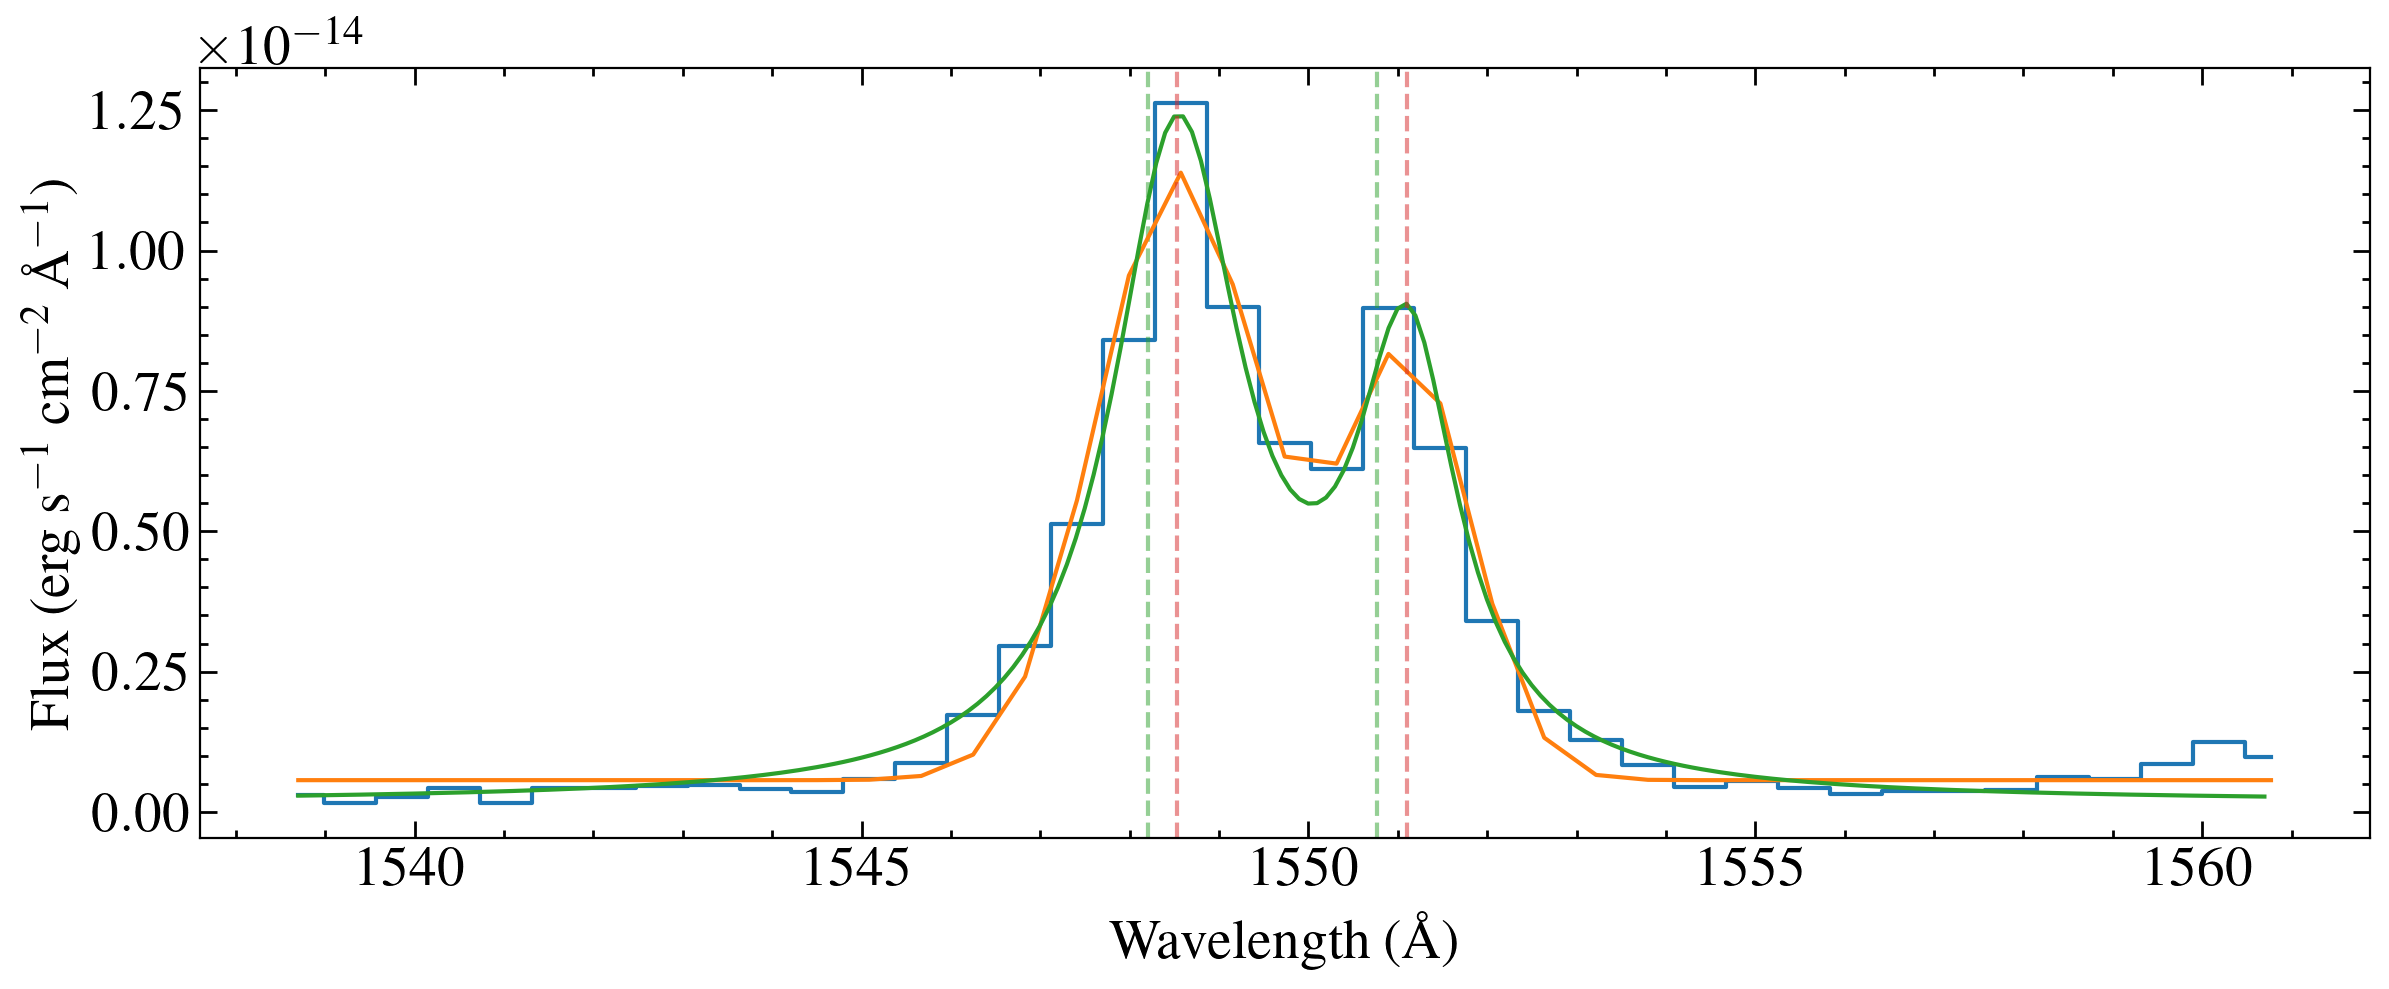

Gaussian
[49.52287275] km / s
Voigt
46.57644176585683 km / s 2.5504119264684846


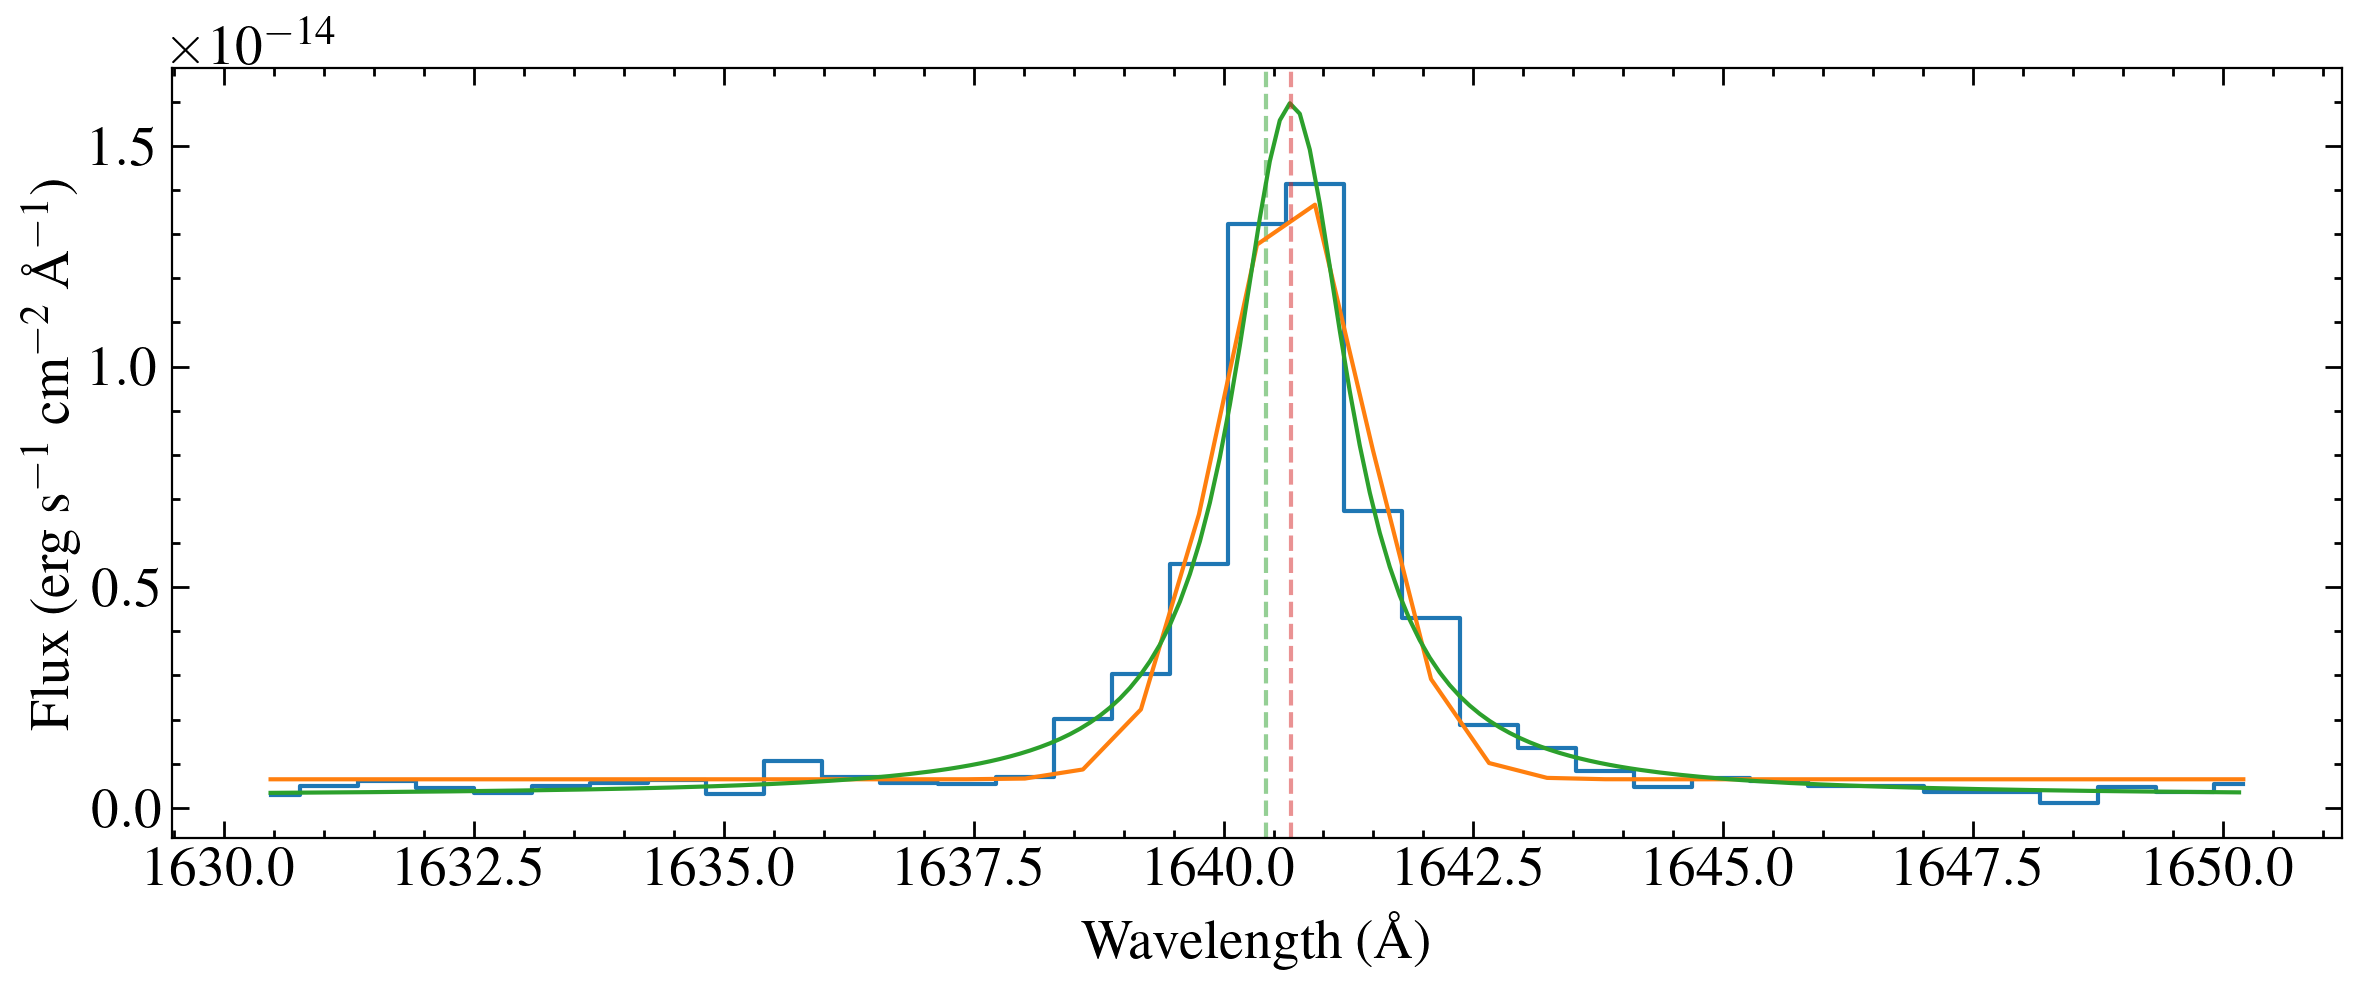

68.49611437443815 70.9775148452364 12.432806096946997


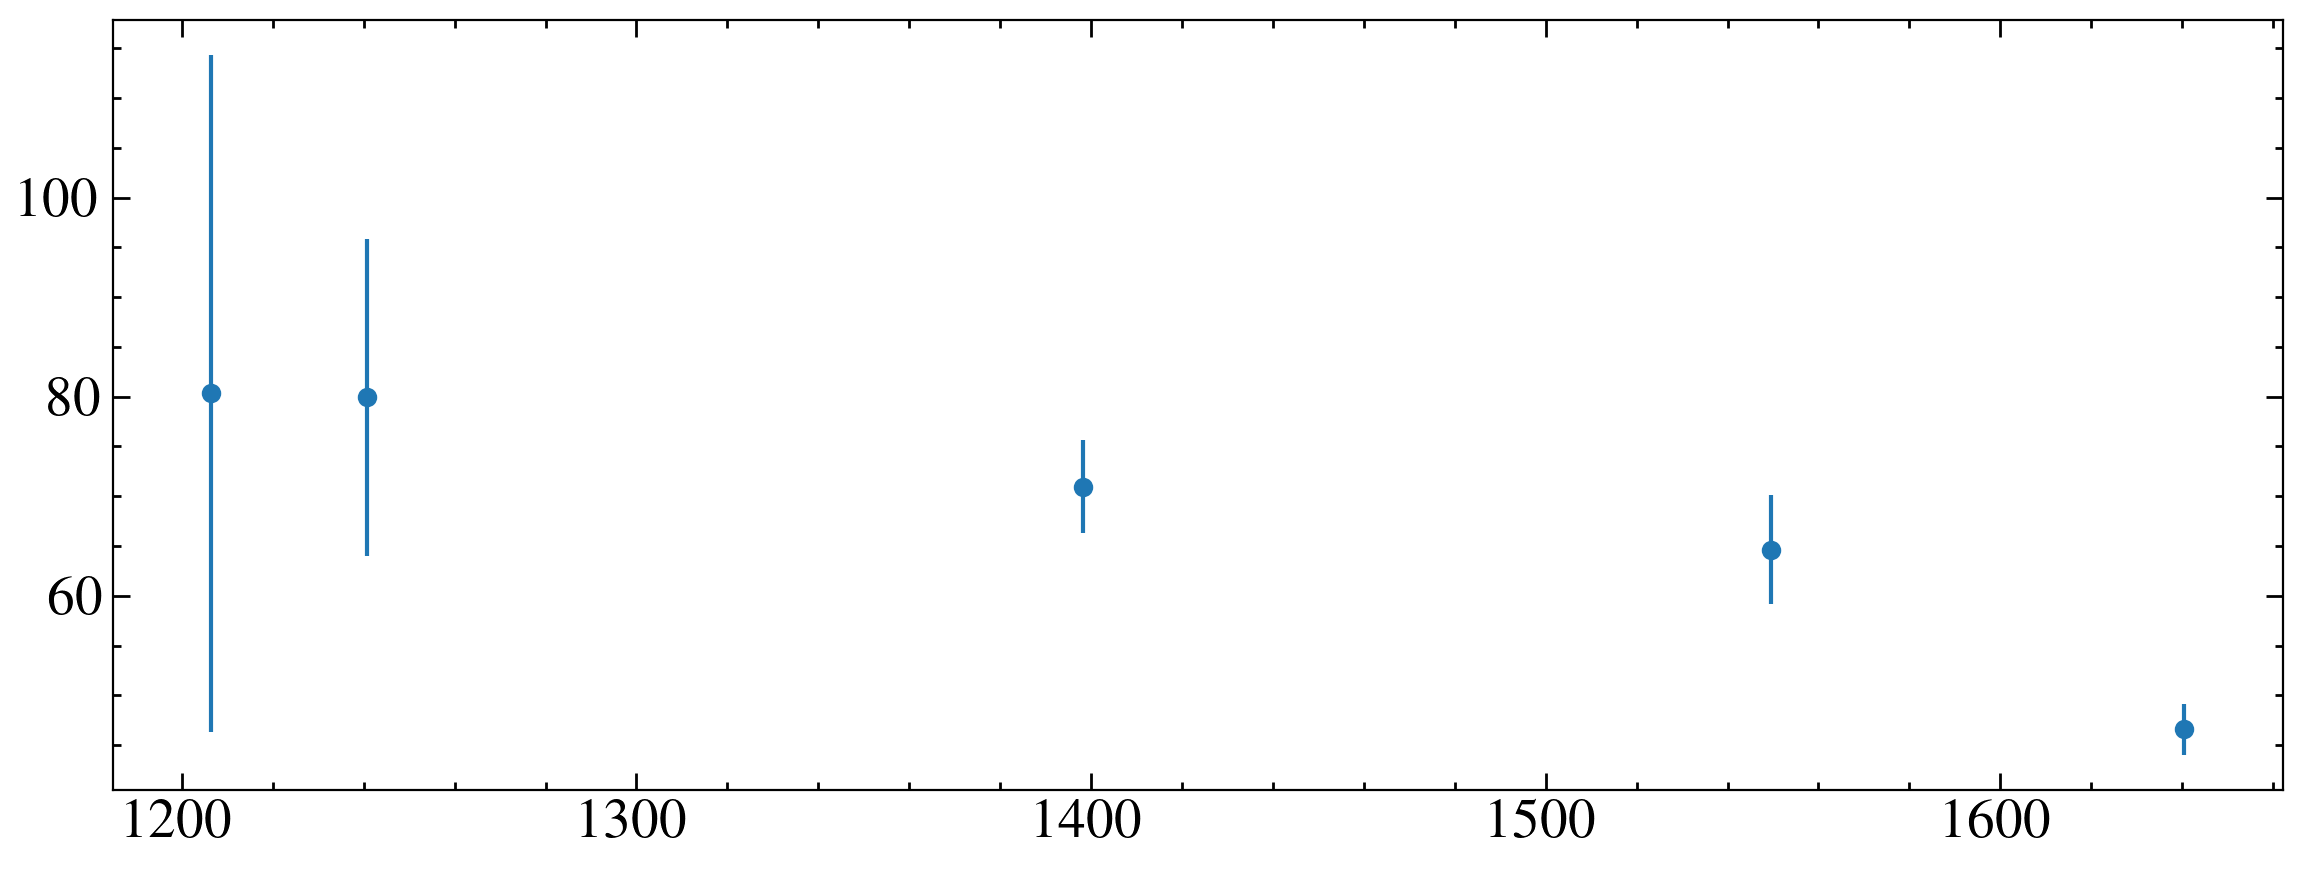

Gaussian
[83.89058347] km / s
Voigt
83.8908855532792 km / s 25.9687409830007


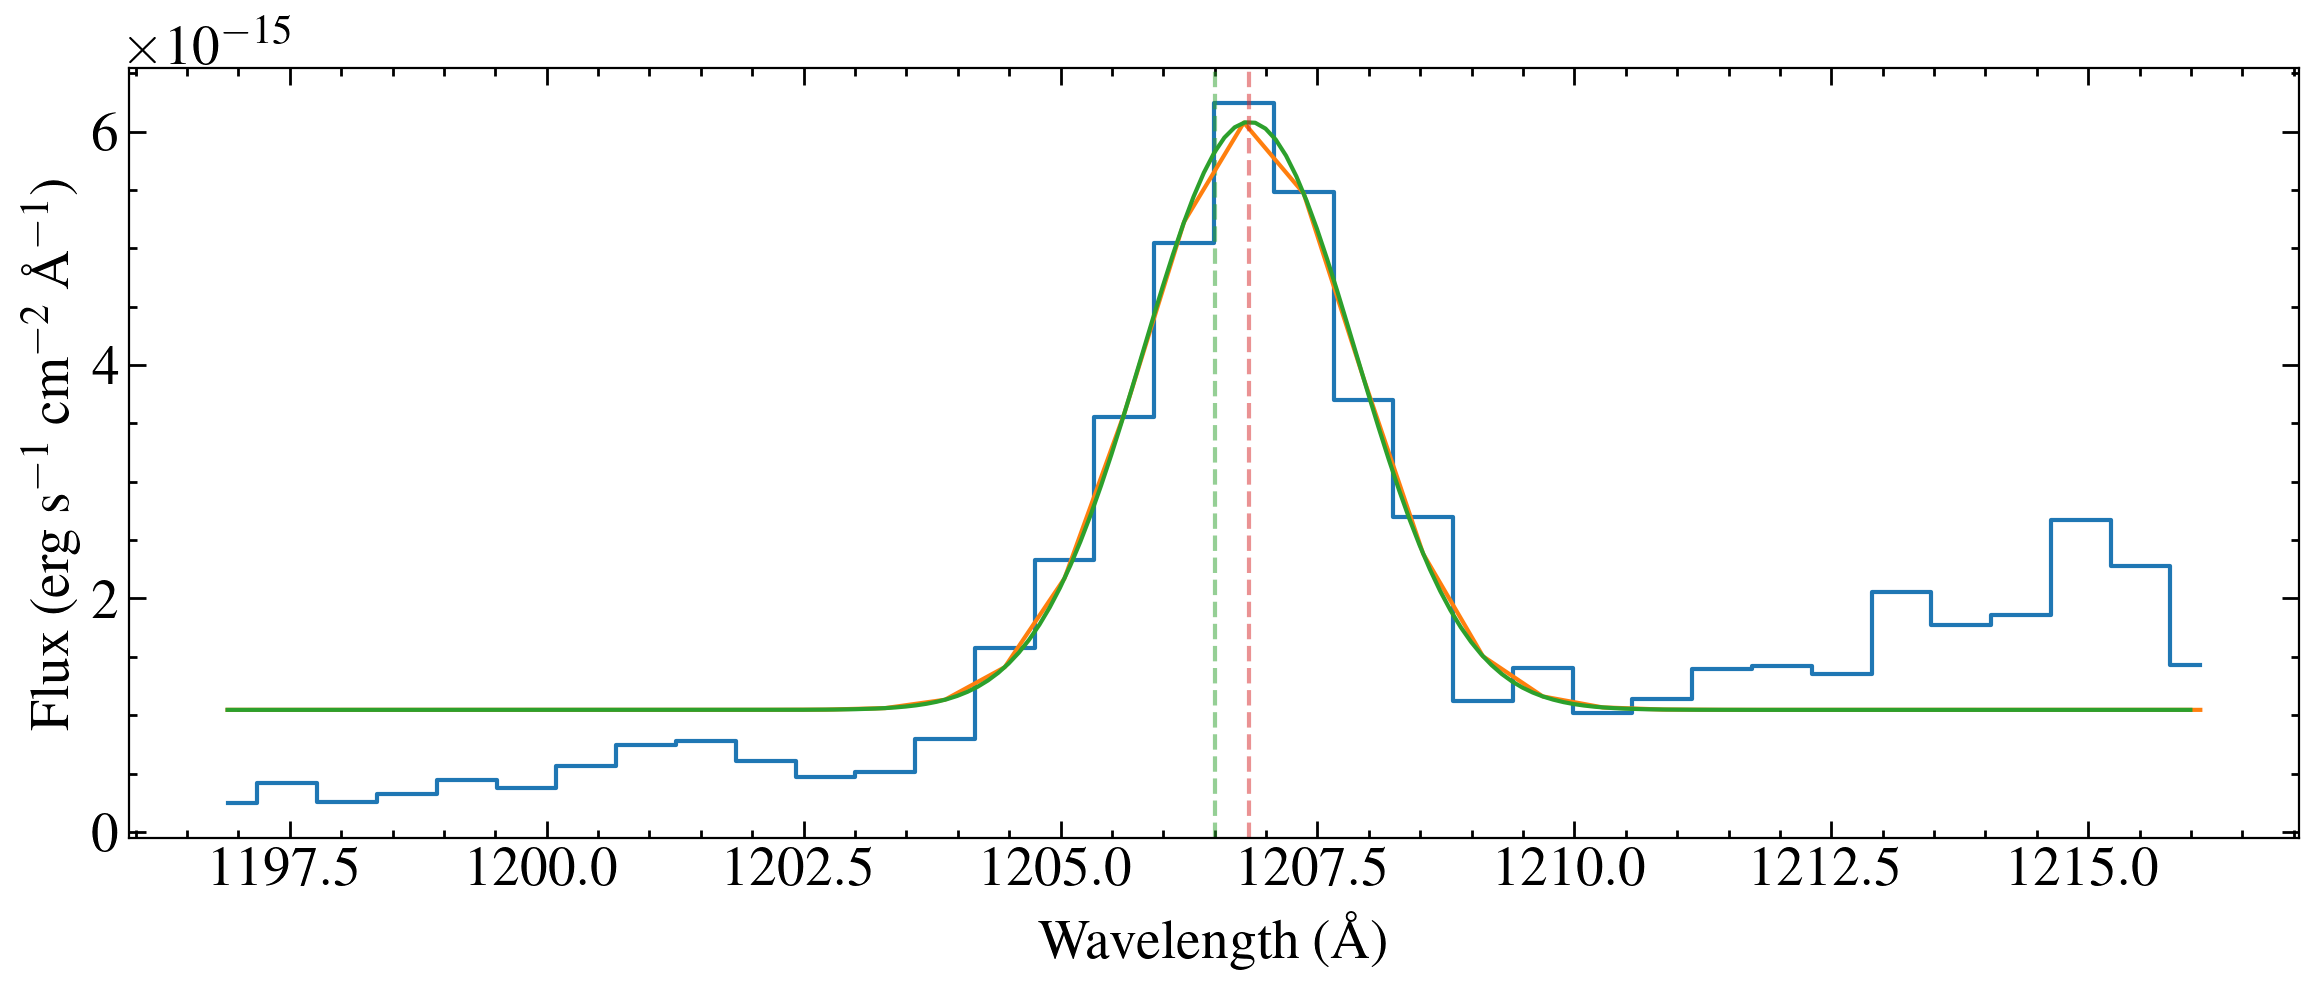

Gaussian
[  75.91726129 -885.1158048 ] km / s
Voigt
82.56648451268603 km / s 13.226465681700596


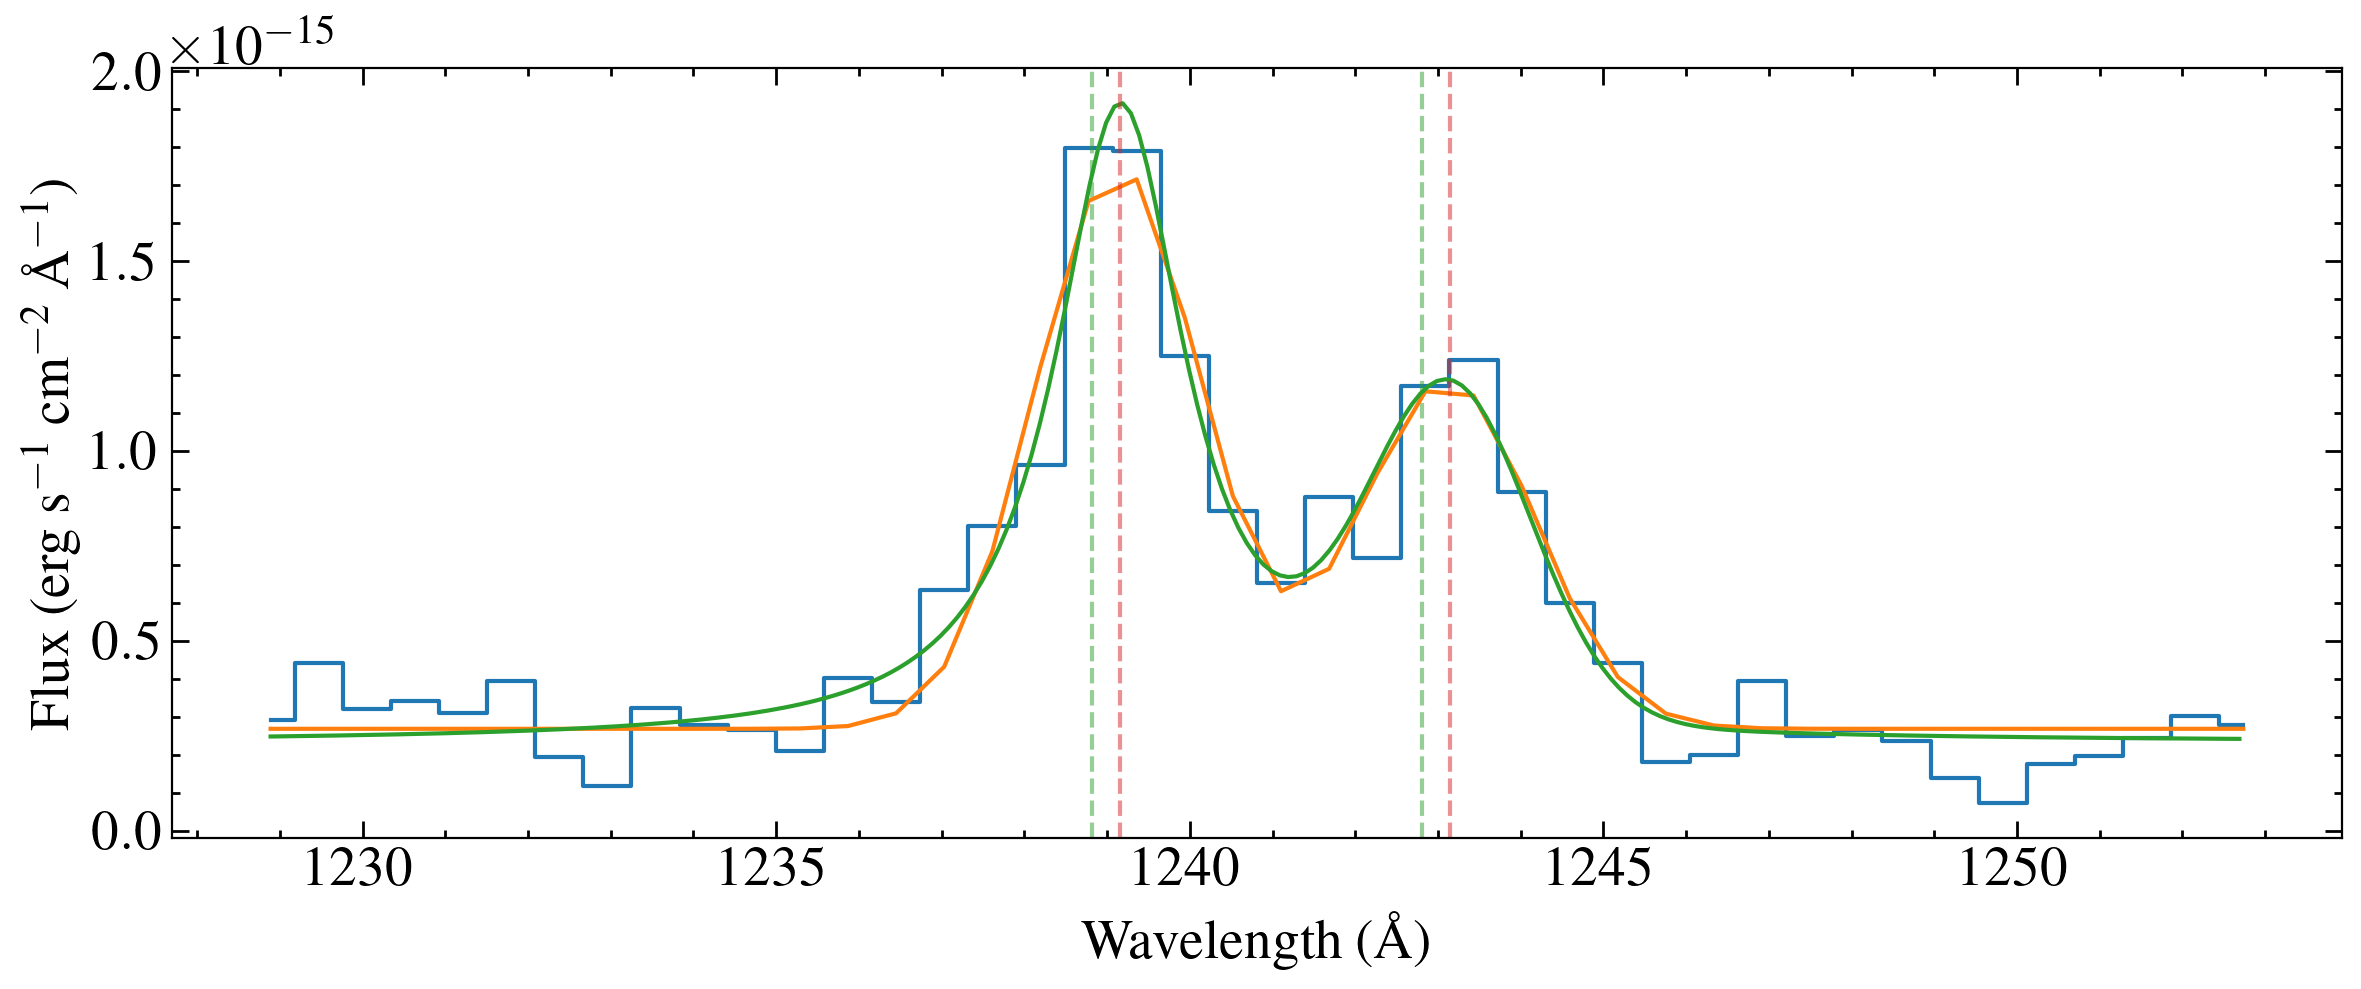

Gaussian
[   68.90909187 -1858.17105978] km / s
Voigt
71.16874695098957 km / s 4.911506475161055


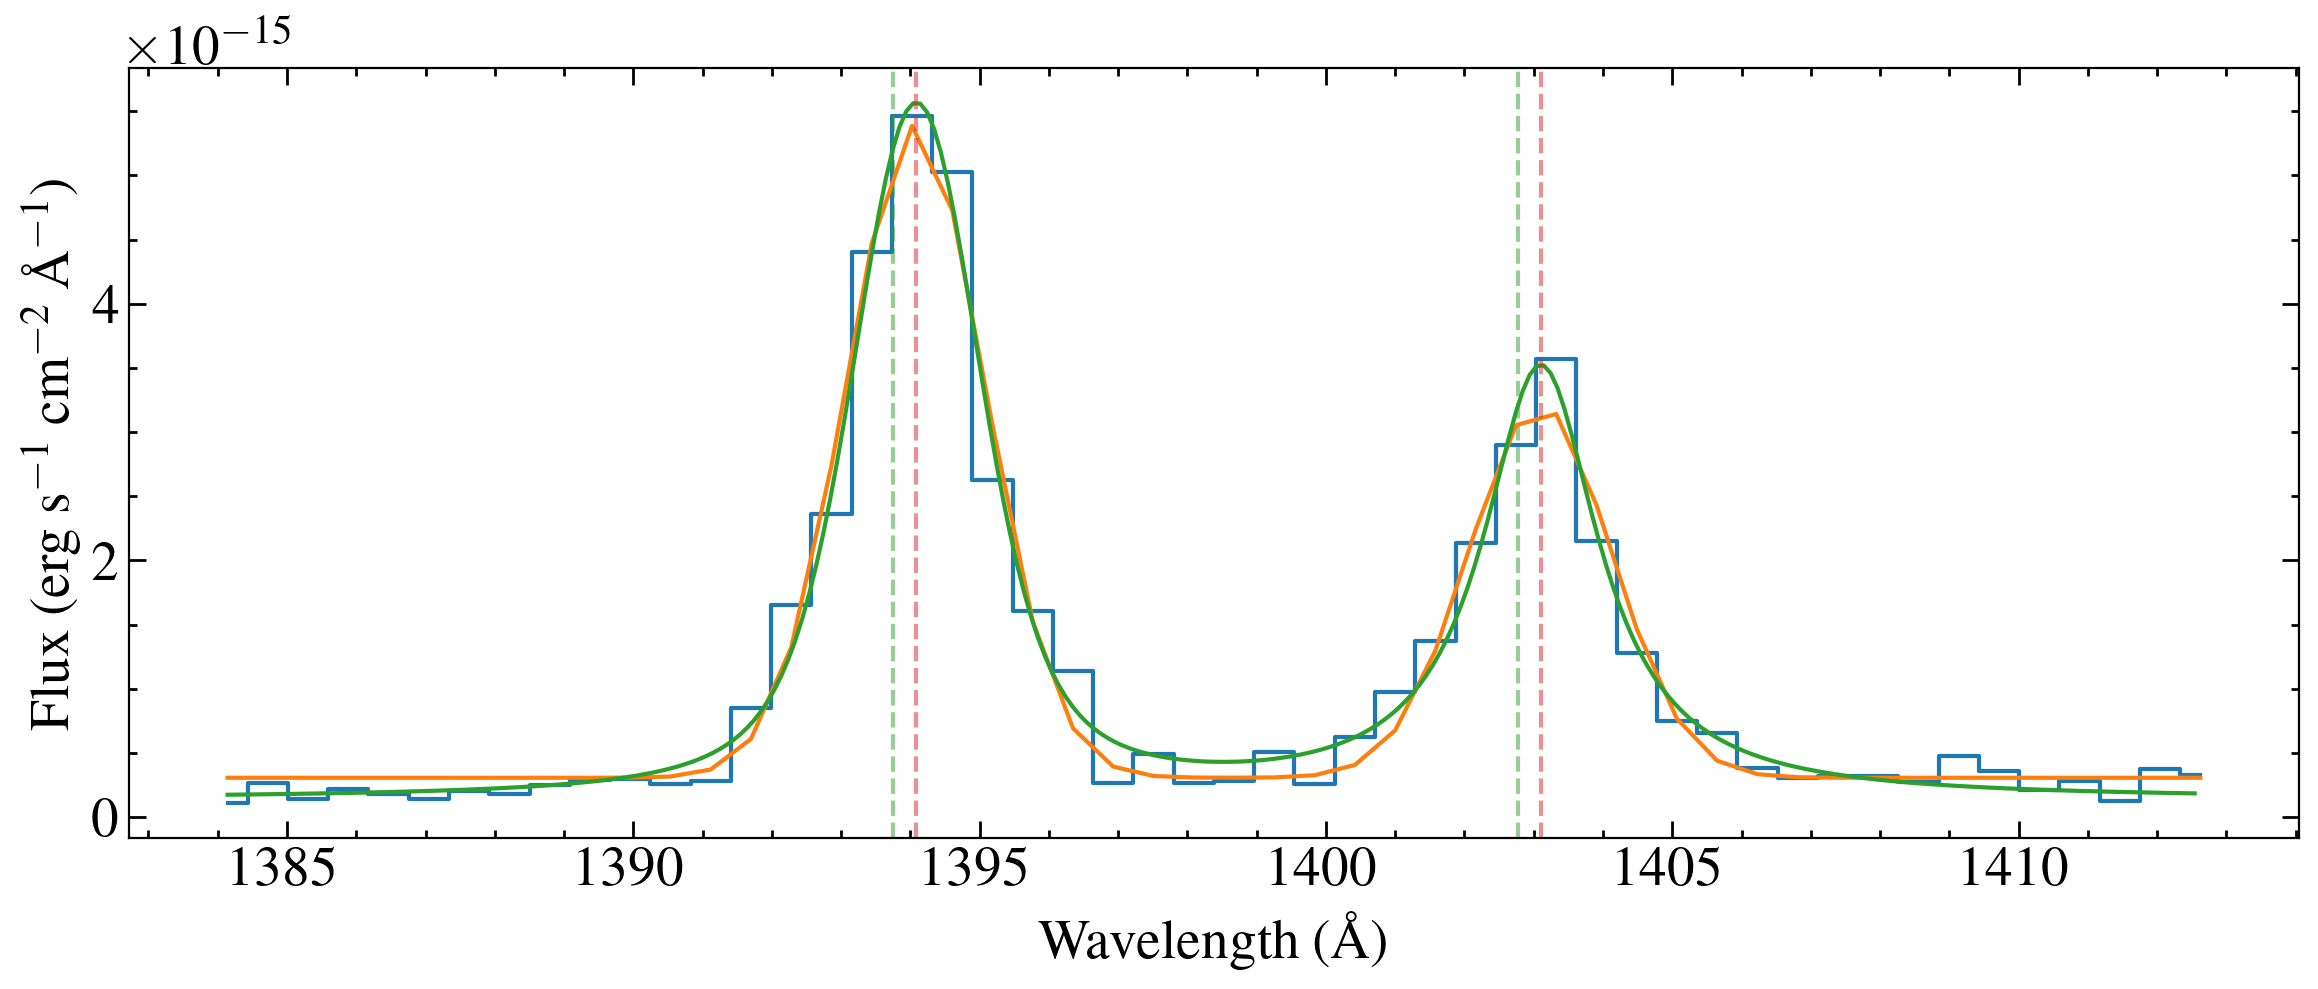

Gaussian
[  60.35142581 -436.76973257] km / s
Voigt
60.453199881161865 km / s 4.654544272208273


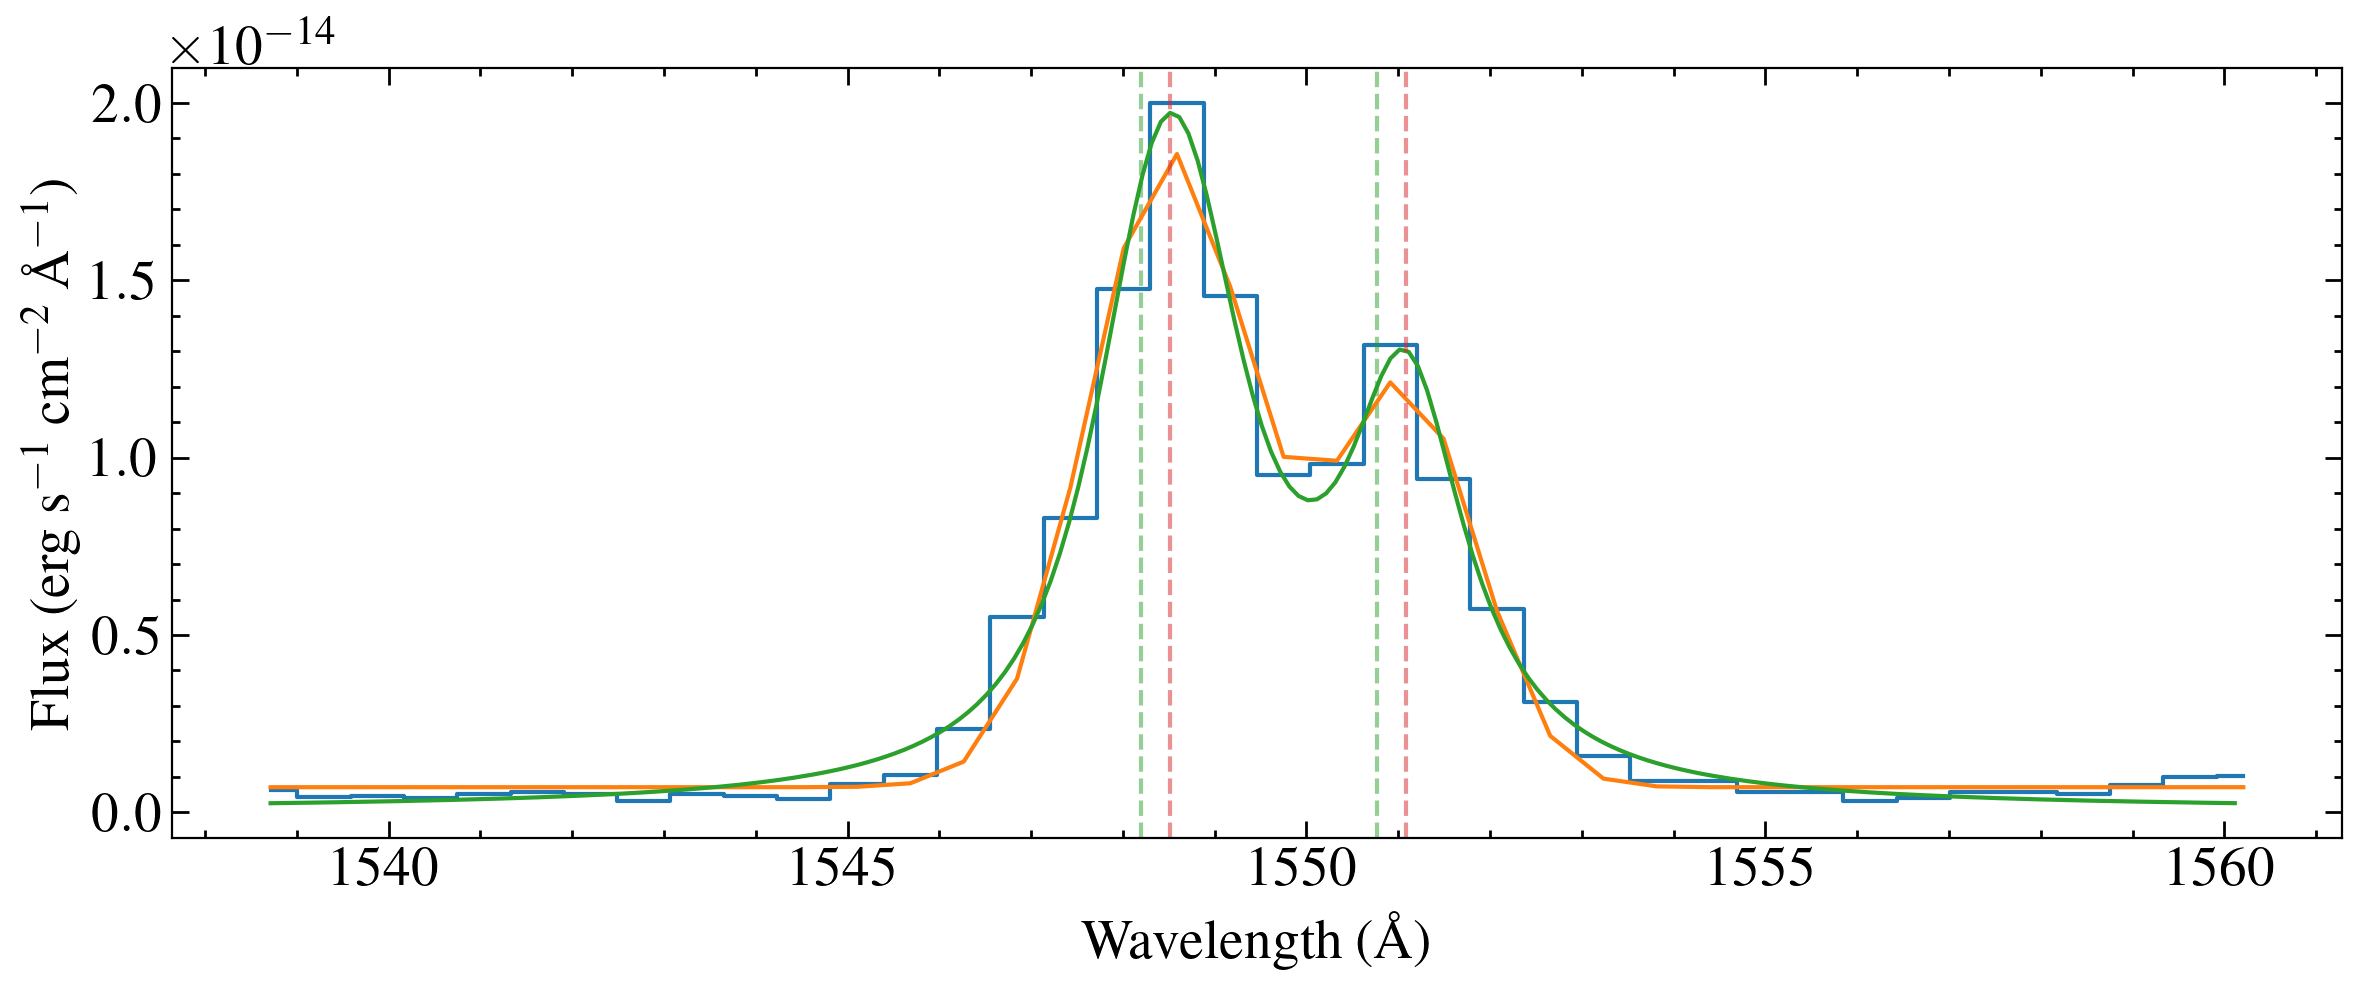

Gaussian
[46.03035248] km / s
Voigt
49.609023458843765 km / s 4.0940016214934225


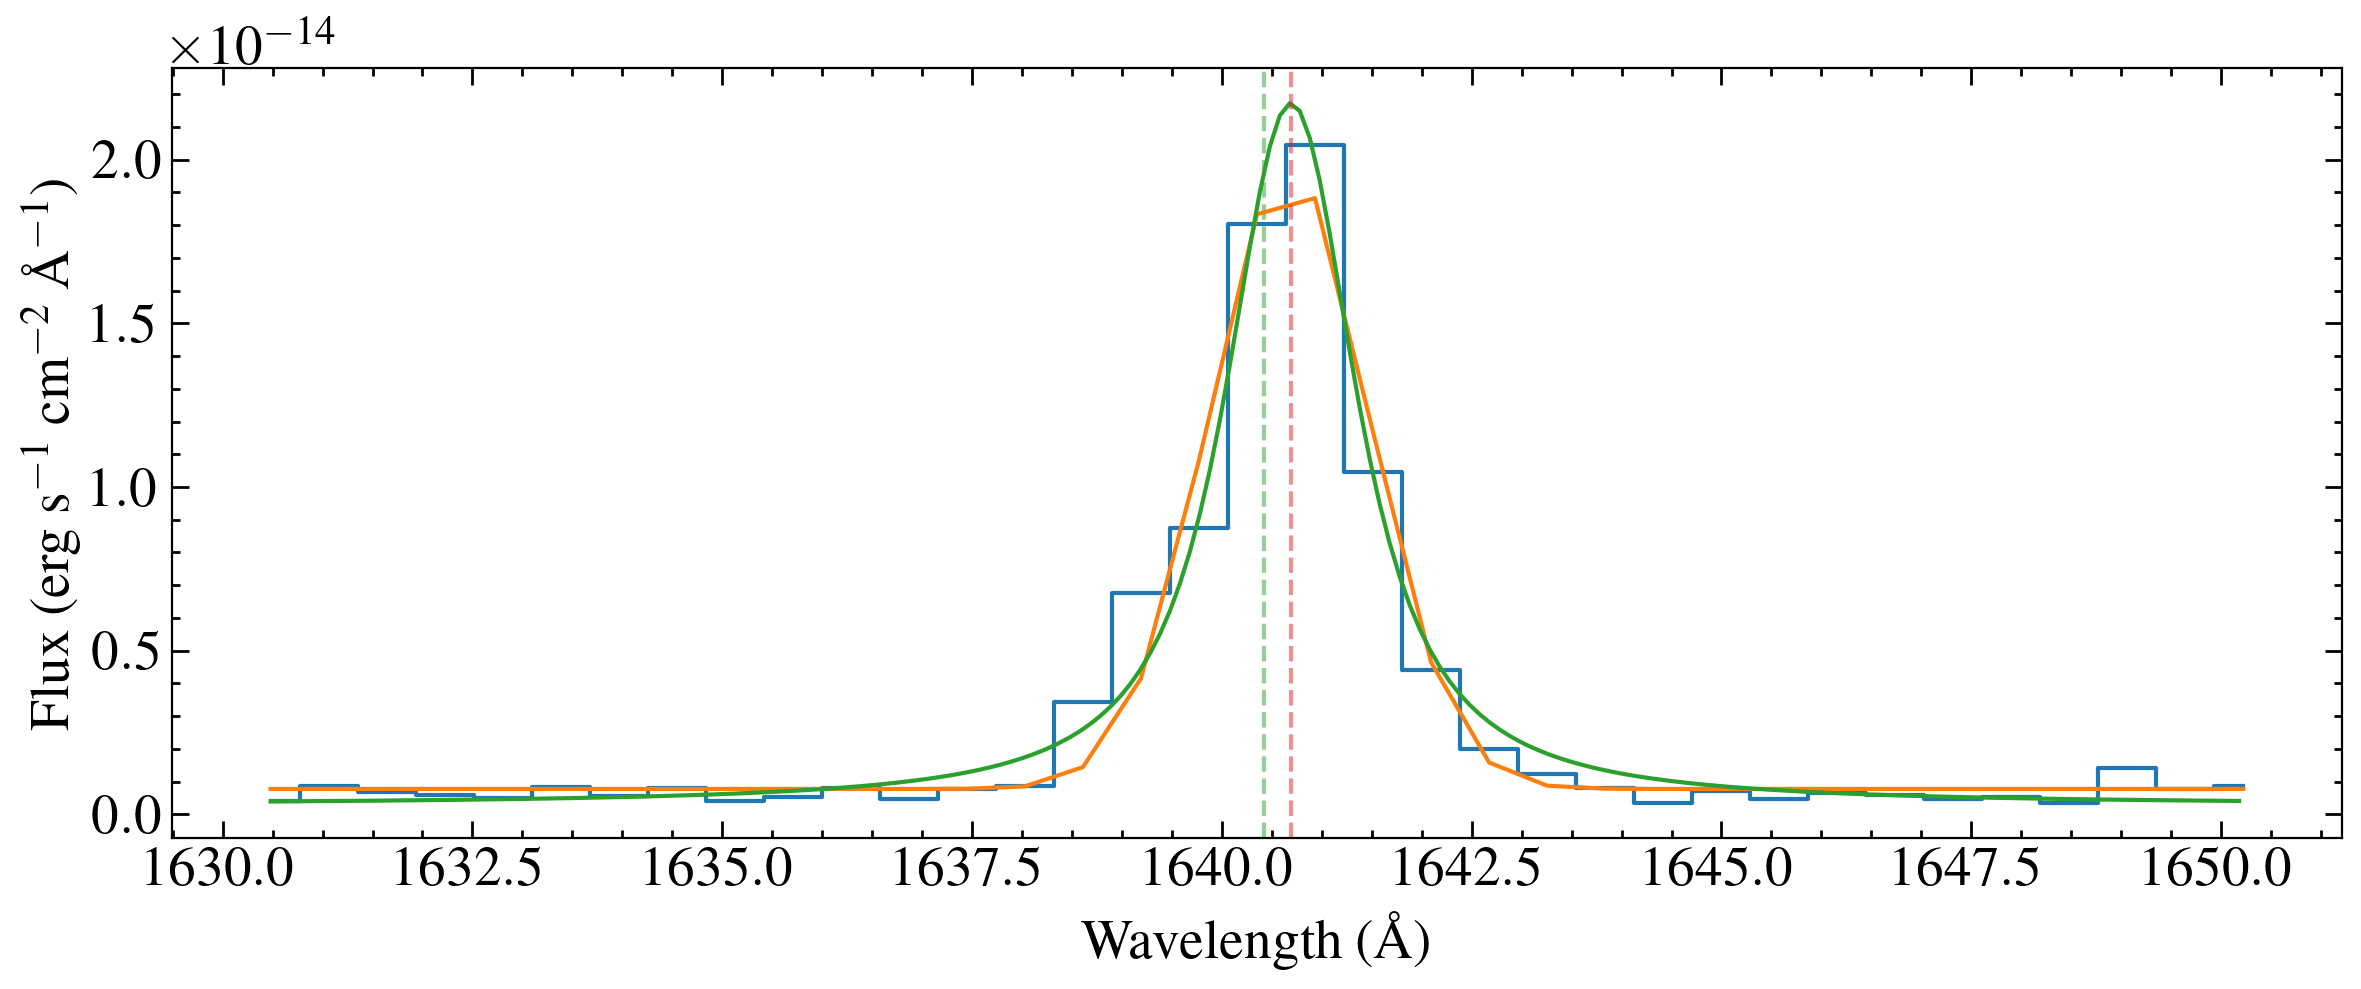

69.53766807139208 71.16874695098957 13.100410425992816


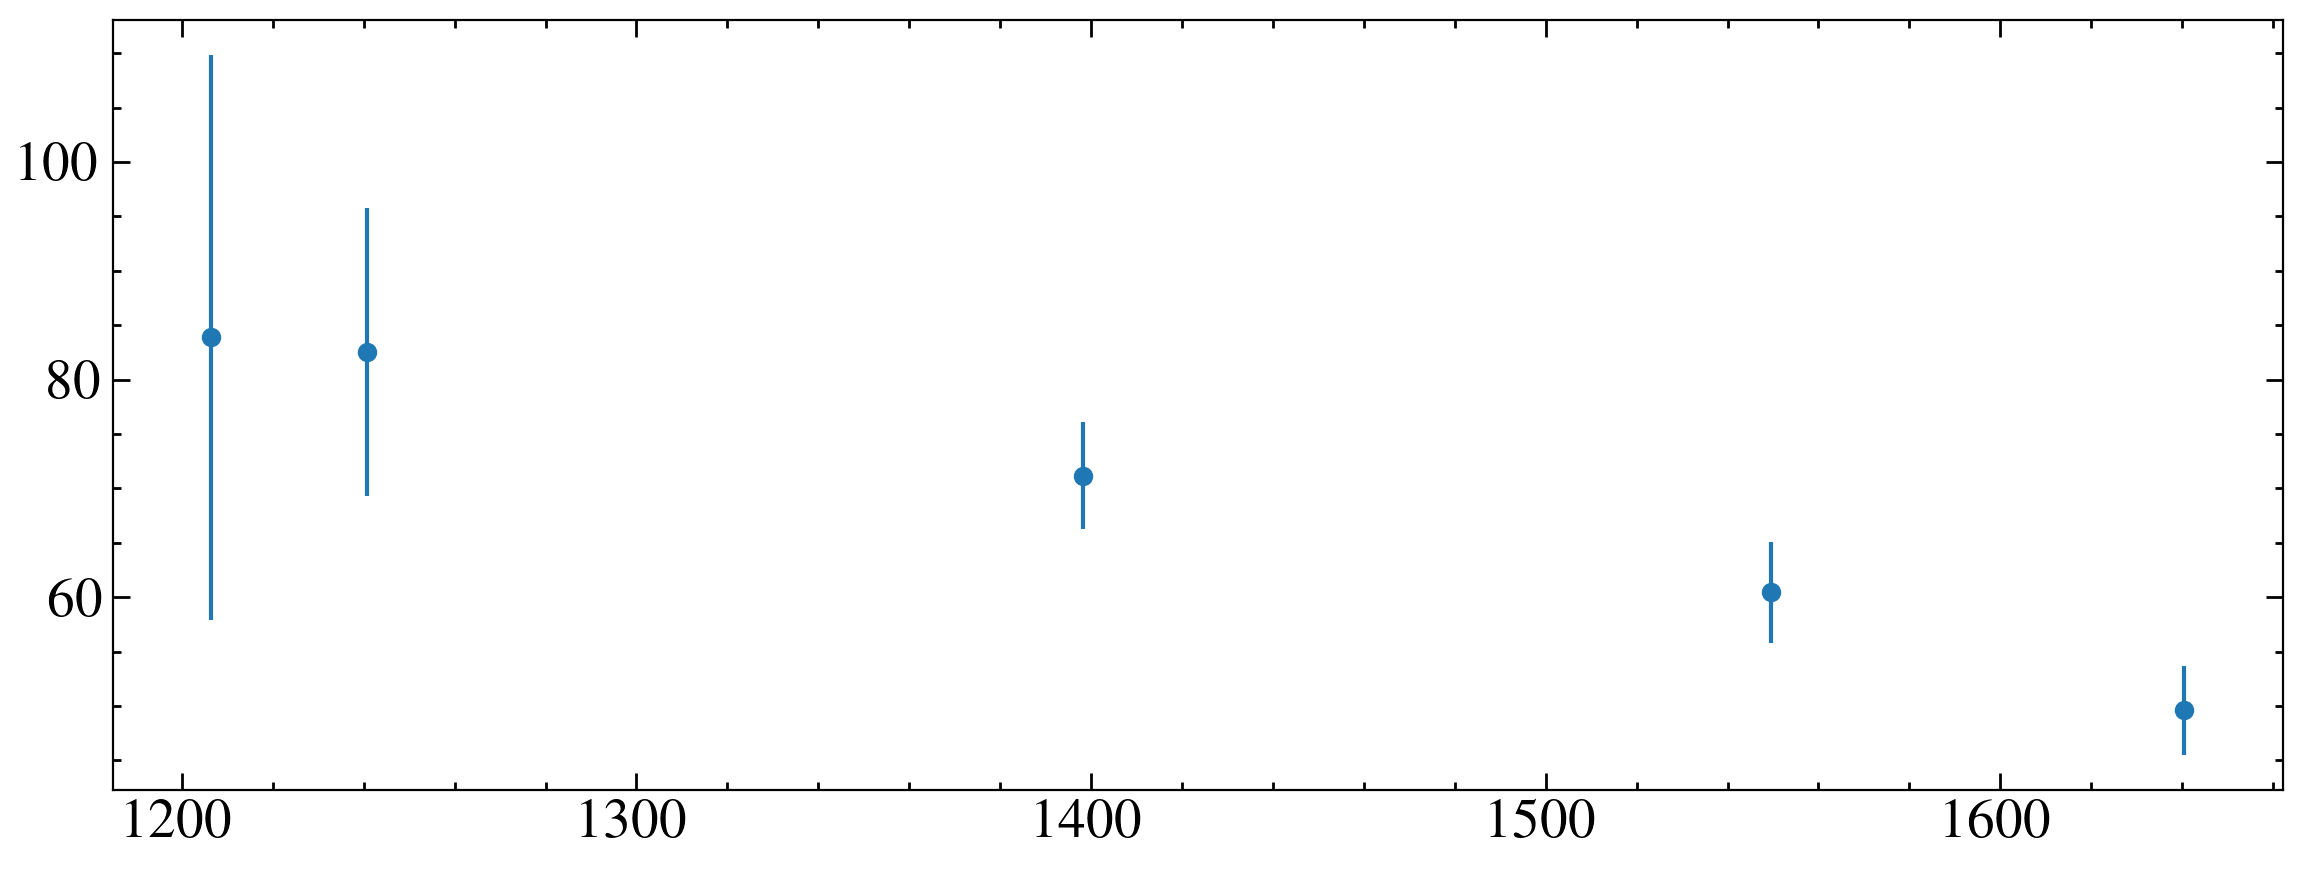

Gaussian
[138.01956078] km / s
Voigt
138.01981007662934 km / s 26.434670489640276


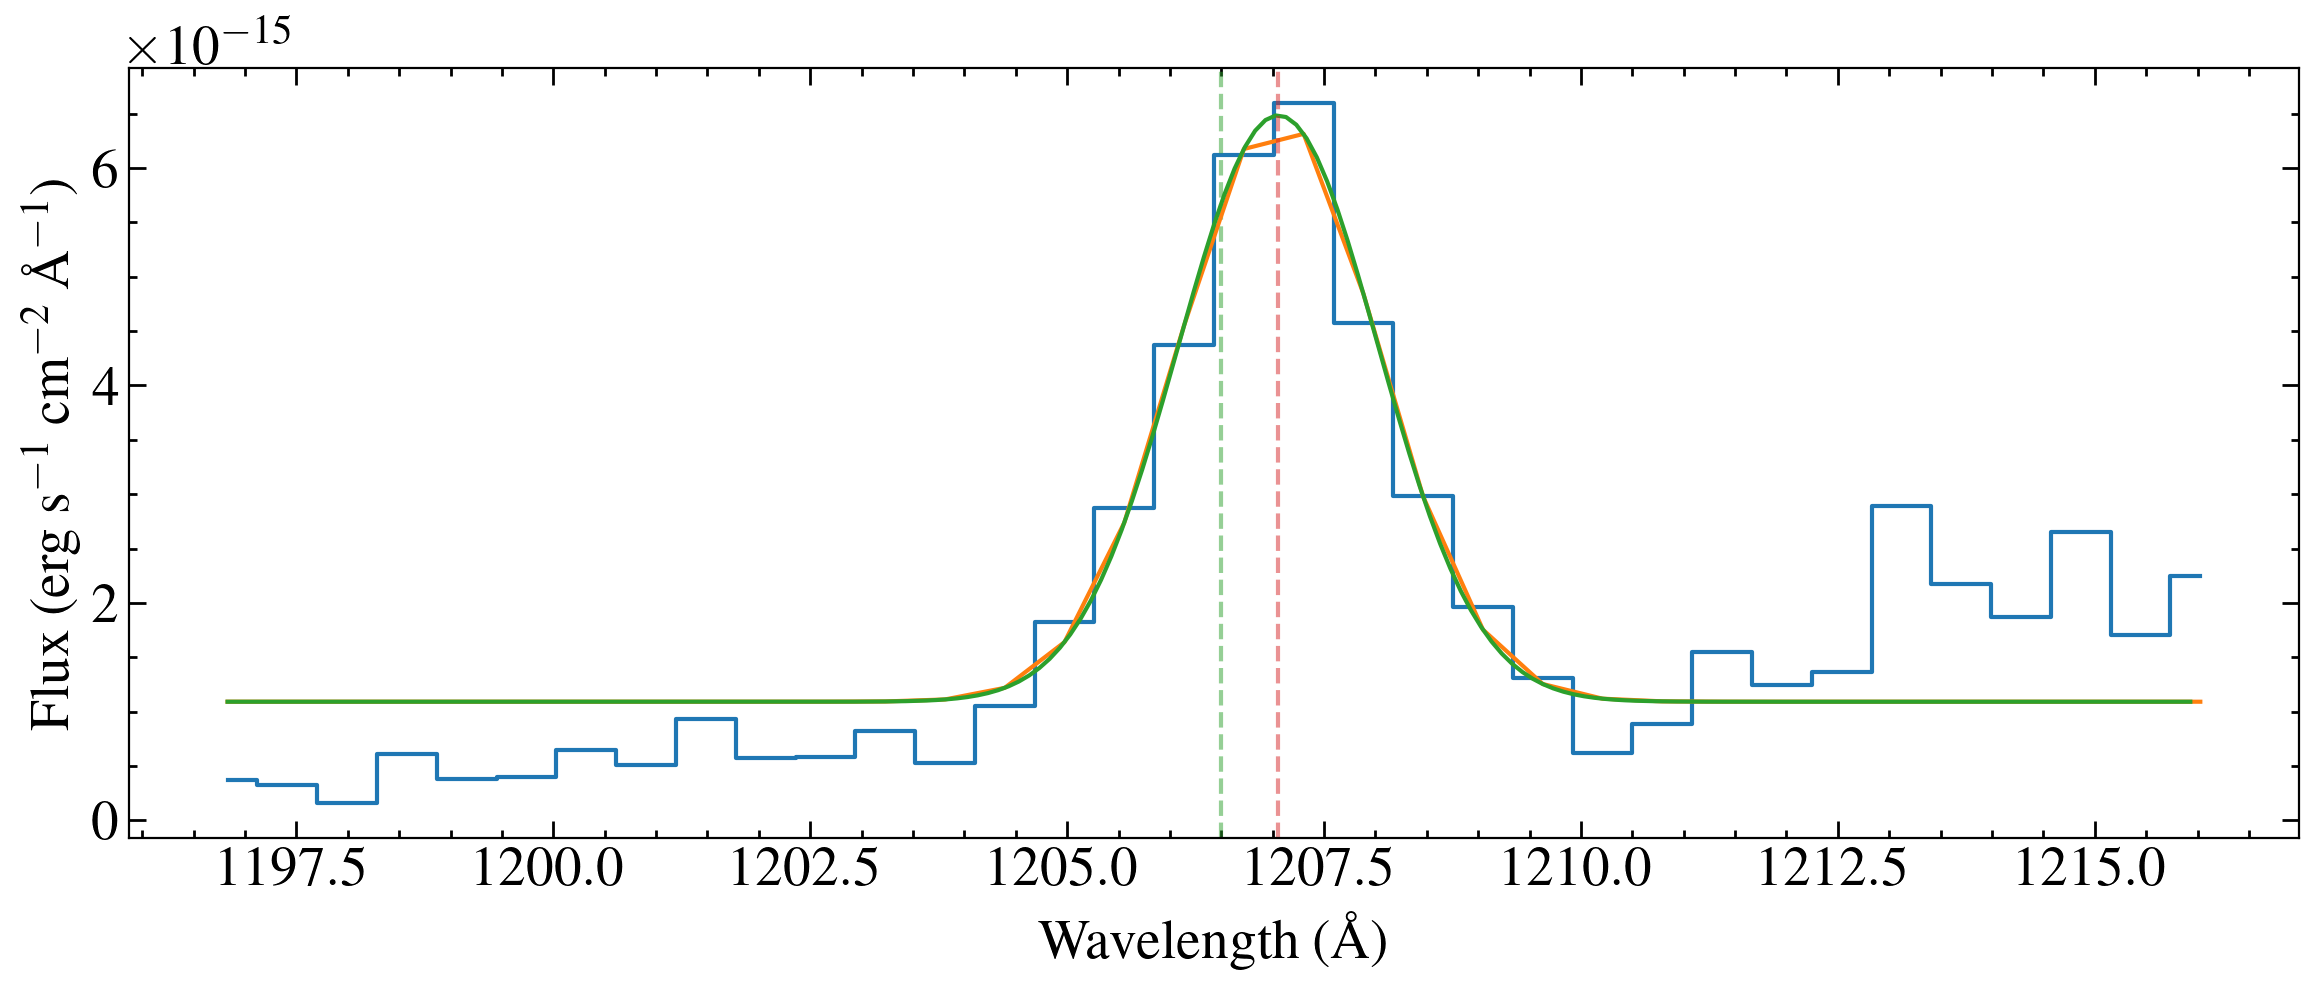

Gaussian
[  79.11284796 -881.9304595 ] km / s
Voigt
76.50350271613023 km / s 15.592951239262653


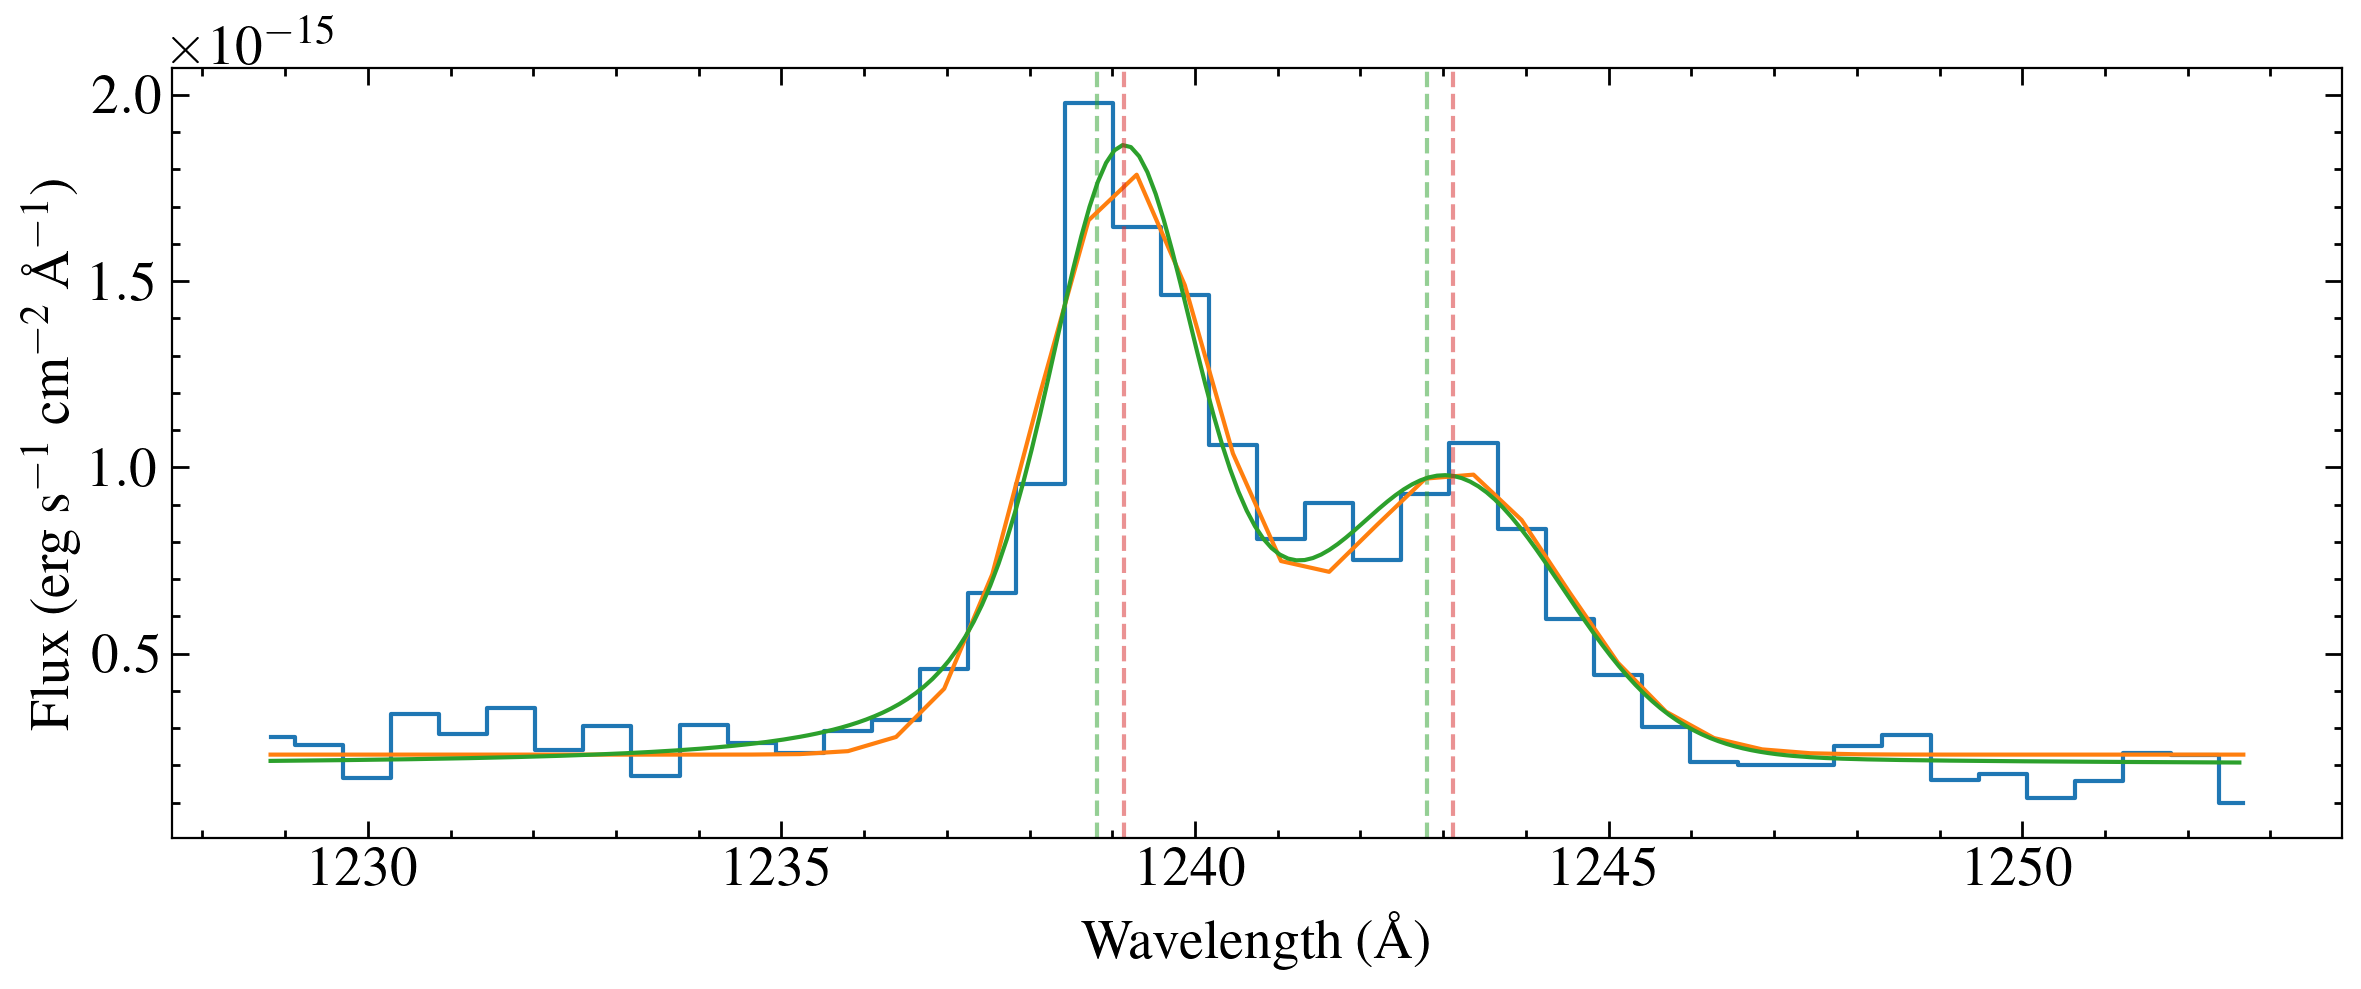

Gaussian
[  143.17321386 -1784.38420139] km / s
Voigt
147.12894498914142 km / s 5.489675666541714


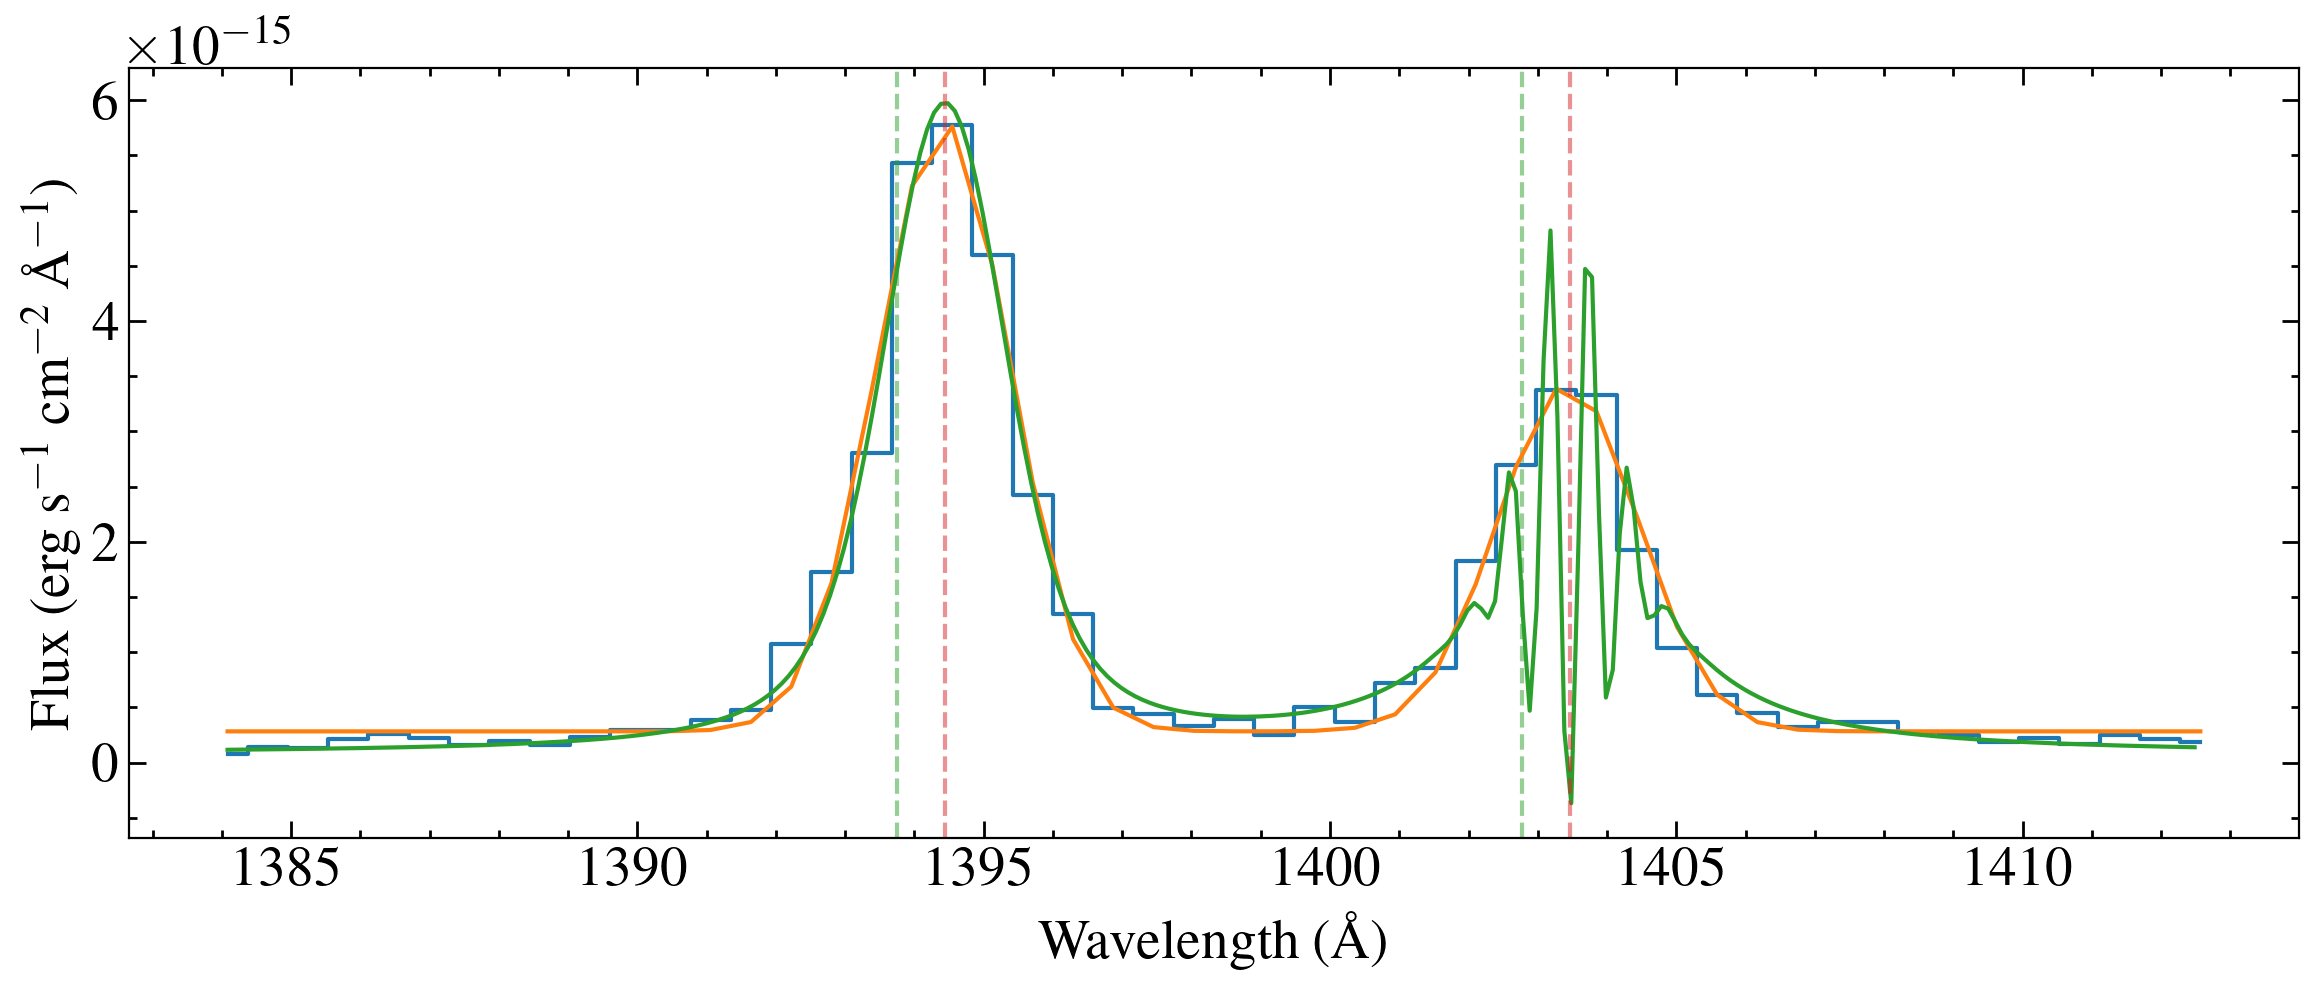

Gaussian
[ 115.63816486 -381.57465253] km / s
Voigt
117.05659332060733 km / s 4.438998847155297


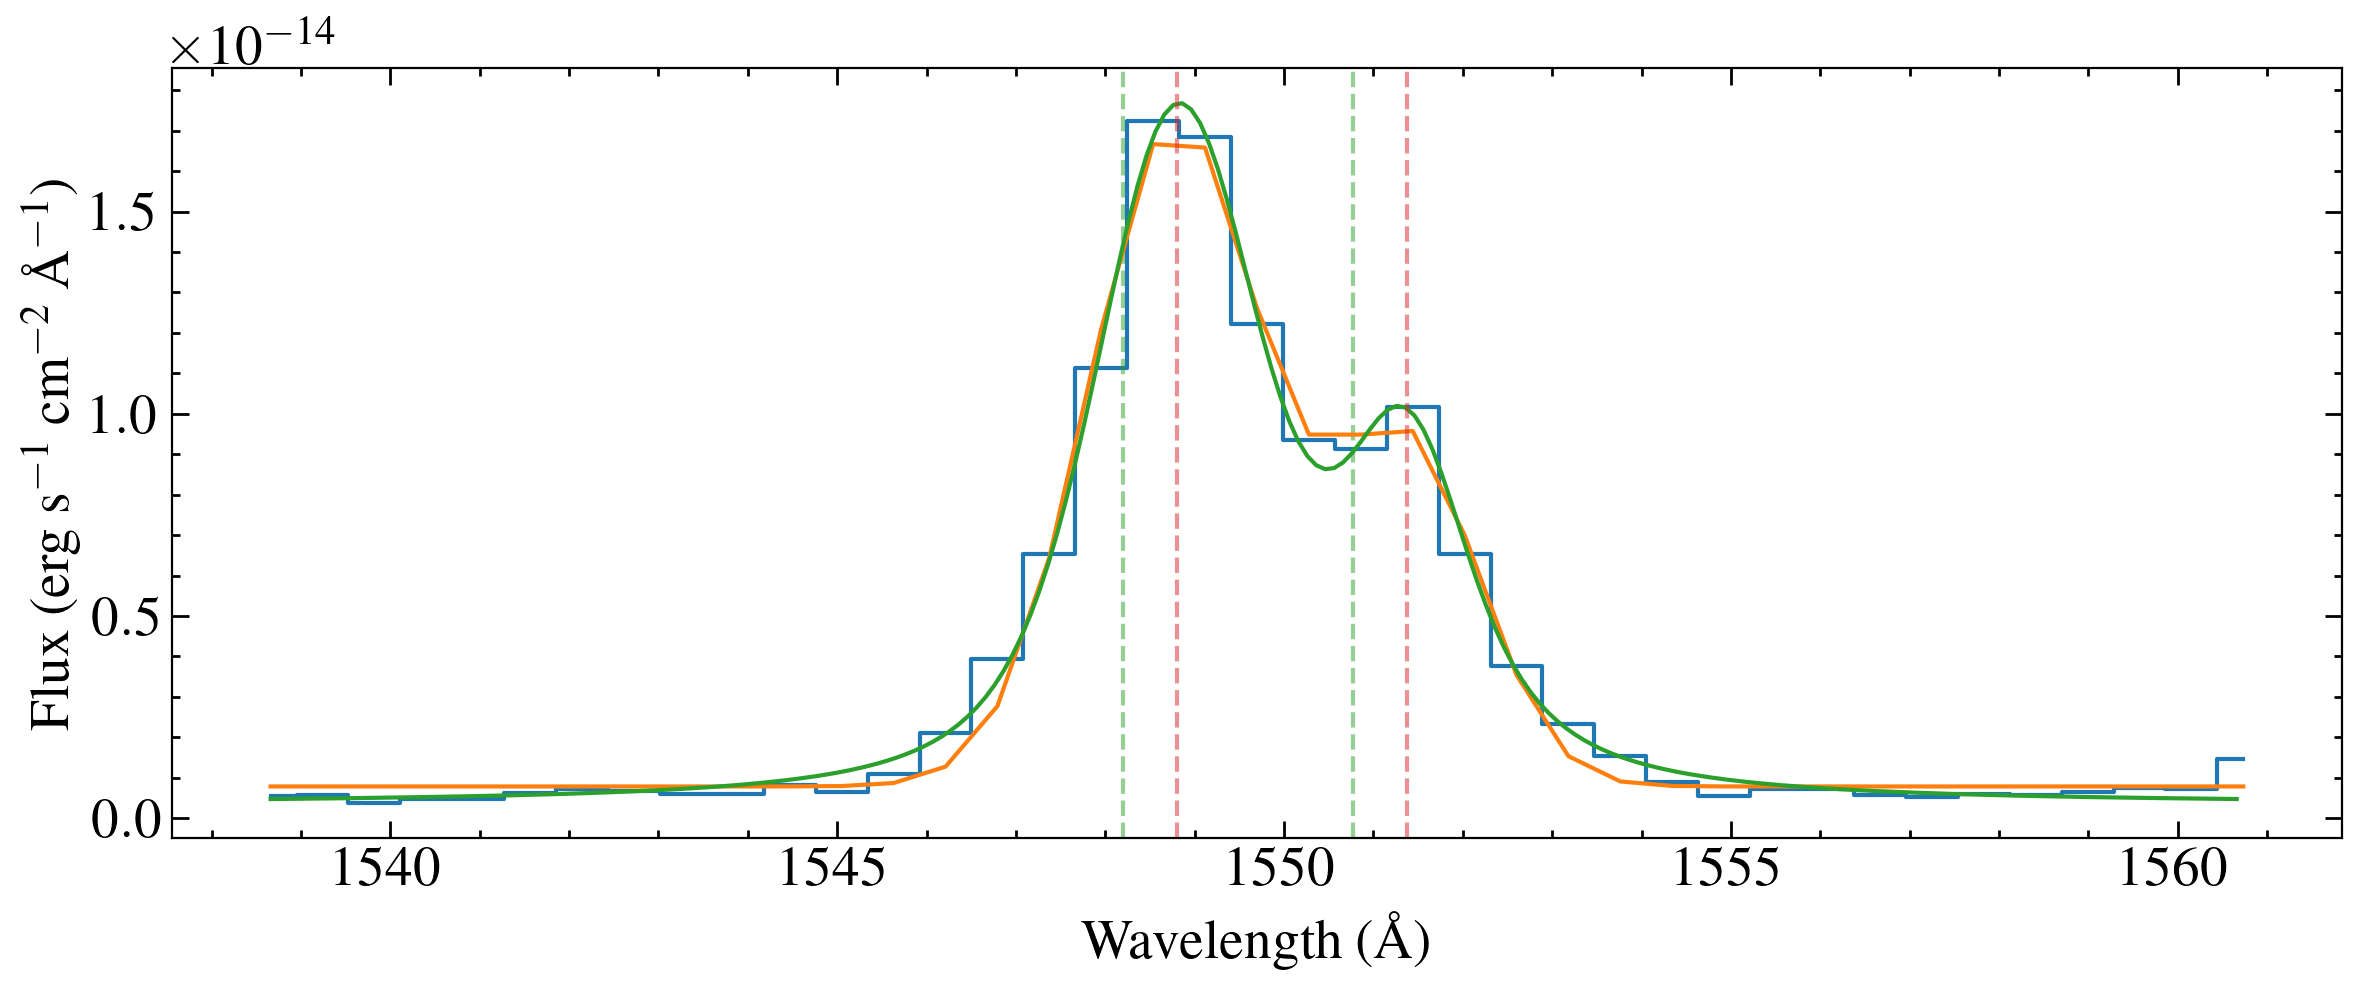

Gaussian
[95.58256556] km / s
Voigt
95.70847680076568 km / s 3.8770504044789504


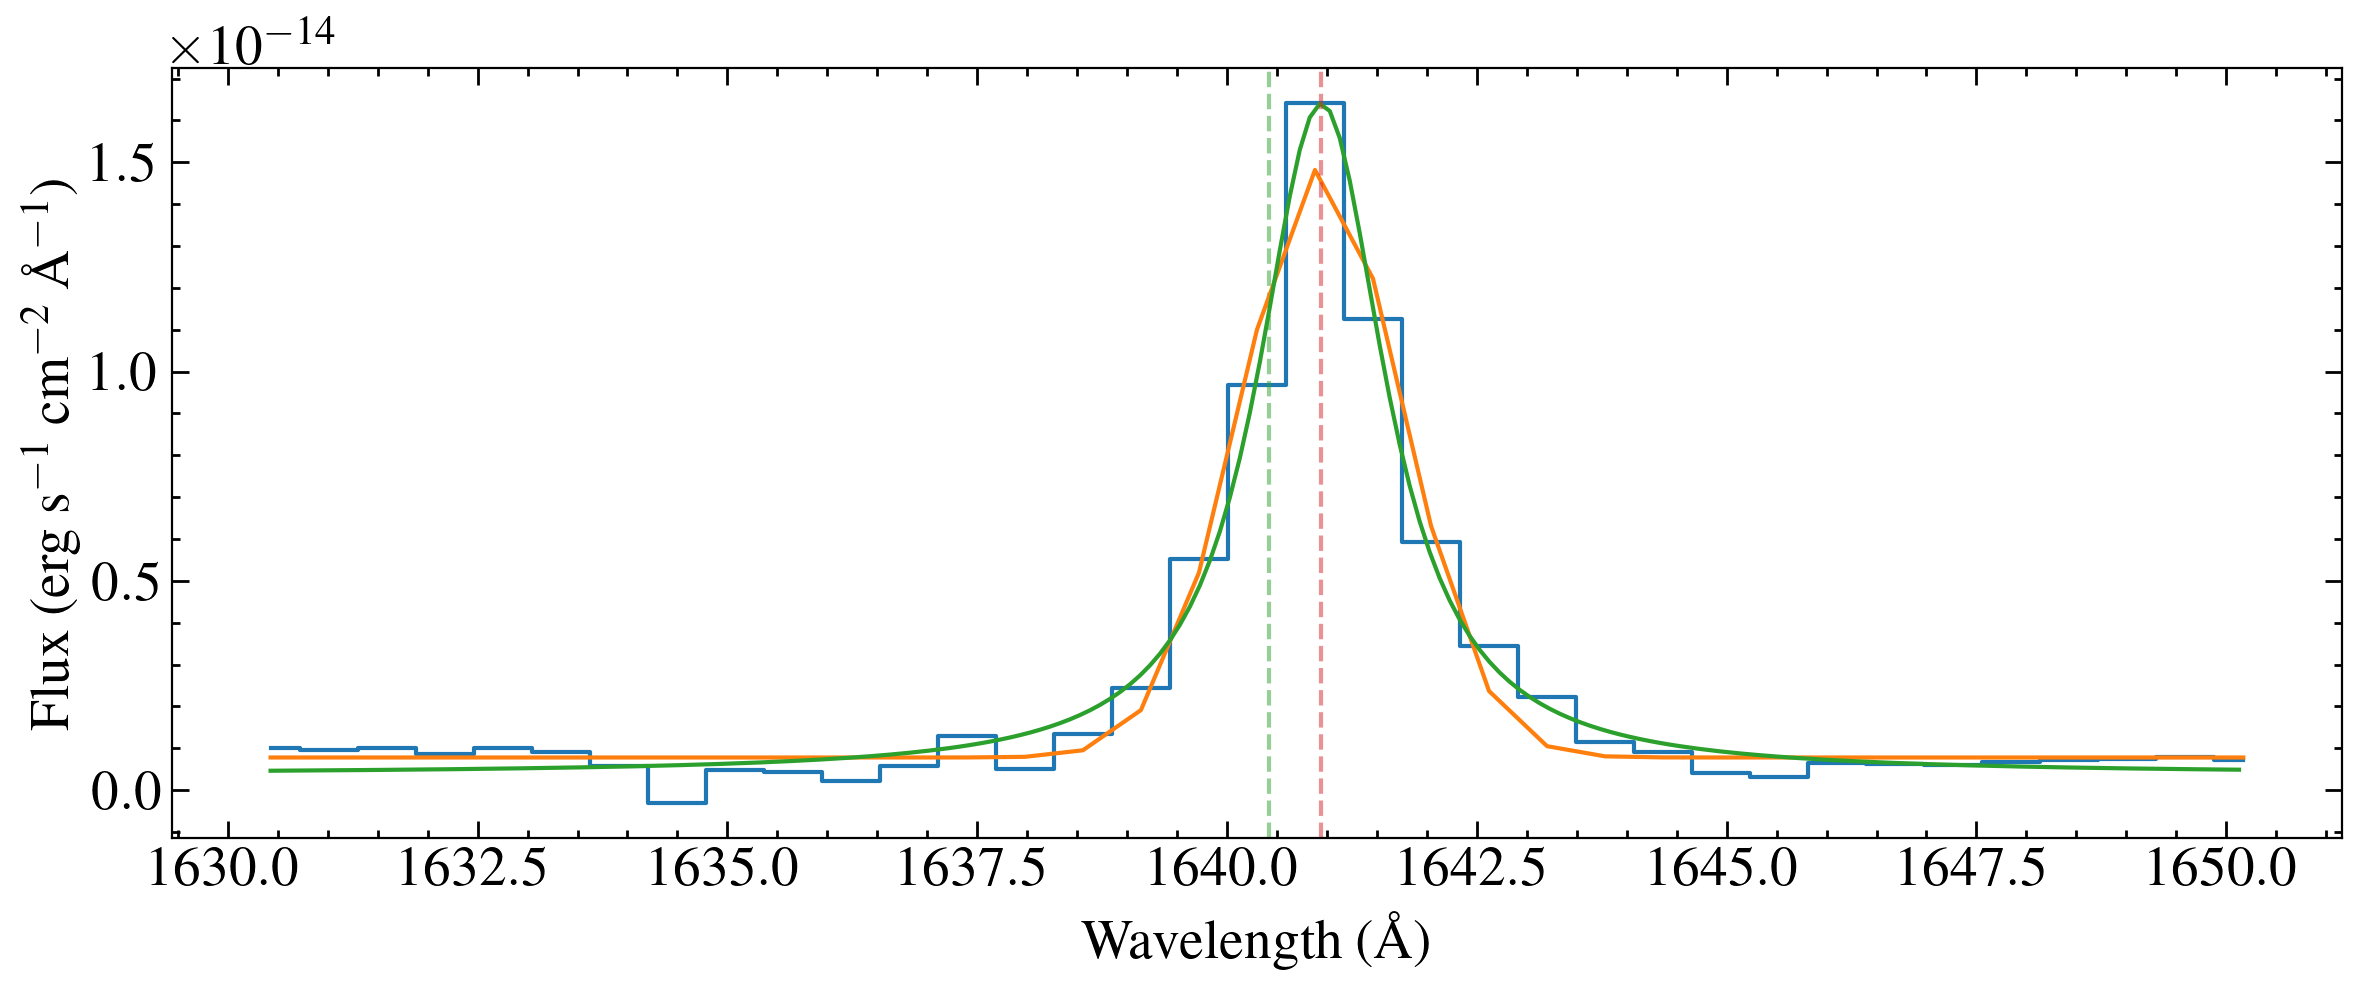

114.8834655806548 117.05659332060733 26.15525036119844


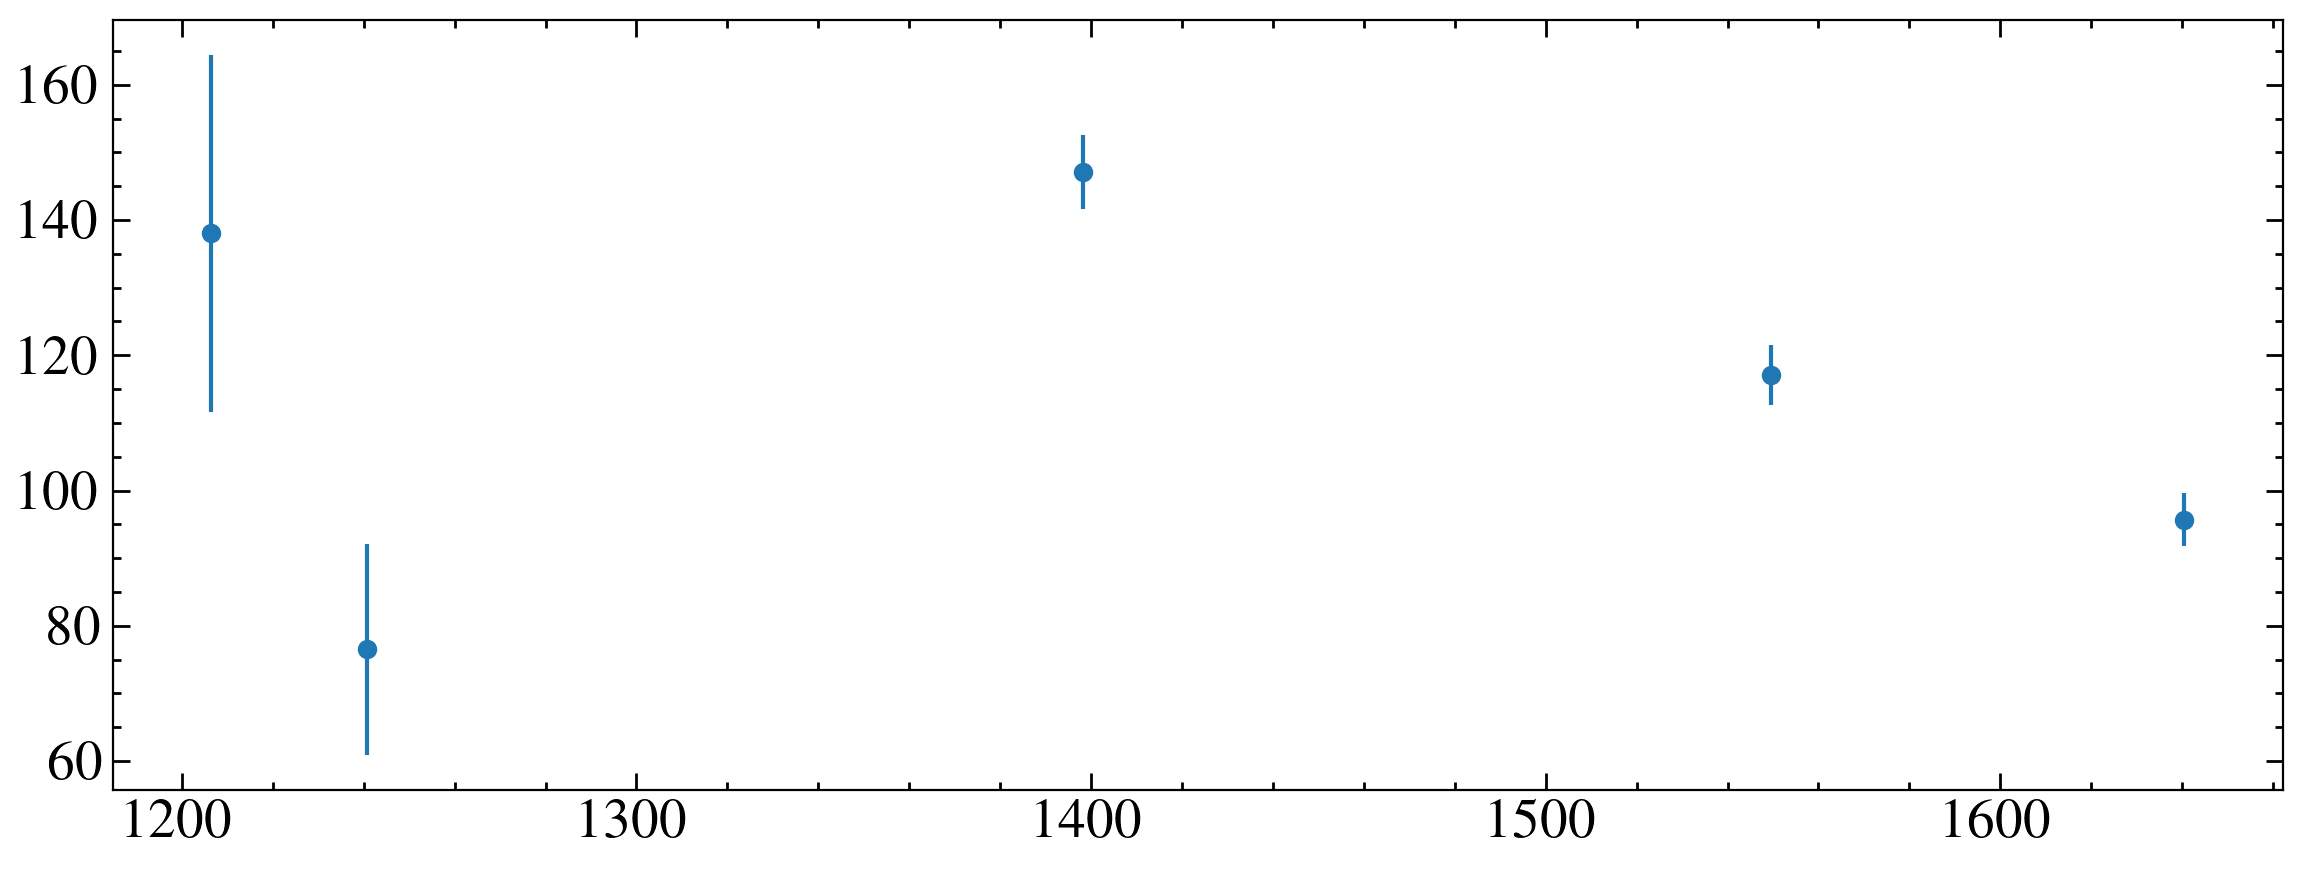

Gaussian
[122.51191284] km / s
Voigt
122.51237911191592 km / s 35.482793710588446


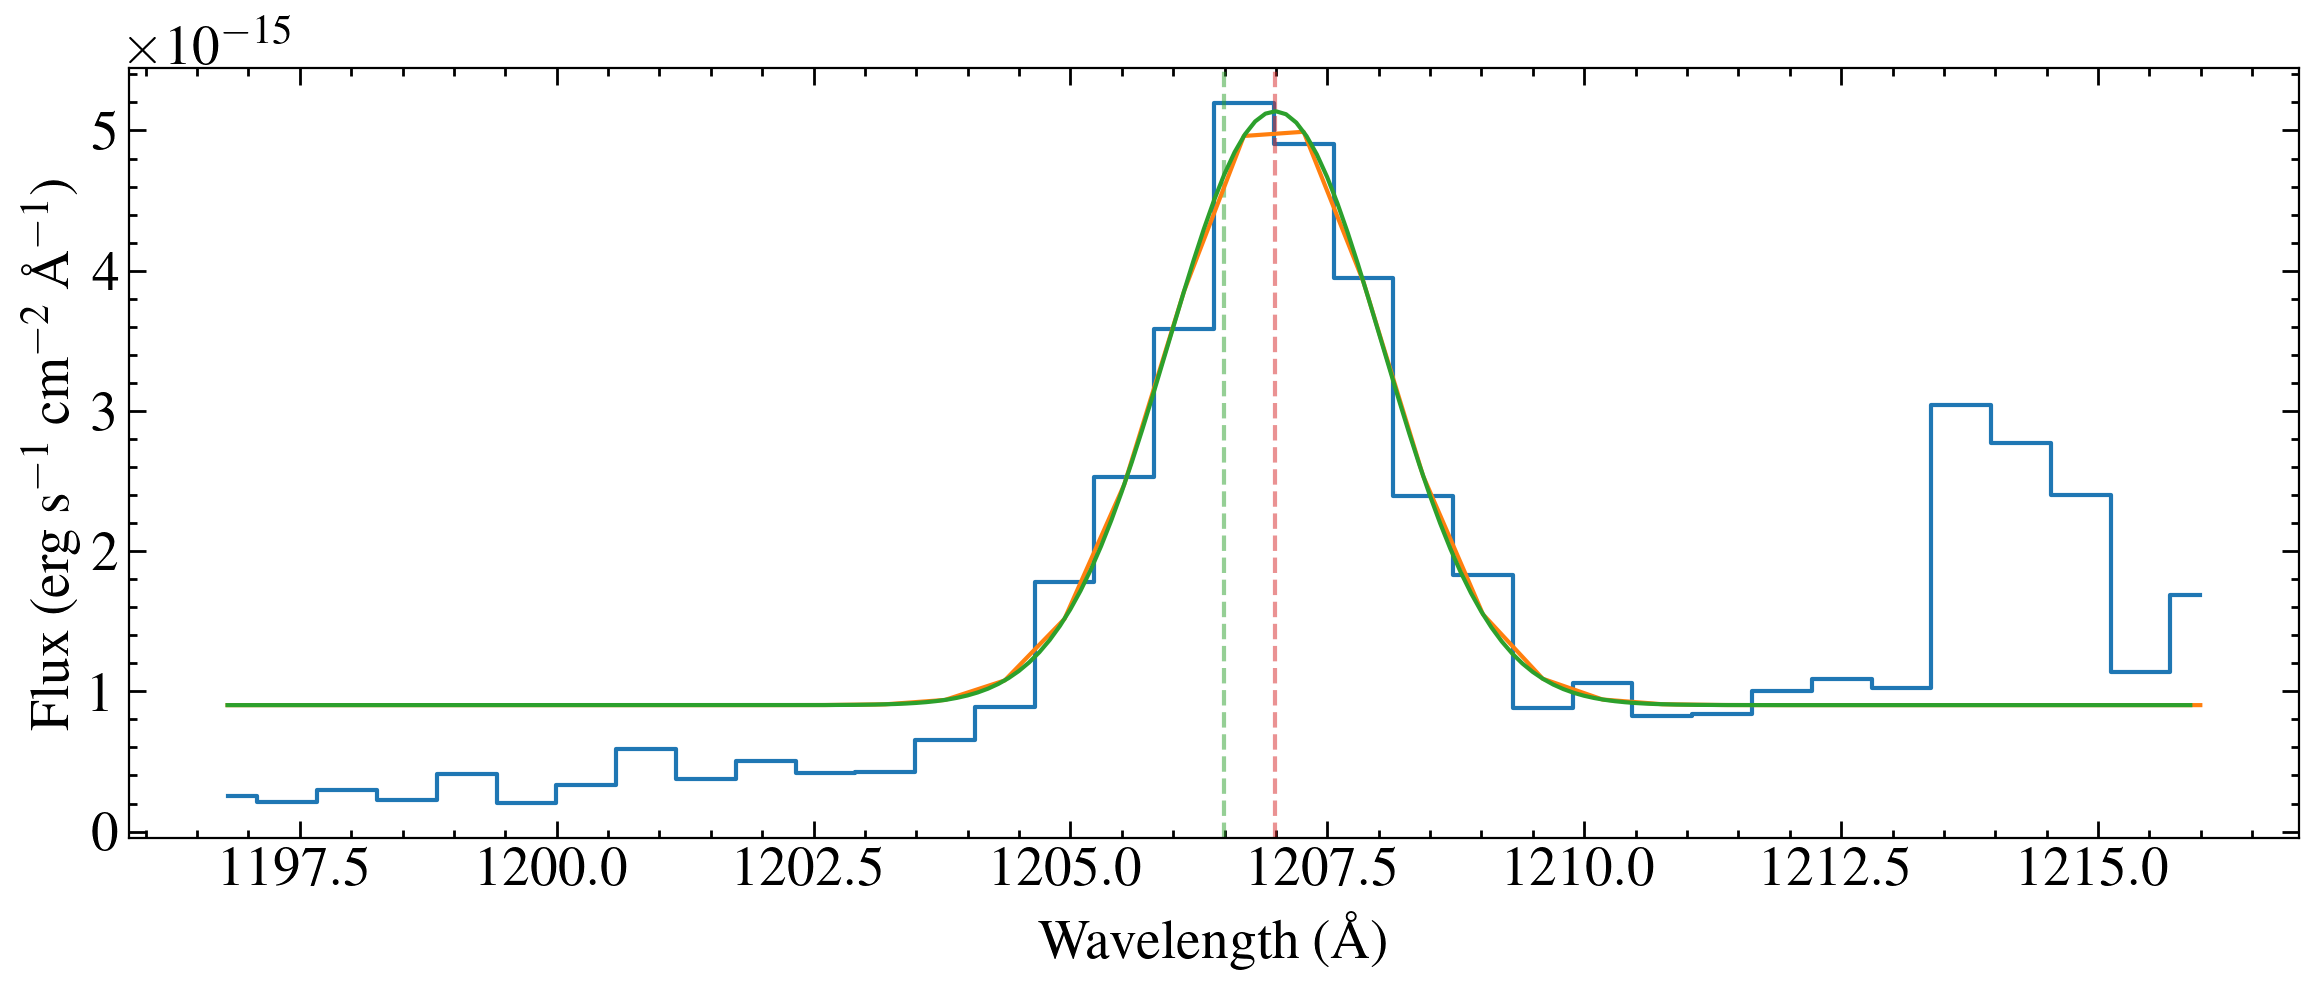

Gaussian
[ 116.36814713 -844.79455796] km / s
Voigt
116.37615417467214 km / s 17.67911482891428


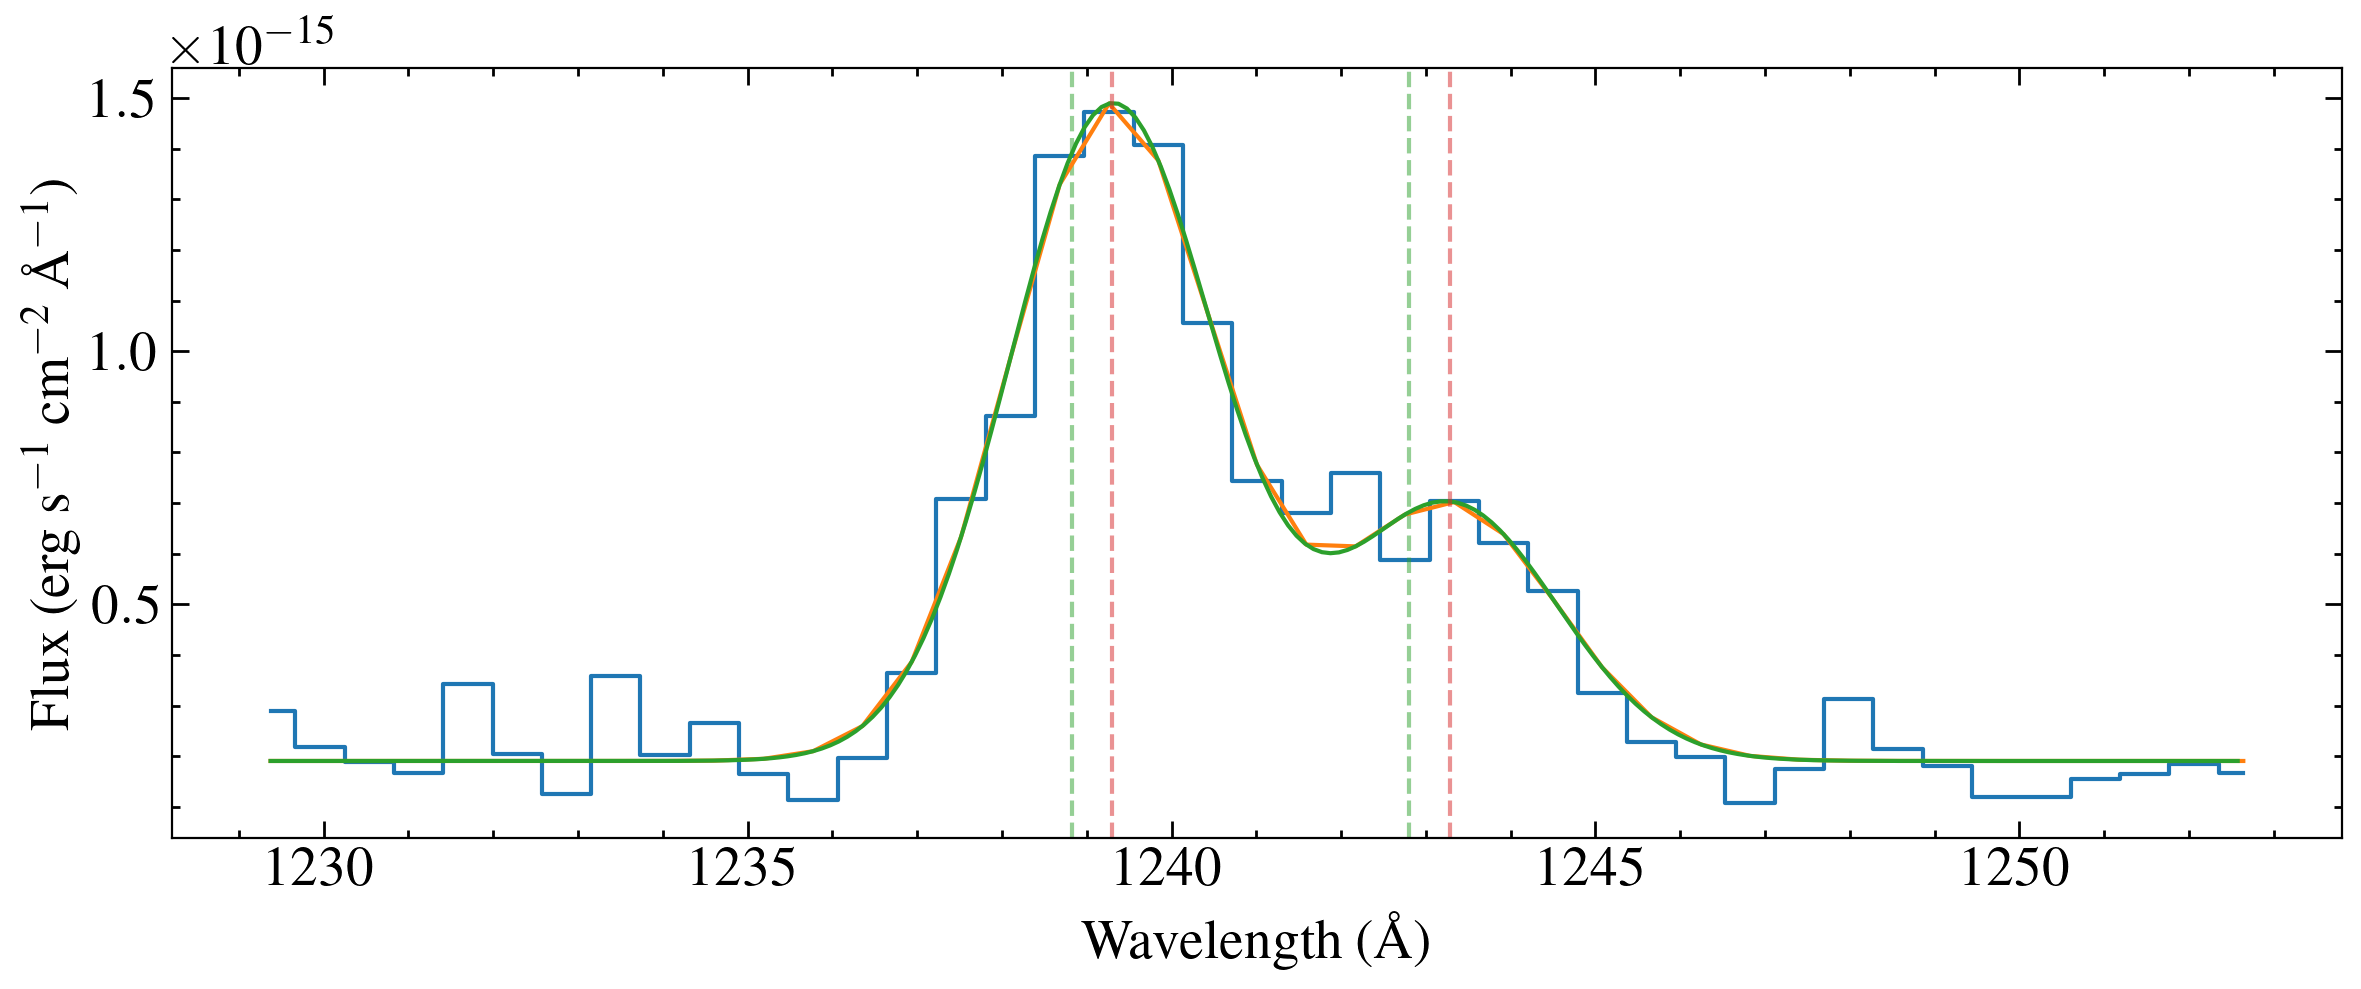

Gaussian
[  128.99578725 -1798.47051578] km / s
Voigt
128.65960114736924 km / s 4.178510415004276


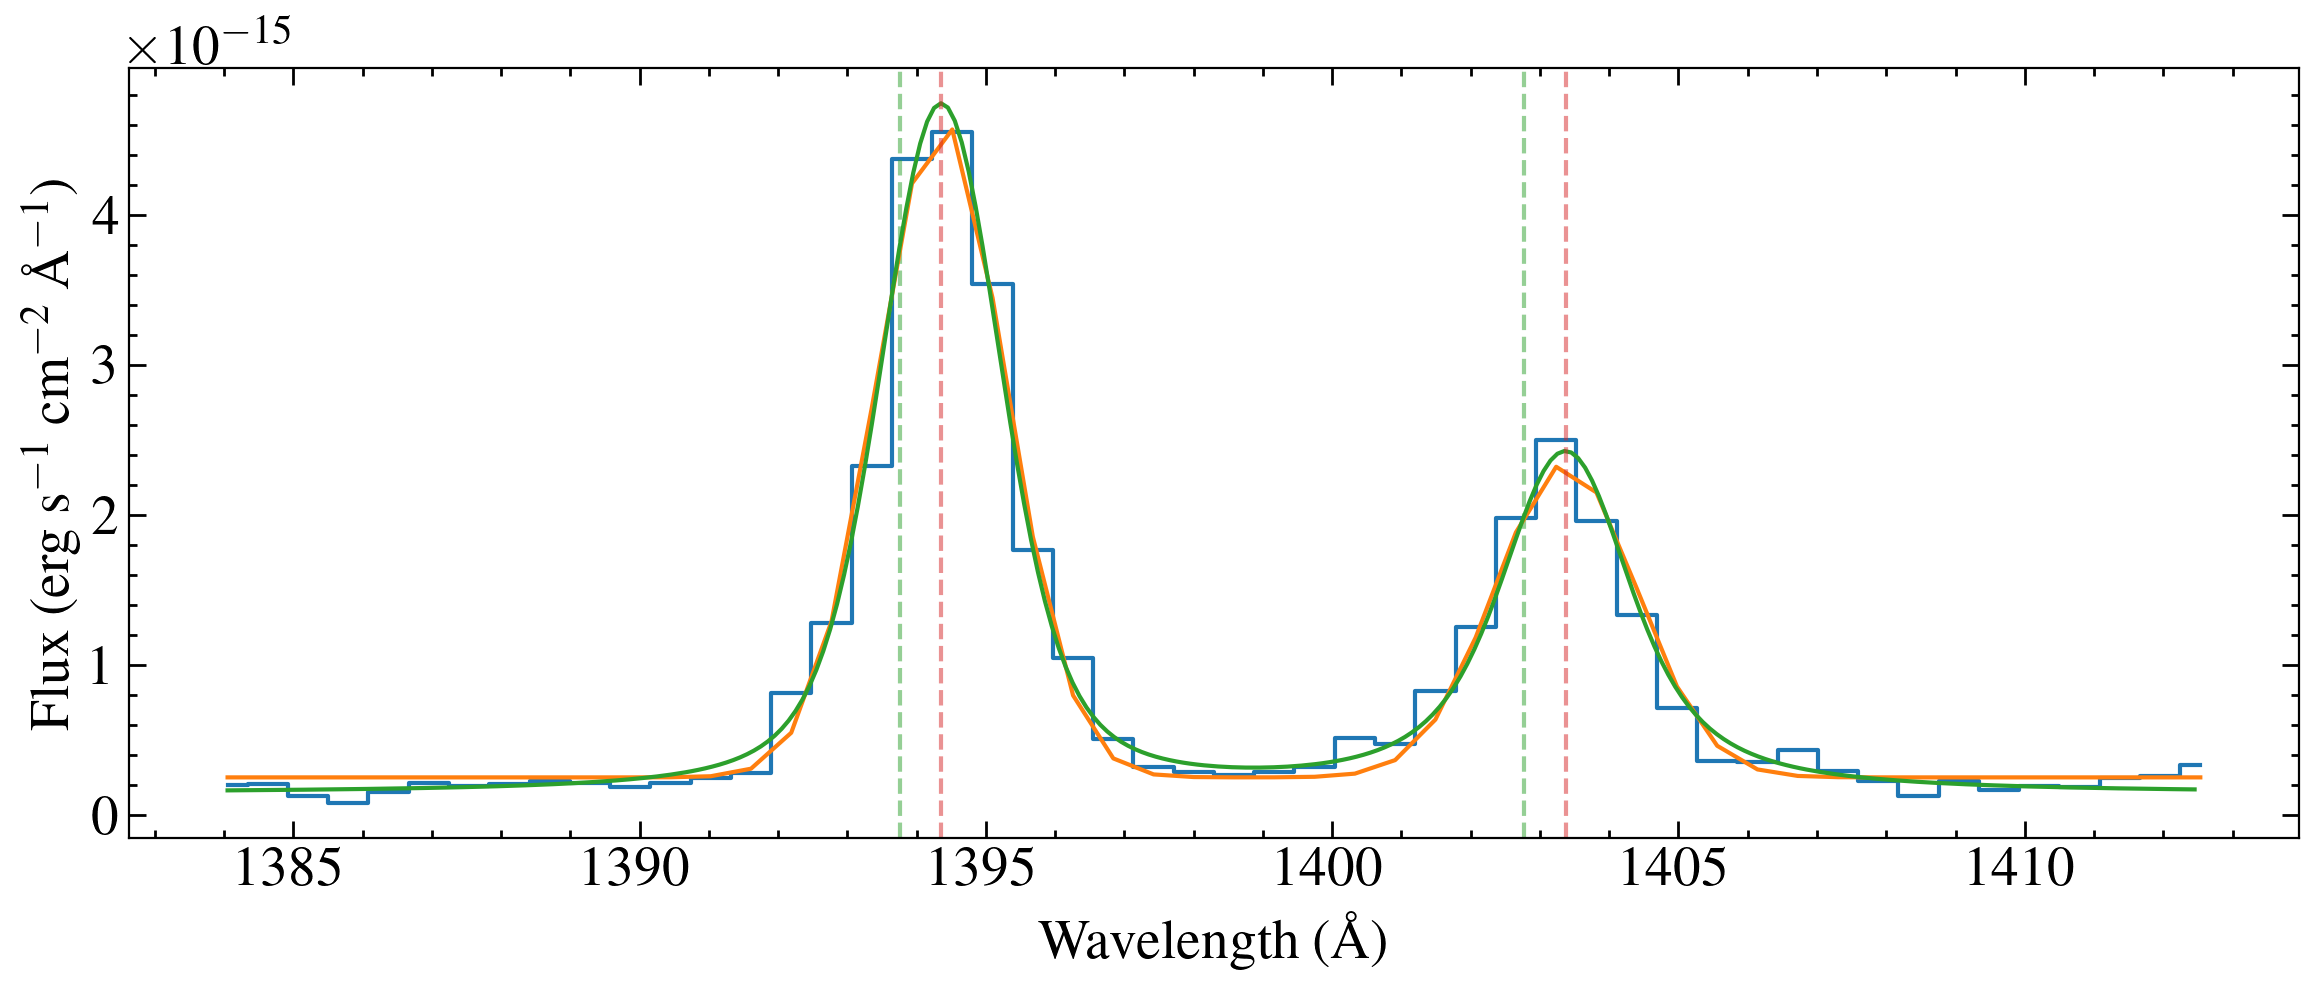

Gaussian
[ 106.29005049 -390.90726881] km / s
Voigt
107.05199493626621 km / s 7.116076769361165


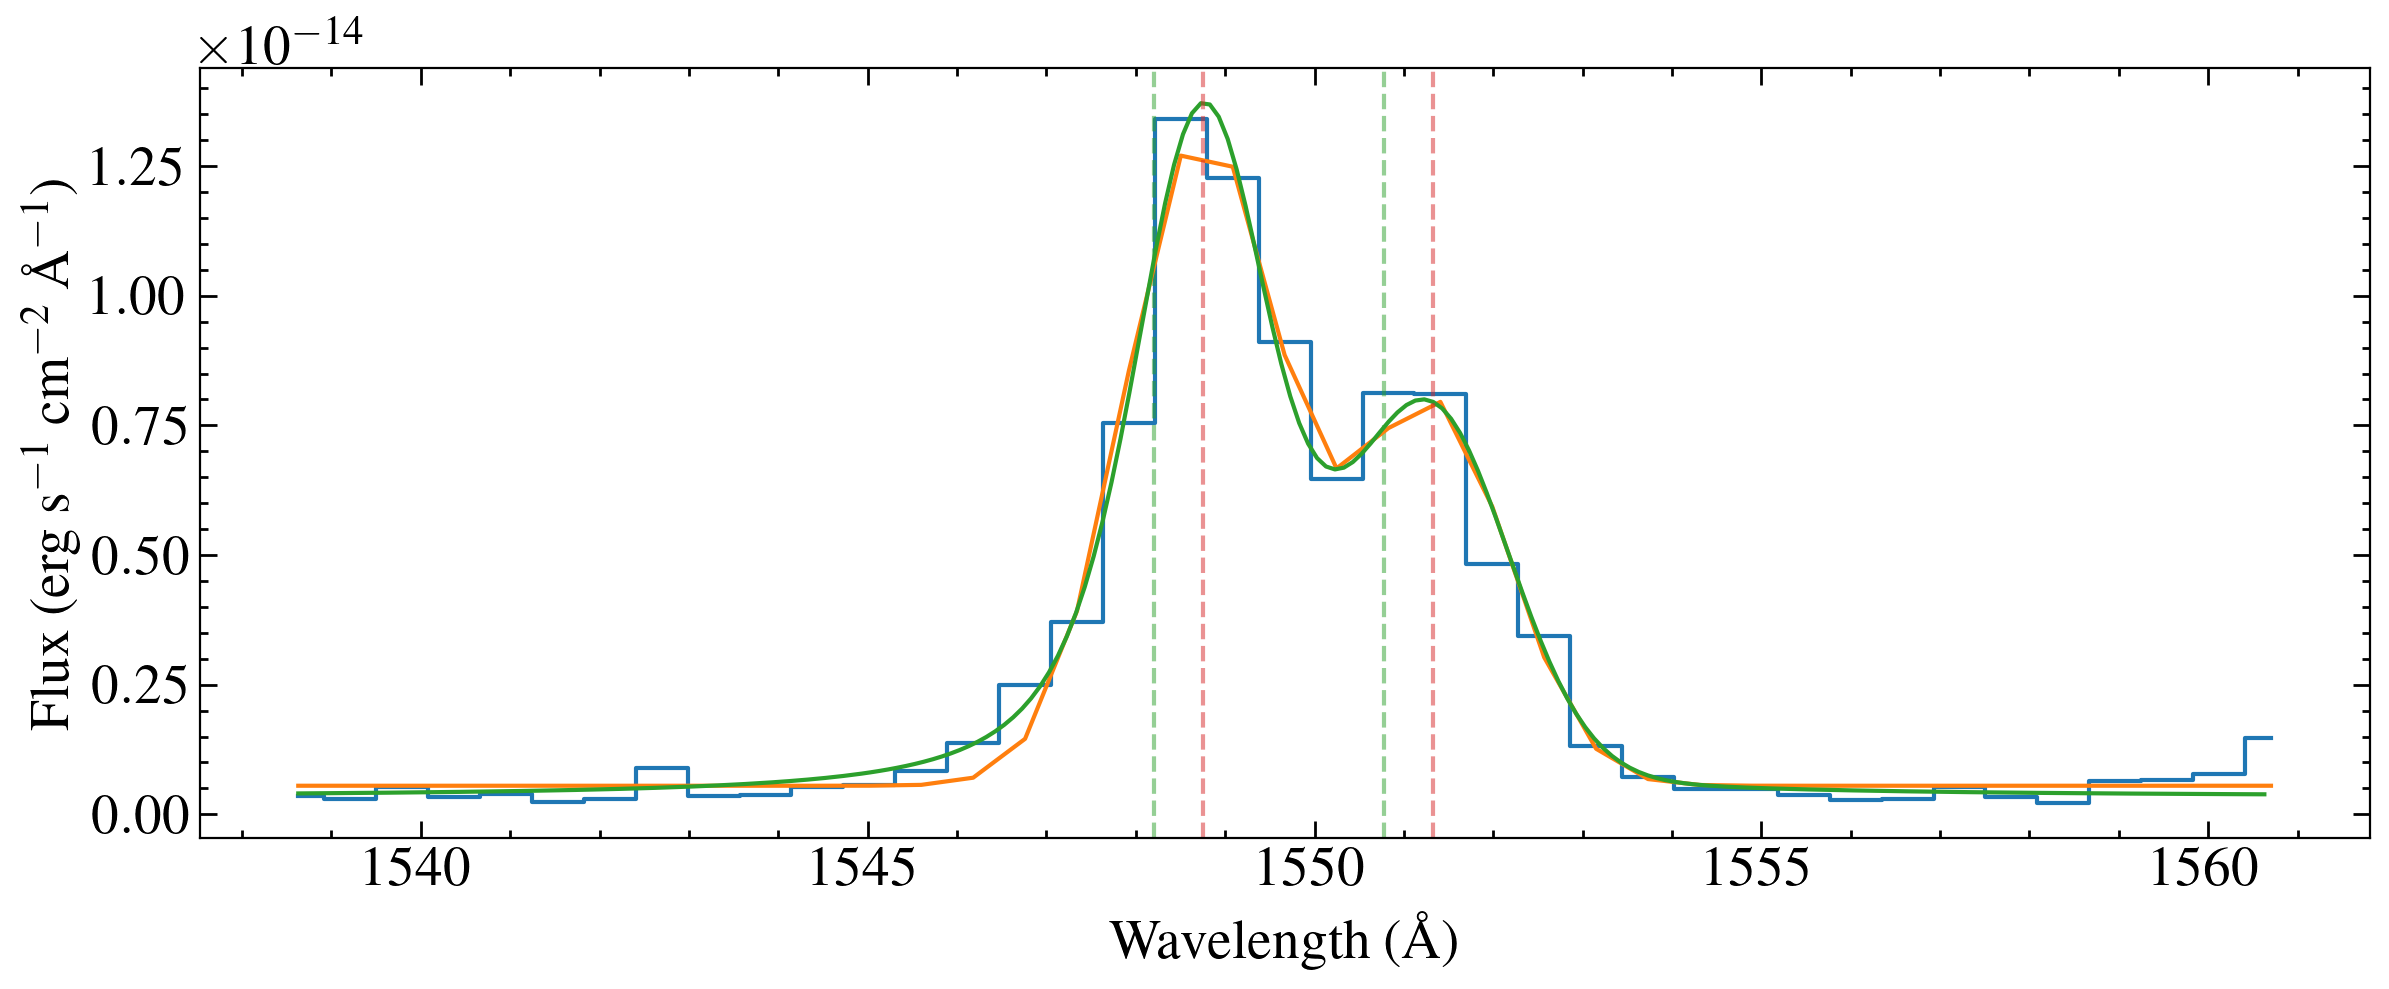

Gaussian
[83.69792644] km / s
Voigt
83.90820464302772 km / s 3.15680034244987


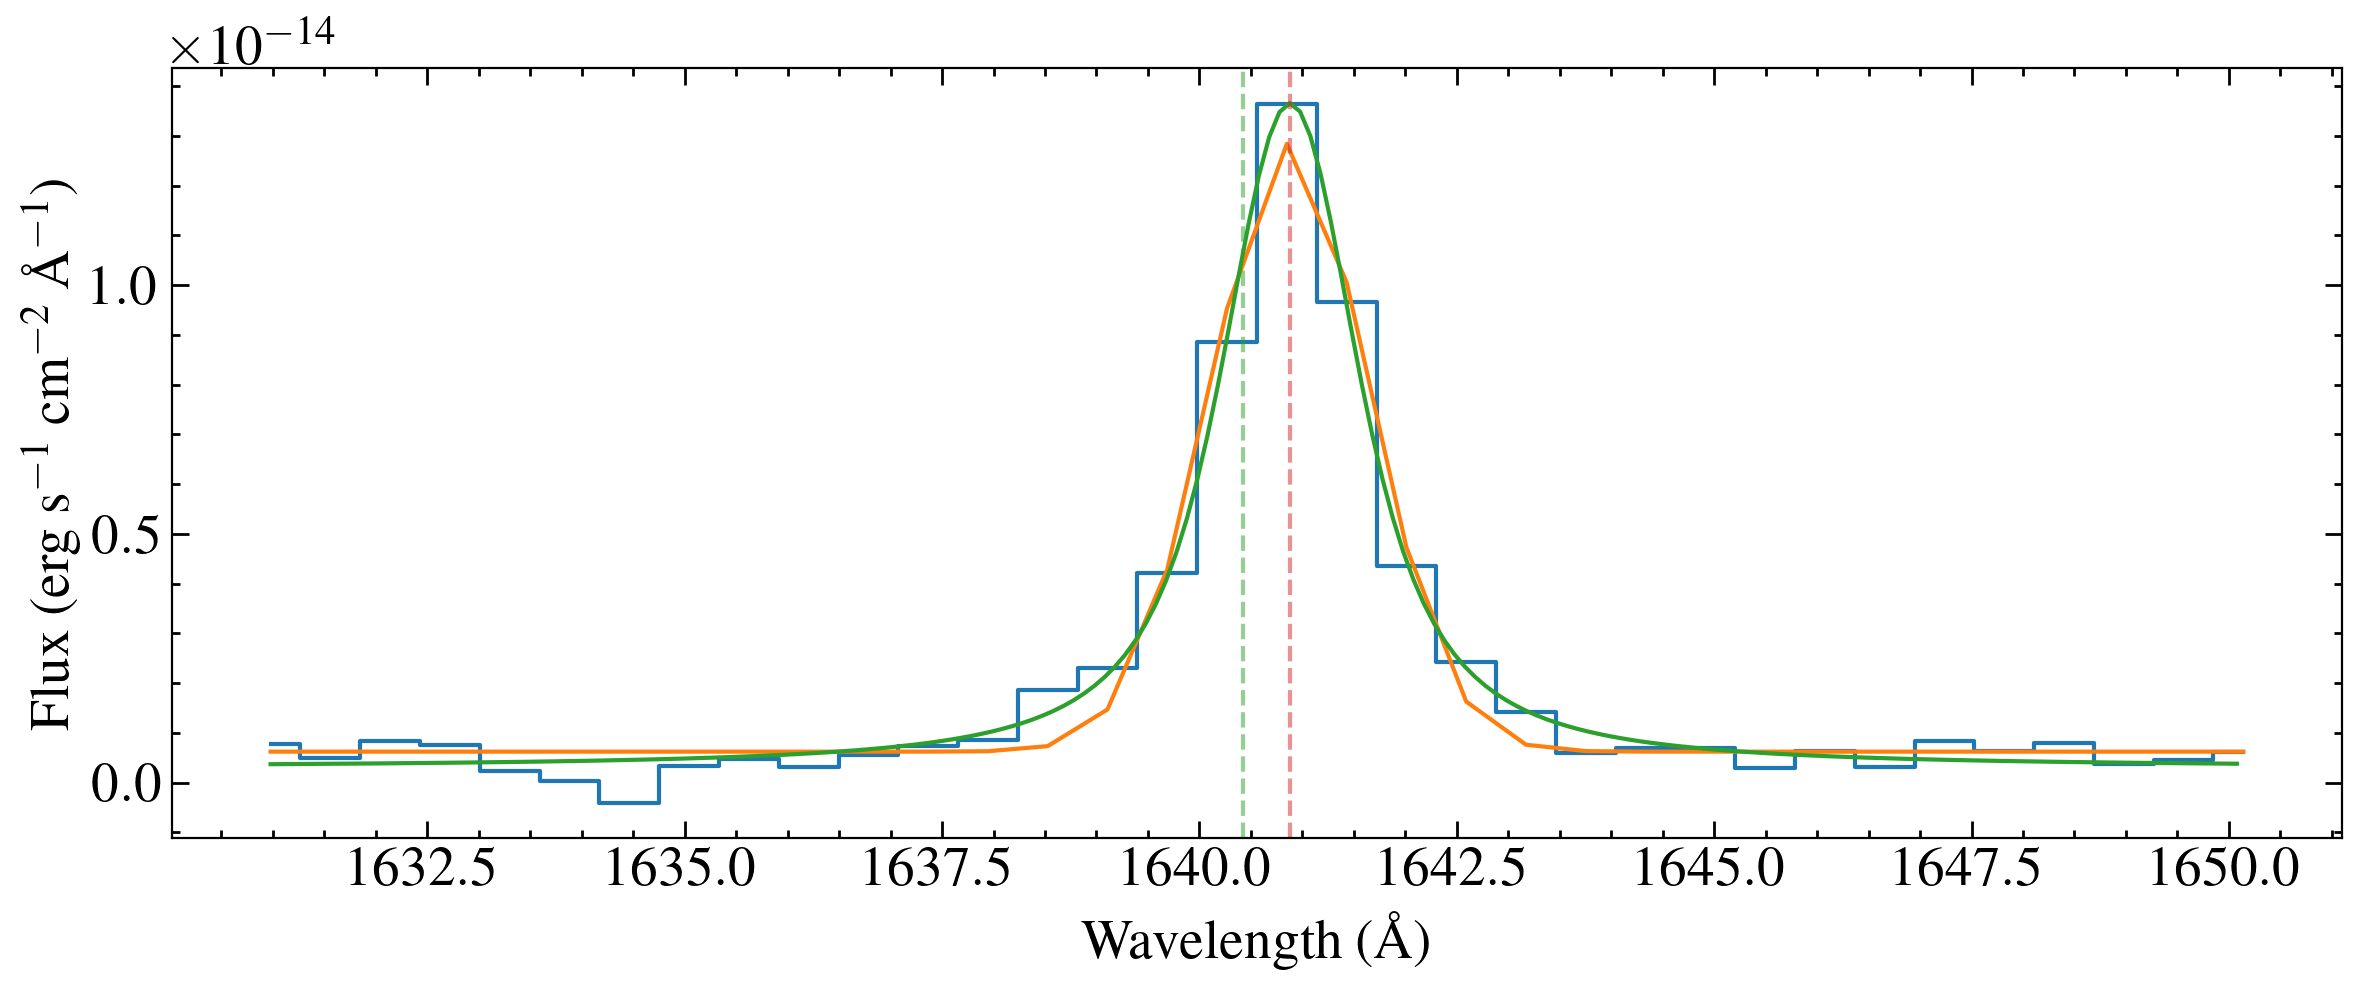

111.70166680265024 116.37615417467214 15.622994958381785


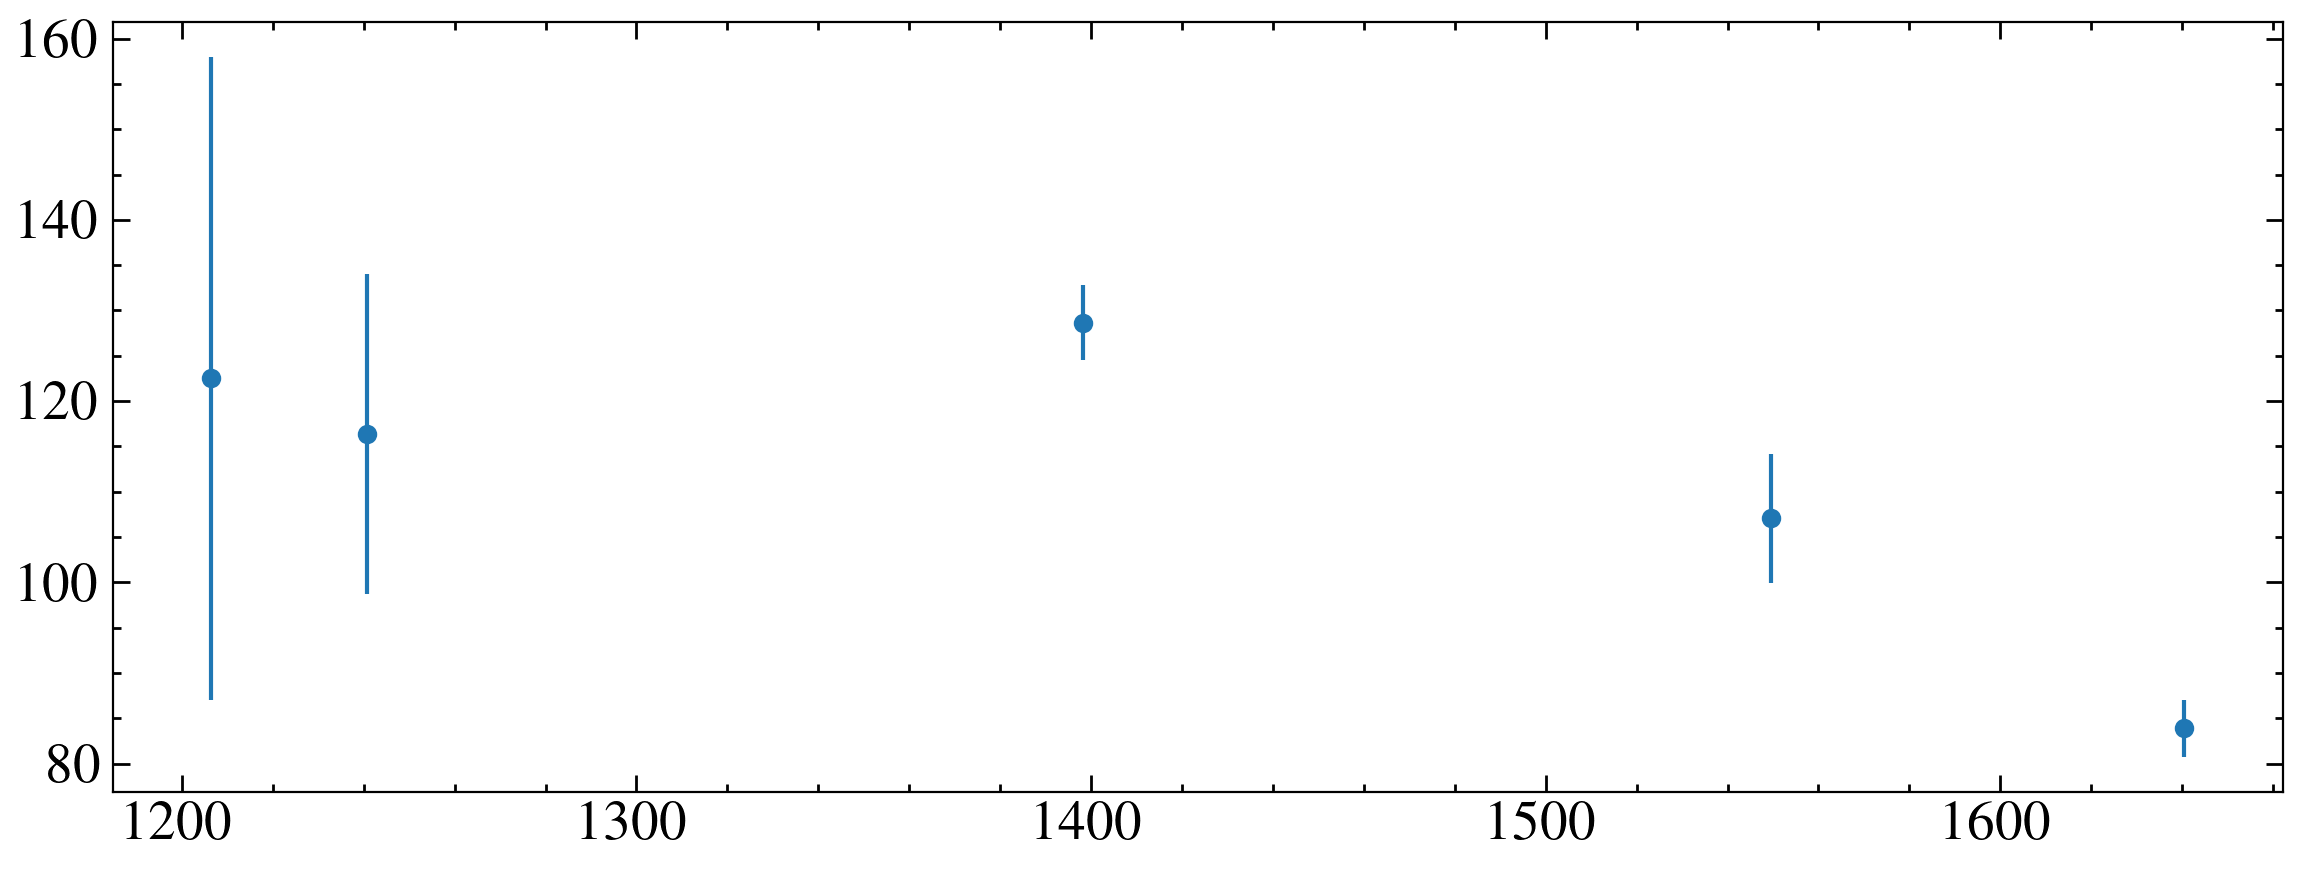

In [16]:
# import astropy.io.fits as fits
# import matplotlib.pyplot as plt
fitter = fitting.LevMarLSQFitter()

def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1


# lines = [1548.201,1550.772]
space = 10

good_lines = [[1206.499],[1238.821, 1242.804],[1393.755,1402.77],[1548.201,1550.772],[1640.42]]

avdvs = []
g140ls = []
g230ls = []
g430ls = []

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G140L':
        g140ls.append(x)
        

        amps = []
        widths = [] 
        flines = []
        fdvs = []
        fdves = []


        data = fits.getdata(x,1)[0]
        w1, f1 , e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']

        for lines in good_lines:

            mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
            w, f, e = w1[mask], f1[mask], e1[mask]
            plt.step(w, f, where='mid')
            plt.xlabel('Wavelength (\AA)')
            plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


            [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

            if len(lines) > 1:

                gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)
                v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)+ \
                models.Voigt1D(x_0=lines[1], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)+models.Const1D(0)#, fixed = dict(amplitude=True))

                def tiedfunc1(mod):
                        x_0 = mod.x_0_1.value+np.diff(lines)
                        # fwhm_G = mod.fwhm_G_1.value
                        return x_0

                def tiedfunc0(mod):
                    mean = mod.mean_1.value+np.diff(lines)
                    return mean



                gg_init.mean_2.tied=tiedfunc0

                v_init.x_0_2.tied=tiedfunc1

            else:
                gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)
                v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)

            gg_fit = fitter(gg_init, w, f, maxiter=100000)
            v_fit = fitter(v_init, w, f, maxiter=100000)
            v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
        #     print(gg_fit)
#             print(v_fit)
#             print(v_fit_e)

            print('Gaussian')
            obs_lam = gg_fit[1].mean.value
            dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
            print(dv)
        #     print(np.mean(dv))


            print('Voigt')
            # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
            # print(np.diff(obs_lam), np.diff(lines))
            obs_lam = v_fit[1].x_0.value
            dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

            dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                            abs(dv.value -((obs_lam-v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

            print(dv, dv_e)

            fdvs.append(dv.value)
            fdves.append(dv_e)
            flines.append(np.mean(lines))


            # print(np.mean(dv))

            plt.plot(w, gg_fit(w))
            w_plot = np.arange(w[0], w[-1],0.1)
            plt.plot(w_plot, v_fit(w_plot))    

            line_width = 3
            for line in lines:
                obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
                plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)

#             linef = np.trapz(v_fit(w_plot), w_plot)
#             contf = np.trapz(v_fit[0](w_plot), w_plot)
#             print(linef-contf)




            plt.show()
        
        avdv = np.average(fdvs, weights = 1/(np.array(fdves)**2))
        avdvs.append(avdv)
            
        plt.errorbar(flines, fdvs, yerr=fdves, ls='none', marker='o')
        print(np.mean(fdvs), np.median(fdvs), np.std(fdvs))
        plt.show()
        
    elif fits.getheader(x, 0)['OPT_ELEM'] == 'G230L':
        g230ls.append(x)
    elif fits.getheader(x, 0)['OPT_ELEM'] == 'G430L':
        g430ls.append(x)


        # print(v_fit)

In [15]:
avdvs

[77.25520424118483,
 76.6456872496963,
 54.47916113482009,
 60.18371869230739,
 113.47239741968342,
 101.3024551063054]

In [17]:
g140ls

['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27030_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27040_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28020_x1d.fits']

In [58]:
target_dv = 5.40 #simbad
target_dve = 1.3

In [30]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [31]:
os.environ['oref'] = '{}shifts/'.format(path)

In [60]:
guess = 0.0

for i, x in enumerate(g140ls):
    hdr = fits.getheader(x)
    cenwave = hdr['CENWAVE']
    root = hdr['ROOTNAME']
    w = fits.getdata(x, 1)[0]['WAVELENGTH']
    mean_plate_scale = np.mean(np.diff(w))
#     print(mean_plate_scale)
    target_shift = avdvs[i] - target_dv
#     print(target_shift)
    cenwave_shift = (target_shift*u.km/u.s).to(u.AA,  equivalencies=u.doppler_optical(cenwave*u.AA))
#     print(cenwave_shift)
    waveshift = cenwave_shift.value - cenwave
#     print(waveshift)
    pixshift = waveshift/mean_plate_scale
    print('Required pixels shift is {:.3f} pixels'.format(pixshift))
    
    shifted_flt = '{}shifts/{}_flt.fits'.format(path, root)
    shifted_raw =  '{}shifts/{}_raw.fits'.format(path, root)
    # since we have turned off WAVECOR at the beginning, SHIFTA1 should be 0
    SHIFTA1 = fits.getval(shifted_flt, "SHIFTA1", 1)
    SHIFTA2 = fits.getval(shifted_flt, "SHIFTA2", 1)
    SHIFTA1 += pixshift+guess
    # update the the SHIFTA1, SHIFTA1 keywords in the _raw fits file first science extension
    fits.setval(shifted_raw, "SHIFTA1", value=SHIFTA1, ext=1)
    fits.setval(shifted_raw, "SHIFTA2", value=SHIFTA2, ext=1)
    
    fits.setval(shifted_raw, "WAVECORR", value="OMIT", ext=0)
    assert fits.getval(shifted_raw, keyword="WAVECORR", ext=0) == "OMIT"
    
    res = stistools.calstis.calstis(shifted_raw, verbose=False, outroot='reextractions/hd120411/')
    assert res == 0, f"CalSTIS exited with an error:  {res}"
    
    
    

Required pixels shift is 0.588 pixels

*** CALSTIS-0 -- Version 3.4.2 (19-Jan-2018) ***
Begin    04-Oct-2023 17:28:09 MDT

Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27010_raw.fits
Outroot  reextractions/hd120411/oeoo27010_raw.fits

*** CALSTIS-1 -- Version 3.4.2 (19-Jan-2018) ***
Begin    04-Oct-2023 17:28:09 MDT
Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27010_raw.fits
Output   reextractions/hd120411/oeoo27010_flt.fits
OBSMODE  TIME-TAG
APERTURE 52X0.2
OPT_ELEM G140L
DETECTOR FUV-MAMA

Imset 1  Begin 17:28:09 MDT

DQICORR  PERFORM
DQITAB   oref$uce15153o_bpx.fits
DQITAB   PEDIGREE=GROUND
DQITAB   DESCRIP =New BPIXTAB with opt_elem column and correct repeller wire flag----
DQICORR  COMPLETE
         Uncertainty array initialized.

LORSCORR PERFORM
LORSCORR COMPLETE

GLINCORR PERFORM
LFLGCORR PERFORM
MLINTAB  oref$j9r16559o_lin.fits
MLINTAB  PEDIGREE=GROUND
MLINTAB  DESCRIP =T. Danks gathered Info
MLINTAB  DESCRIP =T. Danks Gathered

In [61]:
new_x1ds = glob.glob('reextractions/hd120411/*x1d.fits')
new_x1ds

['reextractions/hd120411/oeoo27020_x1d.fits',
 'reextractions/hd120411/oeoo27010_x1d.fits',
 'reextractions/hd120411/oeoo27040_x1d.fits',
 'reextractions/hd120411/oeoo27030_x1d.fits',
 'reextractions/hd120411/oeoo28020_x1d.fits',
 'reextractions/hd120411/oeoo28010_x1d.fits']

In [62]:
# # import astropy.io.fits as fits
# # import matplotlib.pyplot as plt
# fitter = fitting.LevMarLSQFitter()

# new_avdvs = []
# new_avdves = []

# for x in new_x1ds:
#     if fits.getheader(x, 0)['OPT_ELEM'] == 'G140L':
        

#         amps = []
#         widths = [] 
#         flines = []
#         fdvs = []
#         fdves = []


#         data = fits.getdata(x,1)[0]
#         w1, f1 , e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']

#         for lines in good_lines:

#             mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
#             w, f, e = w1[mask], f1[mask], e1[mask]
#             plt.step(w, f, where='mid')
#             plt.xlabel('Wavelength (\AA)')
#             plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


#             [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

#             if len(lines) > 1:

#                 gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)
#                 v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.5)+ \
#                 models.Voigt1D(x_0=lines[1], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.3)+models.Const1D(0)#, fixed = dict(amplitude=True))

#                 def tiedfunc1(mod):
#                         x_0 = mod.x_0_1.value+np.diff(lines)
#                         # fwhm_G = mod.fwhm_G_1.value
#                         return x_0

#                 def tiedfunc0(mod):
#                     mean = mod.mean_1.value+np.diff(lines)
#                     return mean



#                 gg_init.mean_2.tied=tiedfunc0

#                 v_init.x_0_2.tied=tiedfunc1

#             else:
#                 gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)
#                 v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)

#             gg_fit = fitter(gg_init, w, f, maxiter=100000)
#             v_fit = fitter(v_init, w, f, maxiter=100000)
#             v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
#         #     print(gg_fit)
# #             print(v_fit)
# #             print(v_fit_e)

#             print('Gaussian')
#             obs_lam = gg_fit[1].mean.value
#             dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
#             print(dv)
#         #     print(np.mean(dv))


#             print('Voigt')
#             # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
#             # print(np.diff(obs_lam), np.diff(lines))
#             obs_lam = v_fit[1].x_0.value
#             dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

#             dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
#                             abs(dv.value -((obs_lam-v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

#             print(dv, dv_e)

#             fdvs.append(dv.value)
#             fdves.append(dv_e)
#             flines.append(np.mean(lines))


#             # print(np.mean(dv))

#             plt.plot(w, gg_fit(w))
#             w_plot = np.arange(w[0], w[-1],0.1)
#             plt.plot(w_plot, v_fit(w_plot))    

#             line_width = 3
#             for line in lines:
#                 obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
#                 plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)

# #             linef = np.trapz(v_fit(w_plot), w_plot)
# #             contf = np.trapz(v_fit[0](w_plot), w_plot)
# #             print(linef-contf)




#             plt.show()
        
#         weights = 1/(np.array(fdves)**2)
#         avdv = np.average(fdvs, weights = weights)
#         avdve = (1/(np.sum(weights)))**0.5
        
        
#         new_avdvs.append(avdv)
#         new_avdves.append(avdve)
            
#         plt.errorbar(flines, fdvs, yerr=fdves, ls='none', marker='o')
#         plt.axhline(target_dv, ls='--', c='C1')
#         plt.axhline(avdv, ls='--', c='C2')
#         print(np.mean(fdvs), np.median(fdvs), np.std(fdvs), avdv)
#         plt.show()
        


#         # print(v_fit)

In [63]:
# x = np.arange(len(g140ls))

# plt.errorbar(x, new_avdvs, new_avdves, ls='none', marker='o')
# plt.axhline(target_dv, ls='--', c='C2')
# x2 = np.arange(-1, 7,1)
# plt.fill_between(x2, target_dv-1.3, target_dv+1.3, color='C2', alpha=0.1)
# plt.xlim(-0.5, 5.5)

In [64]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**0.5
    return flux,error

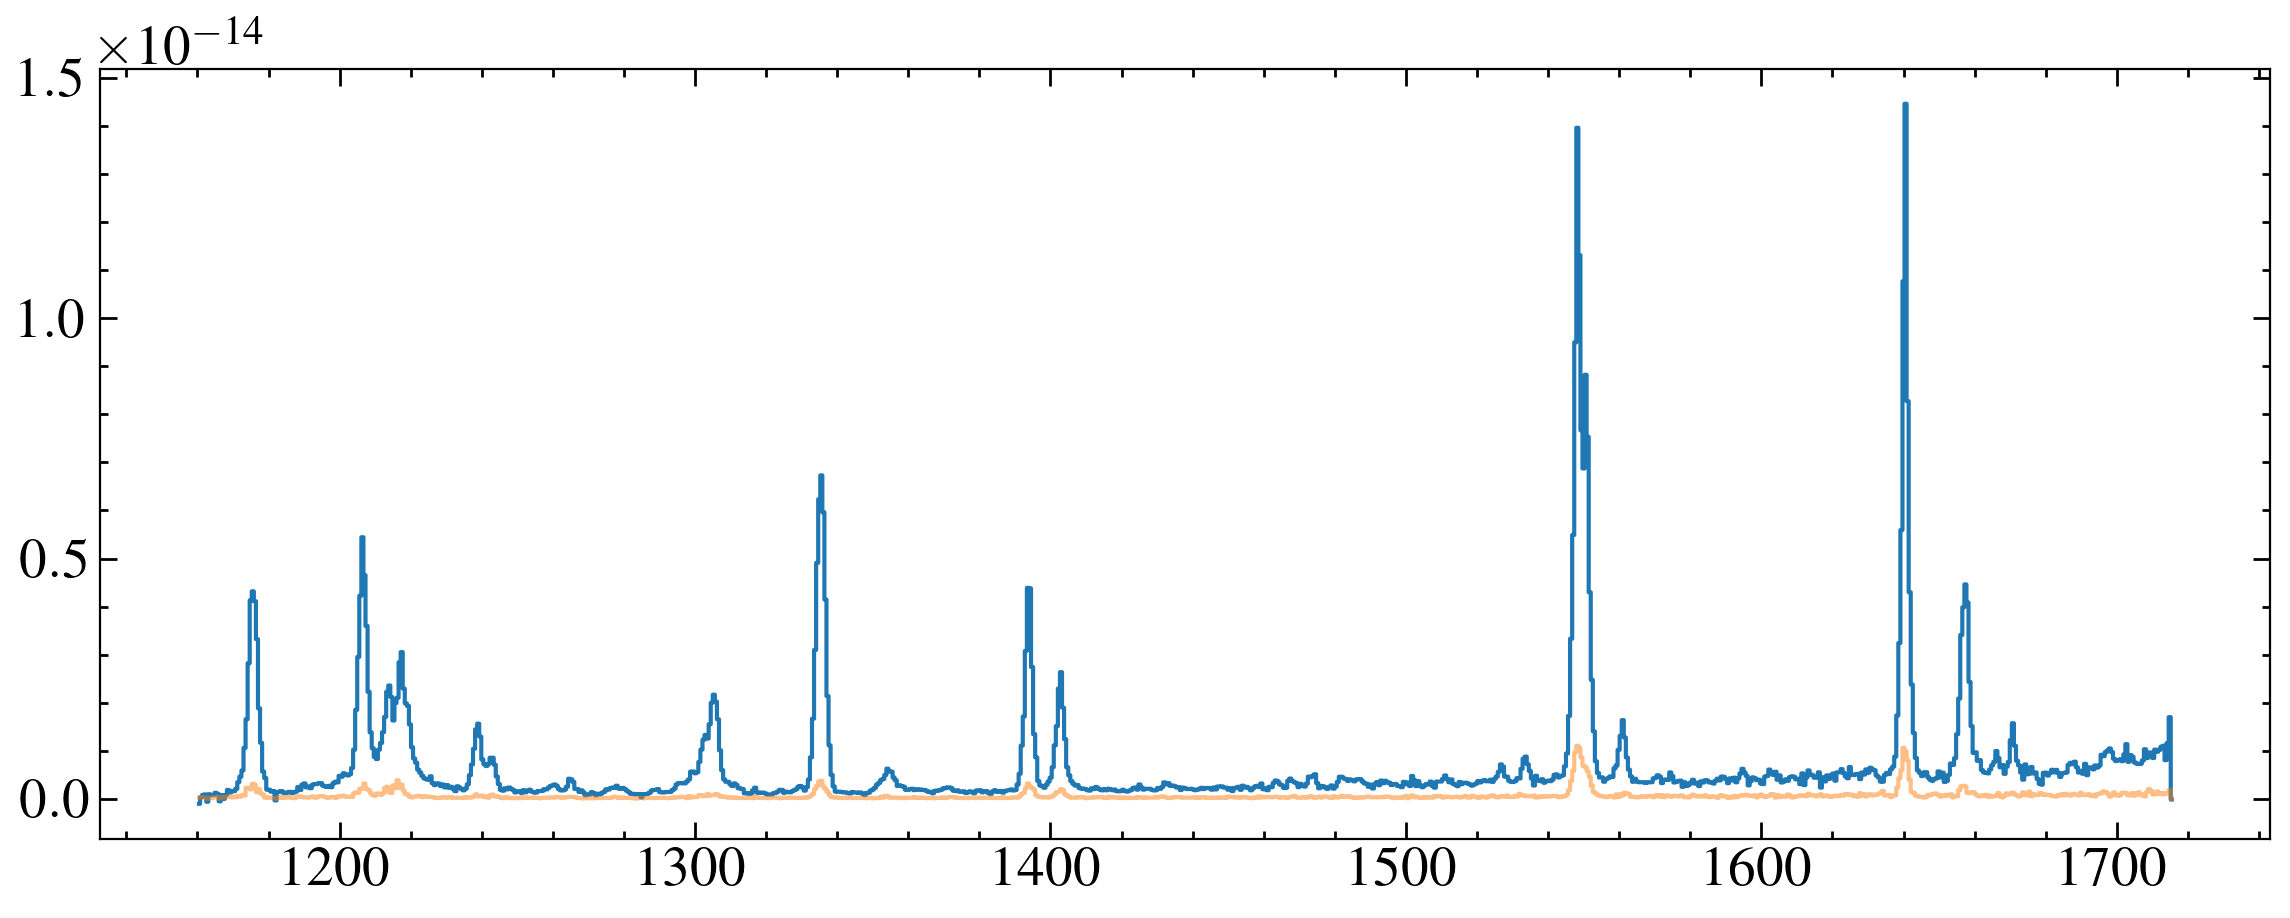

In [65]:
w_fuv = []
f_fuv = []
e_fuv = []
n =0
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = (w > 1160)
    w, f, e = w[mask], f[mask], e[mask]
    if n == 0:
        w_fuv = w
        f_fuv.append(f)
        e_fuv.append(e)
    else:
        f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
        e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
    n +=1
  
        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)


plt.step(w_fuv, f_fuv, where='mid')
plt.step(w_fuv, e_fuv, where='mid', alpha=0.5)

Gaussian
[9.65482568] km / s
Voigt
9.655204130971198 km / s 30.842793975310606


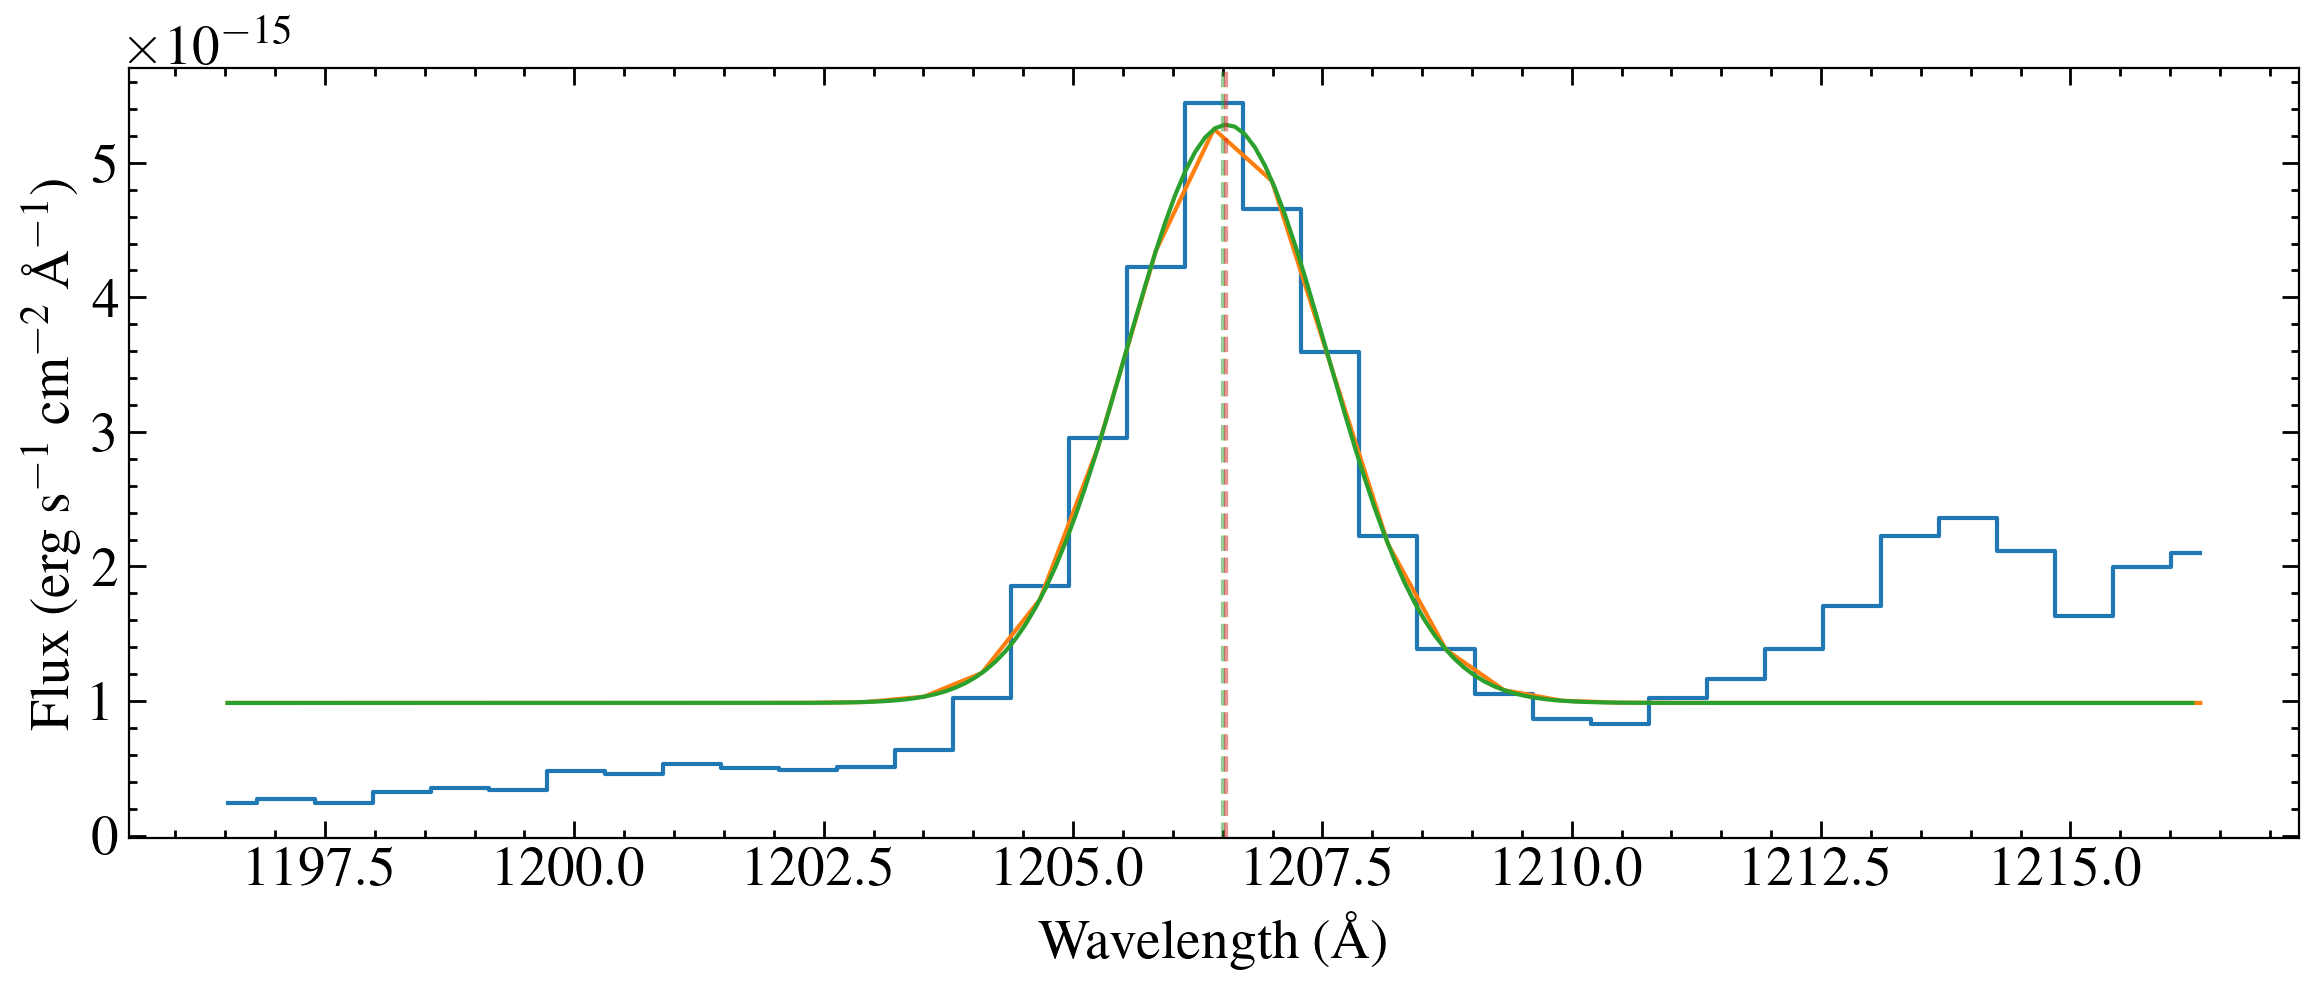

Gaussian
[  -3.643627  -964.4217124] km / s
Voigt
0.71439829718943 km / s 10.37243329837721


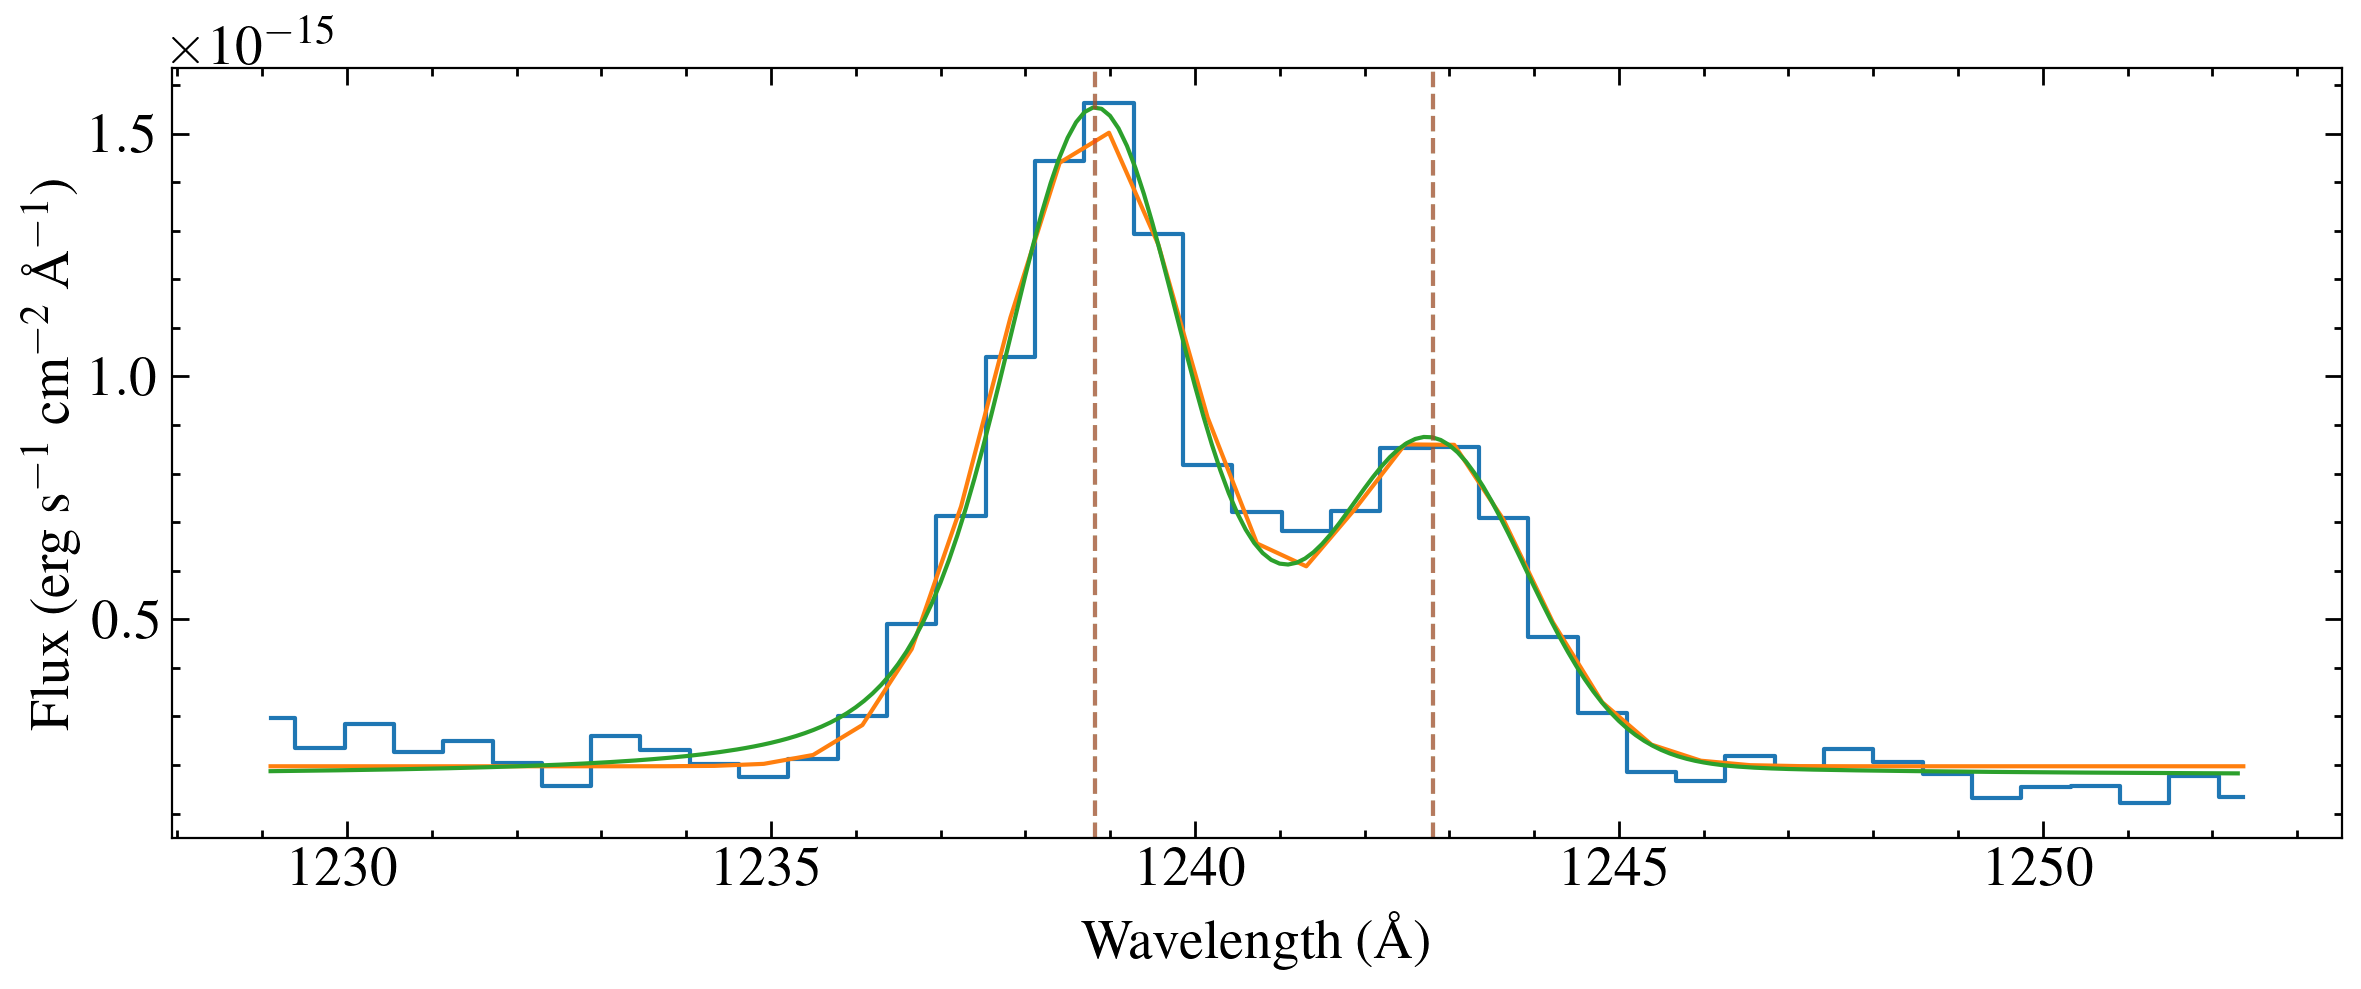

Gaussian
[   20.47080916 -1906.29805046] km / s
Voigt
21.249616911777654 km / s 3.431223379461411


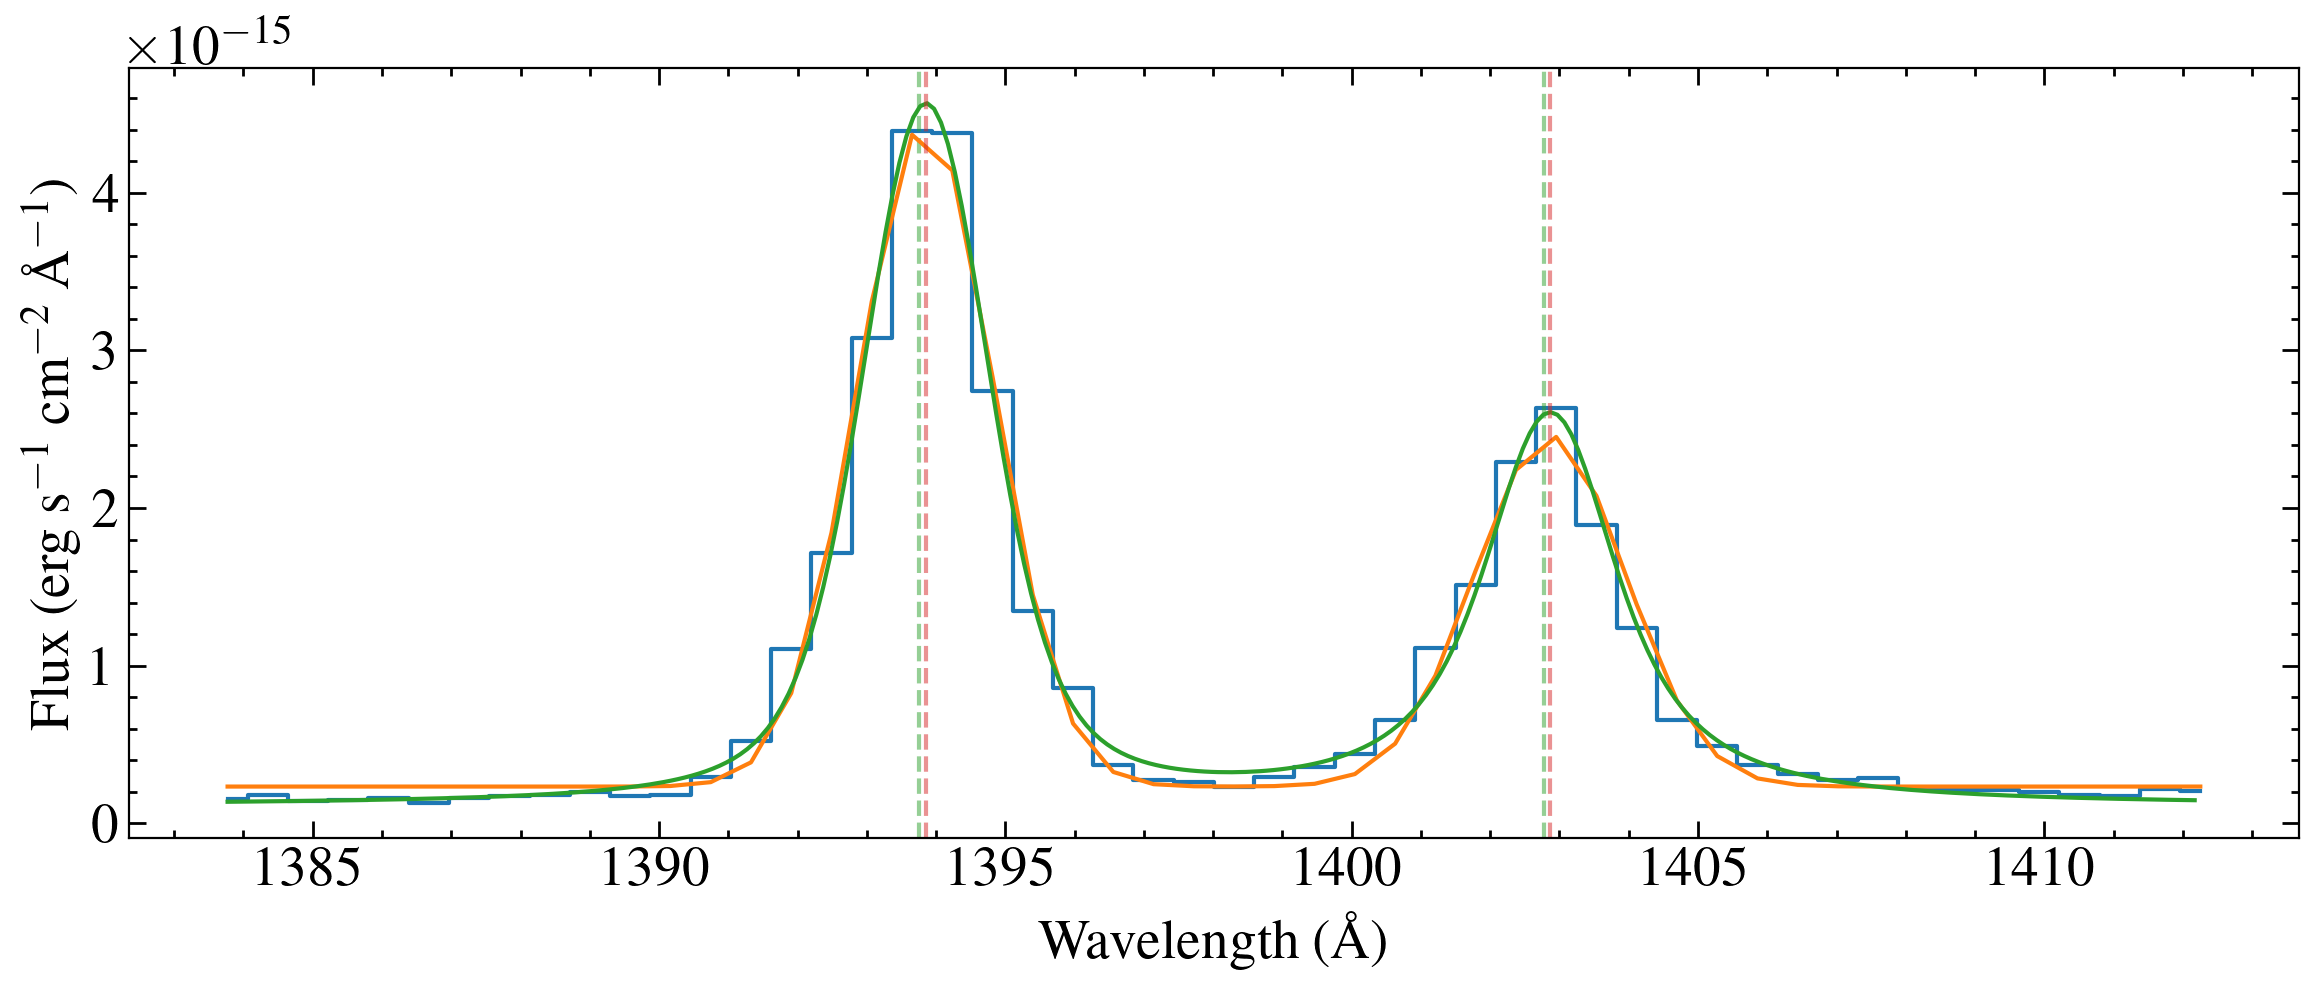

Gaussian
[  12.76004531 -484.28221209] km / s
Voigt
10.912101622529953 km / s 8.720136293984682


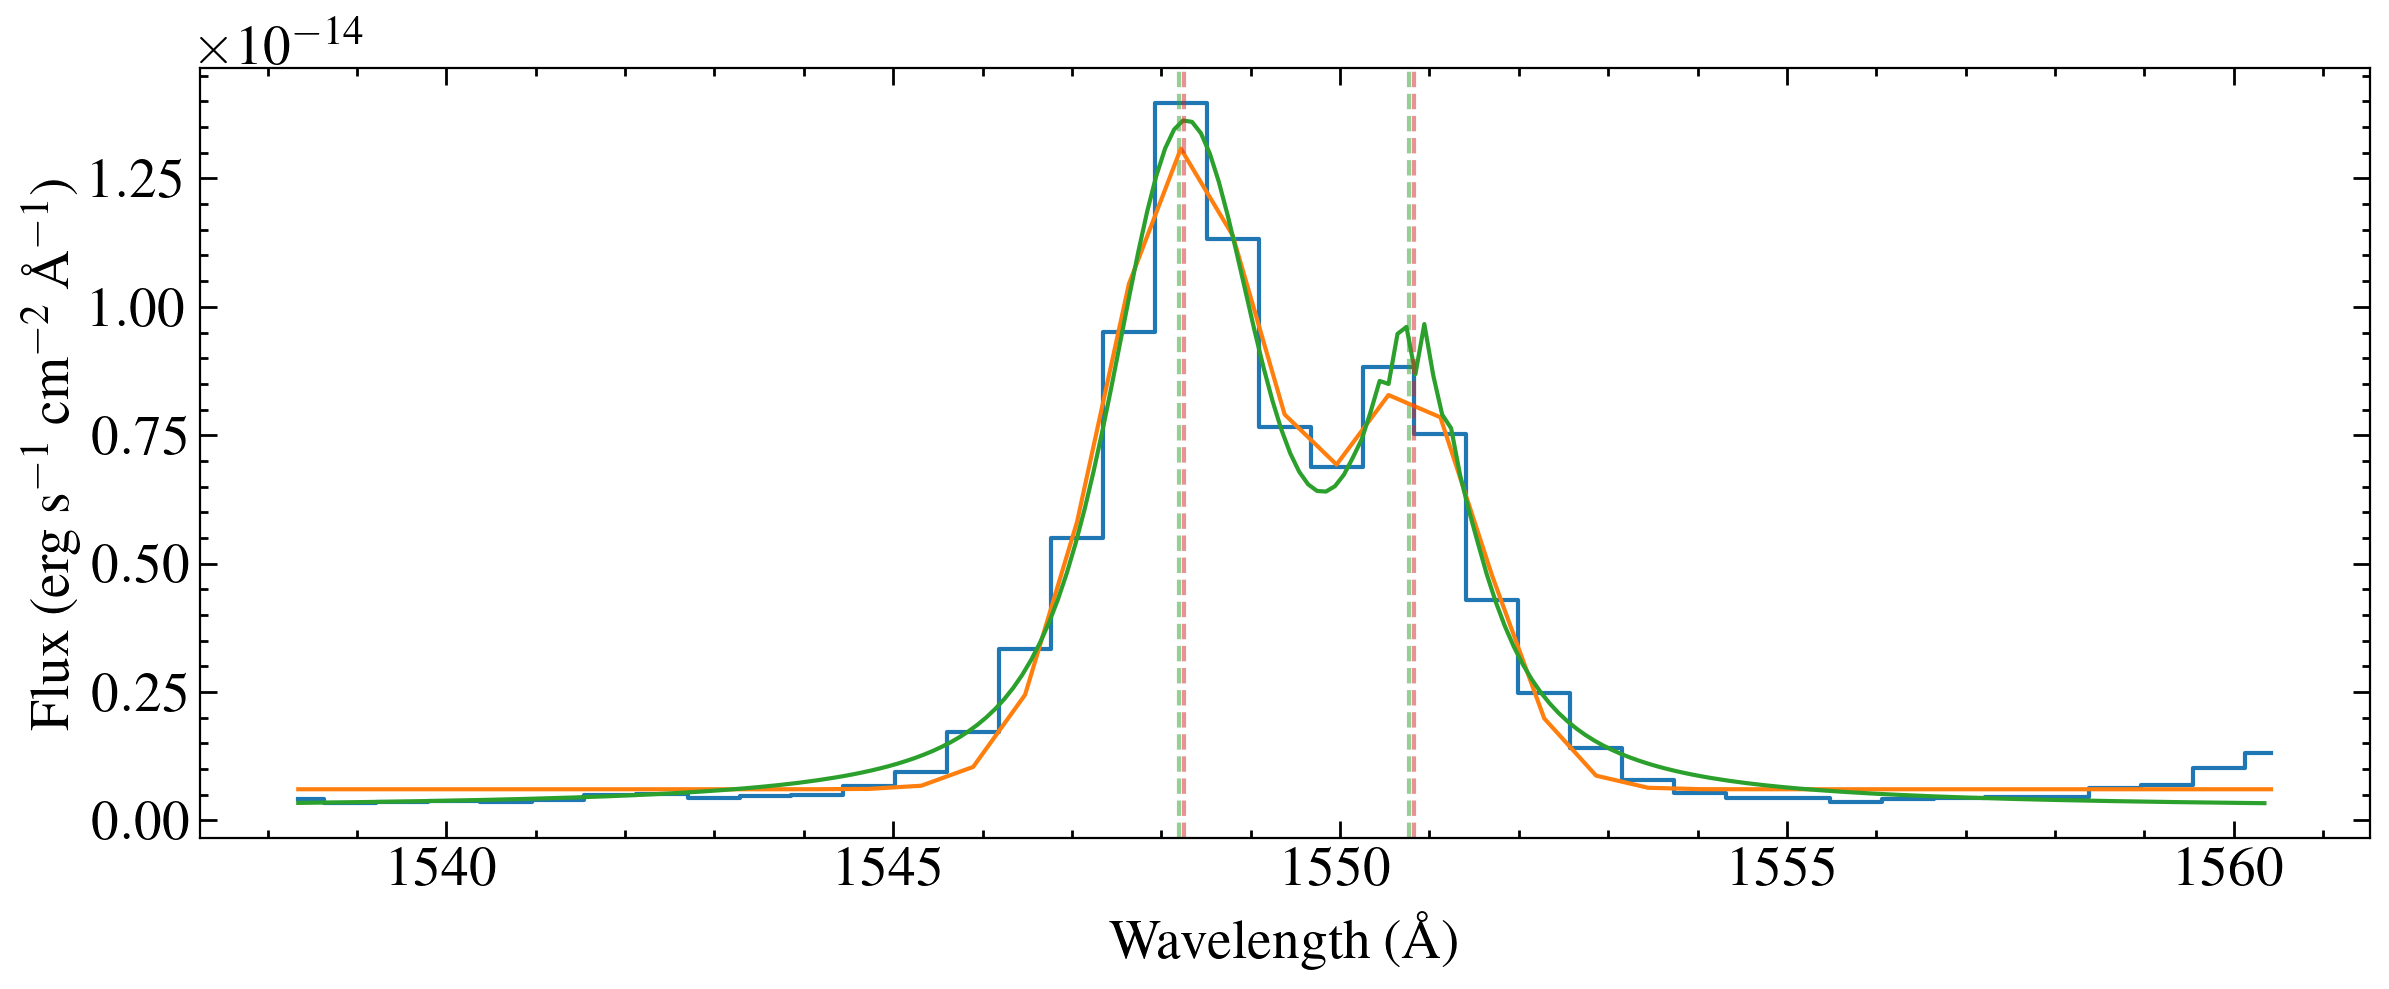

Gaussian
[4.45338247] km / s
Voigt
5.028266764539915 km / s 1.9447221811086208


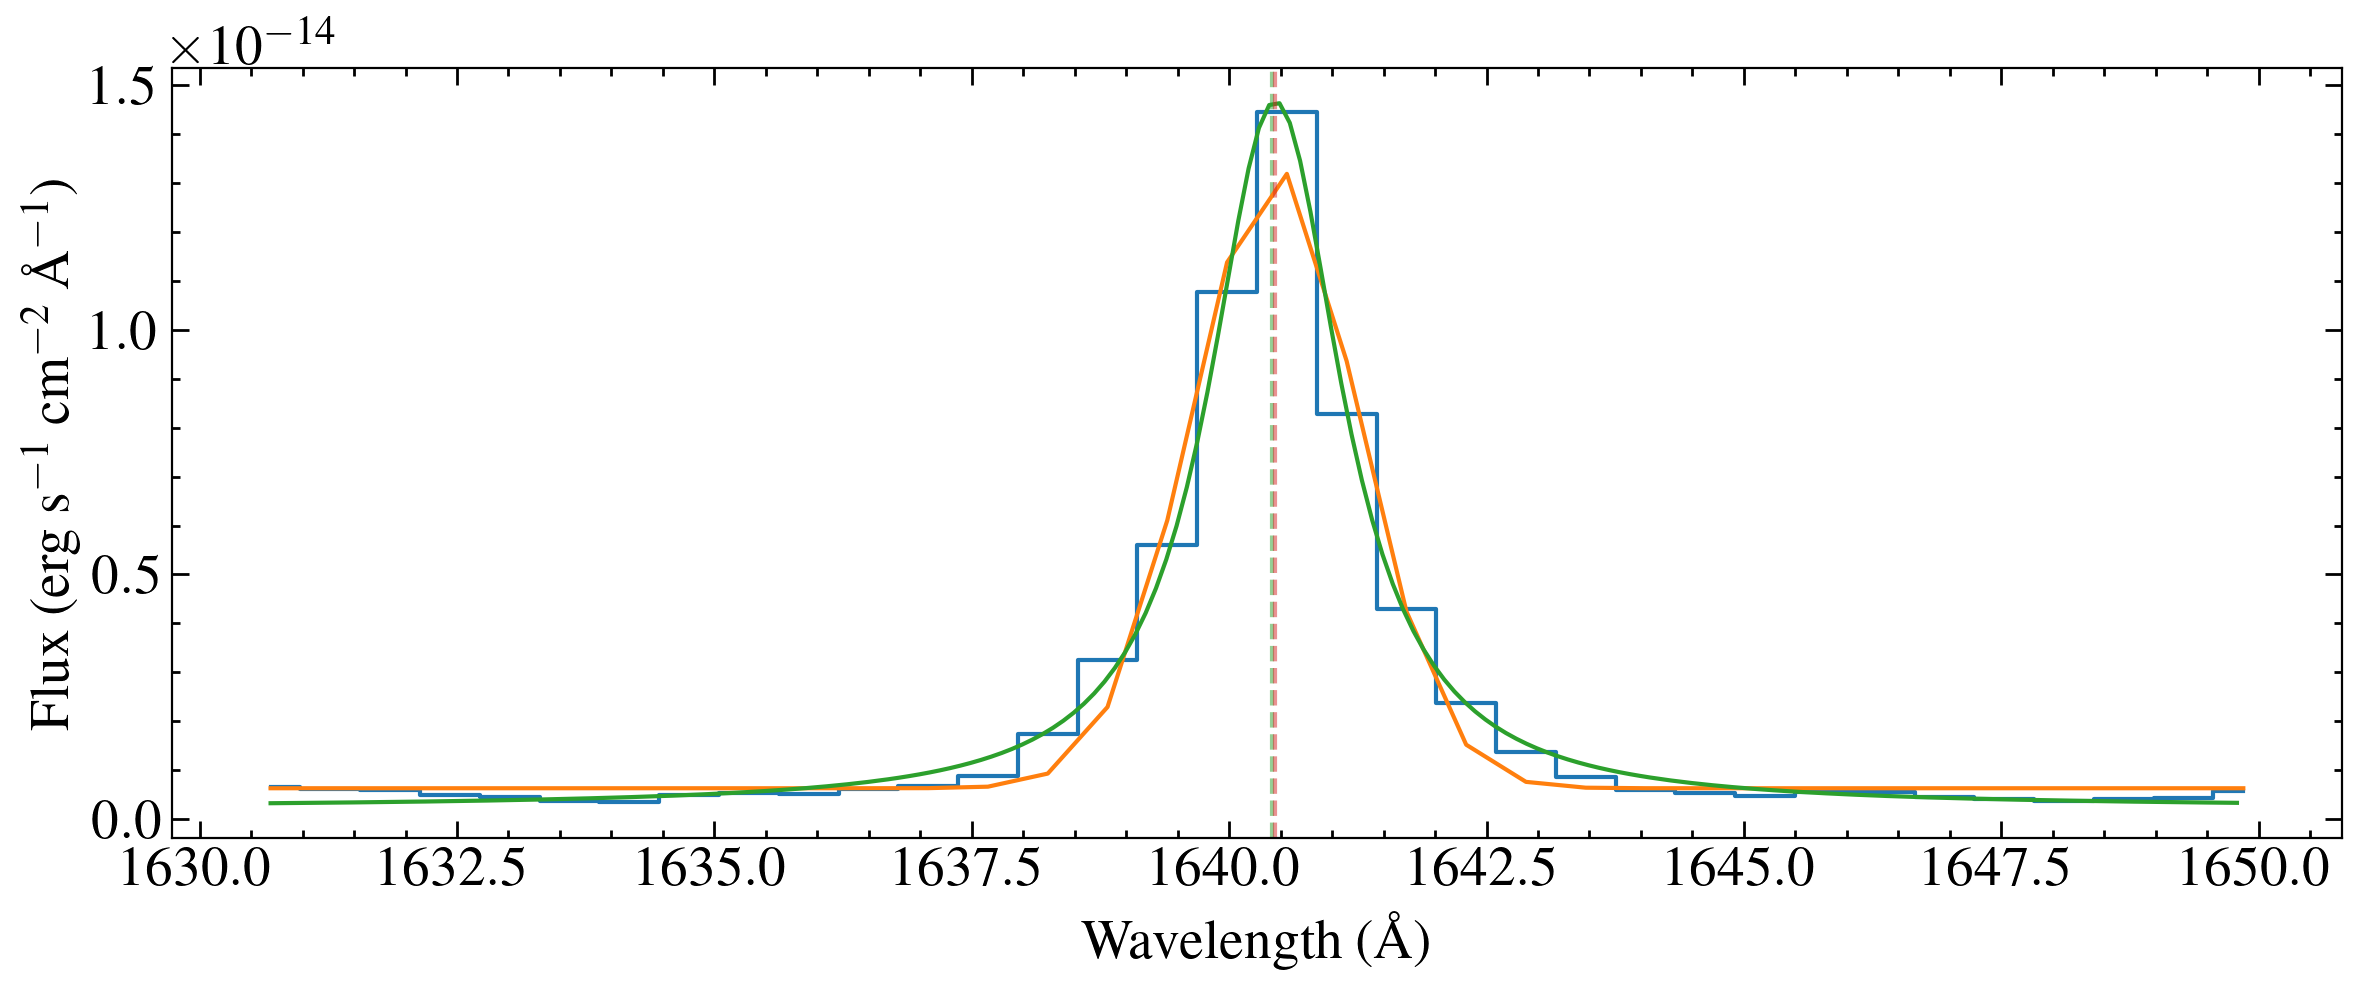

In [66]:
w1, f1 , e1 = w_fuv, f_fuv, e_fuv

for lines in good_lines:

    mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
    w, f, e = w1[mask], f1[mask], e1[mask]
    plt.step(w, f, where='mid')
    plt.xlabel('Wavelength (\AA)')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


    [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

    if len(lines) > 1:

        gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)
        v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.5)+ \
        models.Voigt1D(x_0=lines[1], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.3)+models.Const1D(0)#, fixed = dict(amplitude=True))

        def tiedfunc1(mod):
                x_0 = mod.x_0_1.value+np.diff(lines)
                # fwhm_G = mod.fwhm_G_1.value
                return x_0

        def tiedfunc0(mod):
            mean = mod.mean_1.value+np.diff(lines)
            return mean



        gg_init.mean_2.tied=tiedfunc0

        v_init.x_0_2.tied=tiedfunc1

    else:
        gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)
        v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)

    gg_fit = fitter(gg_init, w, f, maxiter=100000)
    v_fit = fitter(v_init, w, f, maxiter=100000)
    v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
#     print(gg_fit)
#             print(v_fit)
#             print(v_fit_e)

    print('Gaussian')
    obs_lam = gg_fit[1].mean.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
    print(dv)
#     print(np.mean(dv))


    print('Voigt')
    # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
    # print(np.diff(obs_lam), np.diff(lines))
    obs_lam = v_fit[1].x_0.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

    dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                    abs(dv.value -((obs_lam-v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

    print(dv, dv_e)

    fdvs.append(dv.value)
    fdves.append(dv_e)
    flines.append(np.mean(lines))


    # print(np.mean(dv))

    plt.plot(w, gg_fit(w))
    w_plot = np.arange(w[0], w[-1],0.1)
    plt.plot(w_plot, v_fit(w_plot))    

    line_width = 3
    for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)

#             linef = np.trapz(v_fit(w_plot), w_plot)
#             contf = np.trapz(v_fit[0](w_plot), w_plot)
#             print(linef-contf)




    plt.show()

weights = 1/(np.array(fdves)**2)
avdv = np.average(fdvs, weights = weights)
avdve = (1/(np.sum(weights)))**0.5
        
        

4.5565744978493194 1.0778125191958092
5.4 1.3
[-4.2391664663191655, -62.39852785566842, 20.533097529651677, -4.882191387284096, -13.37443615733588, 8.746937869323968, 2.228488387742432, -5.565439697687283, 9.655204130971198, 0.71439829718943, 21.249616911777654, 10.912101622529953, 5.028266764539915] [27.61630166987893, 16.404651021488753, 3.4980805763422484, 30.684370308777936, 9.593383967276033, 3.3617693690576607, 5.725259513725293, 1.9234163739586565, 30.842793975310606, 10.37243329837721, 3.431223379461411, 8.720136293984682, 1.9447221811086208]


<ErrorbarContainer object of 3 artists>

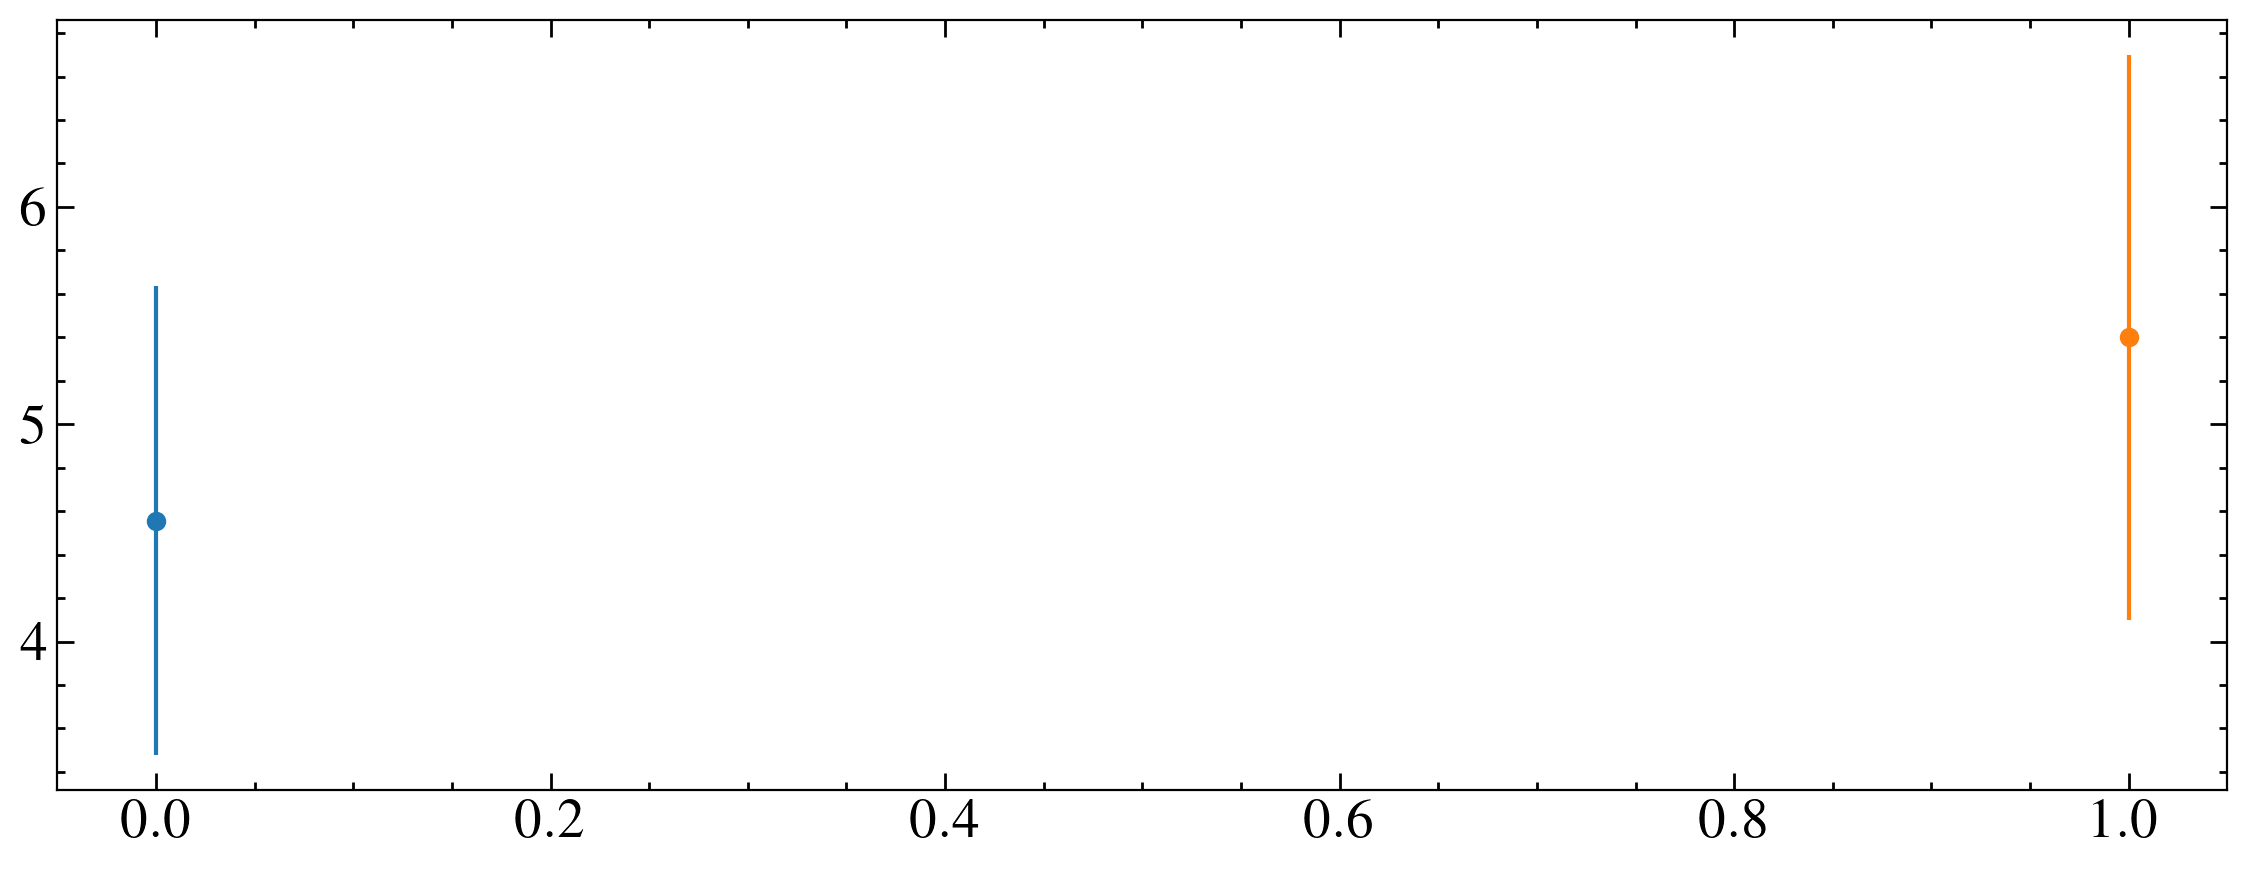

In [72]:
print(avdv, avdve)
print(target_dv, target_dve)
print(fdvs, fdves)

plt.errorbar(0, avdv, yerr=avdve, marker='o')
plt.errorbar(1, target_dv, yerr=target_dve, marker='o')

That worked as well as can be expected. Copying over the dv measurements for the g230l and g430l spectra so they're in the same place

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=0., c1=-0., c2=0.)>

    [1]: <Gaussian1D(amplitude=0., mean=2797.67493727, stddev=0.96725508)>

    [2]: <Gaussian1D(amplitude=0., mean=2804.85293727, stddev=0.96725508)>
Parameters:
             c0_0                  c1_0          ...      stddev_2     
    --------------------- ---------------------- ... ------------------
    7.374397042942038e-10 -5.270841470243046e-13 ... 0.9672550818877631
[4.36980788e-11 3.12340653e-14 5.58116123e-18 4.04308365e-15
 1.81523440e-01 1.66377496e-01]
141.83000453552623 km / s 19.46083976023663


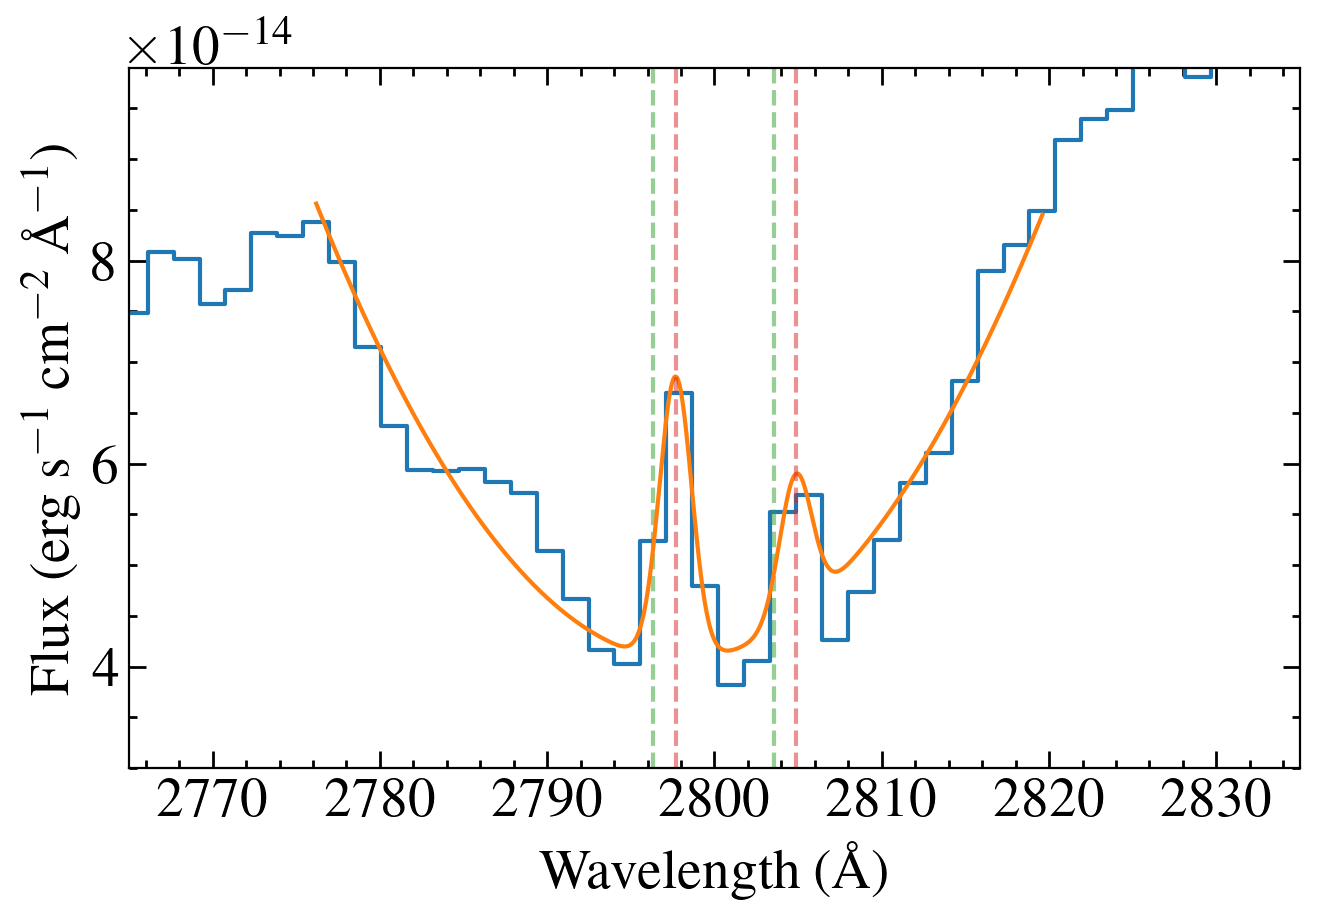

In [73]:
fig, ax = plt.subplots(figsize=(7, 5))

x = g230ls[0]
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(2765, 2835)
ax.set_ylim(0.3e-13, 0.99e-13)

lines=[2796.35, 2803.53]
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



mg2 = [2796.352, 2803.53]
os = [6.08e-01, 3.03e-01]

lines = np.copy(mg2)

mask = (w > 2775) & (w < 2820)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (-15*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=6e-14, mean = line_guess, stddev=0.5)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
mod.amplitude_2.tied = tiedamp


mgfit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, mgfit(wmod))

print(mgfit)
mgfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(mgfit_e)

obs_lam = mgfit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

mgdv, mgdve = dv.value, dv_e

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()



In [ ]:
guess = 0.0

x = g230ls[0]
for i, x in enumerate(g230ls):
    hdr = fits.getheader(x)
    cenwave = hdr['CENWAVE']
    root = hdr['ROOTNAME']
    w = fits.getdata(x, 1)[0]['WAVELENGTH']
    mean_plate_scale = np.mean(np.diff(w))
#     print(mean_plate_scale)
    target_shift = avdvs[i] - target_dv
#     print(target_shift)
    cenwave_shift = (target_shift*u.km/u.s).to(u.AA,  equivalencies=u.doppler_optical(cenwave*u.AA))
#     print(cenwave_shift)
    waveshift = cenwave_shift.value - cenwave
#     print(waveshift)
    pixshift = waveshift/mean_plate_scale
    print('Required pixels shift is {:.3f} pixels'.format(pixshift))
    
    shifted_flt = '{}shifts/{}_flt.fits'.format(path, root)
    shifted_raw =  '{}shifts/{}_raw.fits'.format(path, root)
    # since we have turned off WAVECOR at the beginning, SHIFTA1 should be 0
    SHIFTA1 = fits.getval(shifted_flt, "SHIFTA1", 1)
    SHIFTA2 = fits.getval(shifted_flt, "SHIFTA2", 1)
    SHIFTA1 += pixshift+guess
    # update the the SHIFTA1, SHIFTA1 keywords in the _raw fits file first science extension
    fits.setval(shifted_raw, "SHIFTA1", value=SHIFTA1, ext=1)
    fits.setval(shifted_raw, "SHIFTA2", value=SHIFTA2, ext=1)
    
    fits.setval(shifted_raw, "WAVECORR", value="OMIT", ext=0)
    assert fits.getval(shifted_raw, keyword="WAVECORR", ext=0) == "OMIT"
    
    res = stistools.calstis.calstis(shifted_raw, verbose=False, outroot='reextractions/hd120411/')
    assert res == 0, f"CalSTIS exited with an error:  {res}"
    
    
    

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=-0., c1=0., c2=-0.)>

    [1]: <Gaussian1D(amplitude=-0., mean=3938.42133285, stddev=7.41383086)>

    [2]: <Gaussian1D(amplitude=-0., mean=3973.24133285, stddev=7.41383086)>
Parameters:
             c0_0                   c1_0         ...      stddev_2    
    ---------------------- --------------------- ... -----------------
    -6.943338002302458e-11 3.446084883107263e-14 ... 7.413830857309629
[1.28953508e-11 6.45294408e-15 8.07119067e-19 1.06314969e-14
 3.11841568e-01 3.34931843e-01 1.04587044e-14]
278.1972136586018 km / s 25.518655623806097


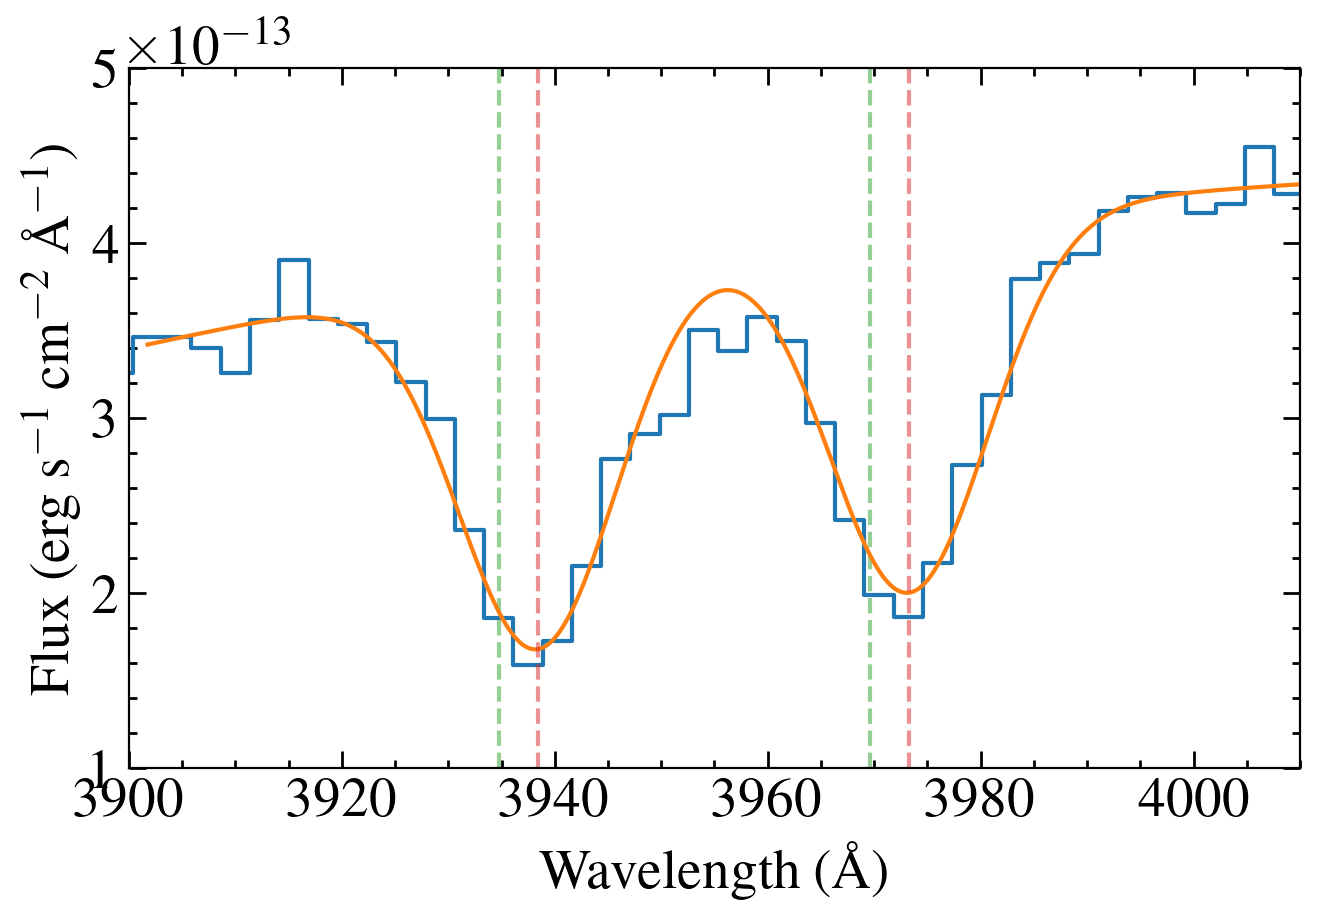

In [74]:
fig, ax = plt.subplots(figsize=(7, 5))

x = g430ls[0]
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(3900, 4010)
ax.set_ylim(1e-13, 5e-13)

ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



# mg2 = [2796.352, 2803.53]
cahk = [3934.77, 3969.59]
# os = [6.08e-01, 3.03e-01]

lines = np.copy(cahk)
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]

mask = (w > 3900) & (w < 4100)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (-15*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=-1e-13, mean = line_guess, stddev=1.0)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
# mod.amplitude_2.tied = tiedamp


cafit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, cafit(wmod))

print(cafit)
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

obs_lam = cafit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

cadv, cadve = dv.value, dv_e 

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()

